| Блок ТЗ | № Ячейки | Описание задачи и результата |
| :--- | :---: | :--- |
| **1. Очистка и подготовка данных** | **1 - 4** | **ETL Процесс:** <br>1. Импорт библиотек и первичный осмотр данных. <br>2. Очистка таблицы Contacts. <br>3. Очистка таблицы Calls. <br>4. Полная очистка, обогащение и восстановление данных в Deals. <br>5. Очистка таблицы Spend. |
| **2. Описательная статистика** | **5** | **Аудит данных:** <br>5. Описательная статистика. |
| **3. Бизнес-дашборд и тренды** | **6 - 9** | **Консолидированная аналитика:** <br>6. Бизнес-дашборд проекта (Executive Summary). <br>7. Анализ трендов: динамика лидов, продаж и звонков. <br>8. Анализ влияния: связь звонков и продаж. <br>9. Распределение звонков до продажи. |
| **4. Анализ временных рядов** | **10** | **Скорость и циклы:** <br>10. Анализ скорости закрытия сделок (Deal Age). |
| **5. Анализ эффективности кампаний и маркетинга** | **11 - 14** | **Маркетинговая аналитика:** <br>11. Маркетинговая воронка и эффективность расходов. <br>12. Анализ платных источников: качество и эффективность. <br>13. Матрица эффективности источников: скорость vs чек. <br>14. Эффективность кампаний и ROI. |
| **6. Анализ эффективности работы отдела продаж** | **15 - 17** | **Performance менеджеров и процессы:** <br>15. Анализ эффективности отдела продаж (KPI 360°). <br>16. Анализ скорости и качества (SLA & Quality). <br>17. Анализ причин отказов по менеджерам. |
| **7. Анализ продуктов и платежей** | **18** | **Продуктовая аналитика:** <br>18. Анализ продуктов и платежей (популярность, выручка, типы оплаты). |
| **8. Географический анализ** | **19 - 21** | **Гео-аналитика:** <br>19. Географическое распределение сделок и карта продаж. <br>20. Анализ эффективности по городам. <br>21. Анализ уровня немецкого языка по городам и конверсии. |
| **9. Юнит-экономика и точки роста** | **22 - 23** | **Продуктовая аналитика (ТЗ "точки роста"):** <br>22. Расчет юнит-экономики (Vacuum Model). <br>23. Поиск точек роста (Sensitivity Analysis & Scenarios). |
| **10. Дерево метрик и HADI-циклы** | **24 - 25** | **Методология и тестирование гипотез:** <br>24. Дерево метрик бизнеса. <br>25. HADI-циклы и описание A/B тестов. |

In [1]:
# Ячейка 1: Импорт библиотек и загрузка данных
# Загружаем библиотеки, считываем Excel-файлы с сохранением строкового формата ID и создаем рабочие копии.

# 1. ОСНОВНЫЕ БИБЛИОТЕКИ ДЛЯ РАБОТЫ С ДАННЫМИ
import pandas as pd
import numpy as np

# 2. ВИЗУАЛИЗАЦИЯ
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

# 3. СТАТИСТИКА И A/B ТЕСТИРОВАНИЕ
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# 4. ГЕОКОДИРОВАНИЕ
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import geopandas as gpd

# 5. ВСПОМОГАТЕЛЬНЫЕ
import time
from tqdm.notebook import tqdm
import os
from dotenv import load_dotenv


# Загружаем исходные данные
contacts_orig = pd.read_excel("Contacts (Done).xlsx", dtype={'Id': str, 'Contact Name': str})
calls_orig = pd.read_excel("Calls (Done).xlsx", dtype={'Id': str, 'Contact Name': str, 'CONTACTID': str})
deals_orig = pd.read_excel("Deals (Done).xlsx", dtype={'Id': str, 'Contact Name': str})
spend_orig = pd.read_excel("Spend (Done).xlsx")

# Создаем рабочие копии
calls = calls_orig.copy()
deals = deals_orig.copy()
spend = spend_orig.copy()
contacts = contacts_orig.copy()

# Словарь для удобного доступа к датафреймам
dfs = {
    'calls': calls,
    'deals': deals, 
    'spend': spend,
    'contacts': contacts
}

print("Данные загружены и созданы рабочие копии.")
print("\nРазмеры таблиц:")
for name, df in dfs.items():
    print(f"{name}: {df.shape[0]} строк, {df.shape[1]} столбцов")

print("ПРЕДВАРИТЕЛЬНЫЙ ОСМОТР ДАННЫХ\n")

for name, df in dfs.items():
    print(f"\n{name.upper()}")
    print(f"Размер: {df.shape}")
    
    print("\nТипы данных:")
    print(df.info())

    print("\nКоличество пропусков и % от строк:")
    total_rows = len(df)
    nulls = df.isnull().sum()
    nulls_pct = (nulls / total_rows * 100).round(2)
    nulls_summary = pd.DataFrame({
        "кол-во пропусков": nulls,
        "% от строк": nulls_pct
    })
    display(nulls_summary[nulls_summary["кол-во пропусков"] > 0].sort_values("кол-во пропусков", ascending=False))

    print("\nОписательная статистика (числовые колонки):")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        display(df[numeric_cols].describe())
    else:
        print("Нет числовых колонок")

    print("\nПервые 3 строки:")
    display(df.head(3))

Данные загружены и созданы рабочие копии.

Размеры таблиц:
calls: 95874 строк, 11 столбцов
deals: 21595 строк, 23 столбцов
spend: 20779 строк, 8 столбцов
contacts: 18548 строк, 4 столбцов
ПРЕДВАРИТЕЛЬНЫЙ ОСМОТР ДАННЫХ


CALLS
Размер: (95874, 11)

Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          95874 non-null  object 
 1   Call Start Time             95874 non-null  object 
 2   Call Owner Name             95874 non-null  object 
 3   CONTACTID                   91941 non-null  object 
 4   Call Type                   95874 non-null  object 
 5   Call Duration (in seconds)  95791 non-null  float64
 6   Call Status                 95874 non-null  object 
 7   Dialled Number              0 non-null      float64
 8   Outgoing Call Status        86875 non-null  object 
 9  

кол-во пропусков  % от строк
Tag                                    95874      100.00
Dialled Number                         95874      100.00
Outgoing Call Status                    8999        9.39
Scheduled in CRM                        8999        9.39
CONTACTID                               3933        4.10
Call Duration (in seconds)                83        0.09


Описательная статистика (числовые колонки):


Call Duration (in seconds)  Dialled Number  Scheduled in CRM  Tag
count                95791.000000             0.0      86875.000000  0.0
mean                   164.977263             NaN          0.001635  NaN
std                    401.410826             NaN          0.040397  NaN
min                      0.000000             NaN          0.000000  NaN
25%                      4.000000             NaN          0.000000  NaN
50%                      8.000000             NaN          0.000000  NaN
75%                     98.000000             NaN          0.000000  NaN
max                   7625.000000             NaN          1.000000  NaN


Первые 3 строки:


Id   Call Start Time Call Owner Name CONTACTID Call Type  \
0  5805028000000805001  30.06.2023 08:43        John Doe       NaN   Inbound   
1  5805028000000768006  30.06.2023 08:46        John Doe       NaN  Outbound   
2  5805028000000764027  30.06.2023 08:59        John Doe       NaN  Outbound   

   Call Duration (in seconds)       Call Status  Dialled Number  \
0                       171.0          Received             NaN   
1                        28.0  Attended Dialled             NaN   
2                        24.0  Attended Dialled             NaN   

  Outgoing Call Status  Scheduled in CRM  Tag  
0                  NaN               NaN  NaN  
1            Completed               0.0  NaN  
2            Completed               0.0  NaN


DEALS
Размер: (21595, 23)

Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   21593 non-null  object 
 1   Deal Owner Name      21564 non-null  object 
 2   Closing Date         14645 non-null  object 
 3   Quality              19340 non-null  object 
 4   Stage                21593 non-null  object 
 5   Lost Reason          16124 non-null  object 
 6   Page                 21593 non-null  object 
 7   Campaign             16067 non-null  object 
 8   SLA                  15533 non-null  object 
 9   Content              14147 non-null  object 
 10  Term                 12454 non-null  object 
 11  Source               21593 non-null  object 
 12  Payment Type         496 non-null    object 
 13  Product              3592 non-null   object 
 14  Education Type       3300 non-null   object 


кол-во пропусков  % от строк
Payment Type                    21099       97.70
Months of study                 20755       96.11
Level of Deutsch                20344       94.21
City                            19084       88.37
Education Type                  18295       84.72
Course duration                 18008       83.39
Product                         18003       83.37
Initial Amount Paid             17430       80.71
Offer Total Amount              17410       80.62
Term                             9141       42.33
Content                          7448       34.49
Closing Date                     6950       32.18
SLA                              6062       28.07
Campaign                         5528       25.60
Lost Reason                      5471       25.33
Quality                          2255       10.44
Contact Name                       63        0.29
Deal Owner Name                    31        0.14
Id                                  2        0.01
Page                                2        0.01
Stage                               2        0.01
Source                              2        0.01
Created Time                        2        0.01


Описательная статистика (числовые колонки):


Course duration  Months of study
count      3587.000000       840.000000
mean         10.198495         5.442857
std           1.834681         2.919920
min           6.000000         0.000000
25%          11.000000         3.000000
50%          11.000000         5.000000
75%          11.000000         8.000000
max          11.000000        11.000000


Первые 3 строки:


Id Deal Owner Name Closing Date         Quality     Stage  \
0  5805028000056864695        Ben Hall          NaN             NaN  New Lead   
1  5805028000056859489   Ulysses Adams          NaN             NaN  New Lead   
2  5805028000056832357   Ulysses Adams   21.06.2024  D - Non Target      Lost   

  Lost Reason       Page       Campaign       SLA Content  ...        Product  \
0         NaN  /eng/test  03.07.23women       NaN     v16  ...            NaN   
1         NaN    /at-eng            NaN       NaN     NaN  ...  Web Developer   
2  Non target    /at-eng     engwien_AT  00:26:43   b1-at  ...            NaN   

  Education Type      Created Time Course duration Months of study  \
0            NaN  21.06.2024 15:30             NaN             NaN   
1        Morning  21.06.2024 15:23             6.0             NaN   
2            NaN  21.06.2024 14:45             NaN             NaN   

  Initial Amount Paid  Offer Total Amount         Contact Name City  \
0                 NaN                 NaN  5805028000056849495  NaN   
1                   0                2000  5805028000056834471  NaN   
2                 NaN                 NaN  5805028000056854421  NaN   

  Level of Deutsch  
0              NaN  
1              NaN  
2              NaN  

[3 rows x 23 columns]


SPEND
Размер: (20779, 8)

Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         20779 non-null  datetime64[ns]
 1   Source       20779 non-null  object        
 2   Campaign     14785 non-null  object        
 3   Impressions  20779 non-null  int64         
 4   Spend        20779 non-null  float64       
 5   Clicks       20779 non-null  int64         
 6   AdGroup      13951 non-null  object        
 7   Ad           13951 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.3+ MB
None

Количество пропусков и % от строк:


кол-во пропусков  % от строк
AdGroup               6828       32.86
Ad                    6828       32.86
Campaign              5994       28.85


Описательная статистика (числовые колонки):


Impressions         Spend        Clicks
count   20779.000000  20779.000000  20779.000000
mean     2458.203475      7.195892     23.990616
std     11442.528075     26.760080     85.245714
min         0.000000      0.000000      0.000000
25%         0.000000      0.000000      0.000000
50%        63.000000      0.580000      1.000000
75%       709.000000      5.750000     12.000000
max    431445.000000    774.000000   2415.000000


Первые 3 строки:


Date        Source               Campaign  Impressions  Spend  Clicks  \
0 2023-07-03    Google Ads         gen_analyst_DE            6   0.00       0   
1 2023-07-03    Google Ads  performancemax_eng_DE            4   0.01       1   
2 2023-07-03  Facebook Ads                    NaN            0   0.00       0   

  AdGroup   Ad  
0     NaN  NaN  
1     NaN  NaN  
2     NaN  NaN


CONTACTS
Размер: (18548, 4)

Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  18548 non-null  object
 1   Contact Owner Name  18548 non-null  object
 2   Created Time        18548 non-null  object
 3   Modified Time       18548 non-null  object
dtypes: object(4)
memory usage: 579.8+ KB
None

Количество пропусков и % от строк:


Empty DataFrame
Columns: [кол-во пропусков, % от строк]
Index: []


Описательная статистика (числовые колонки):
Нет числовых колонок

Первые 3 строки:


Id Contact Owner Name      Created Time     Modified Time
0  5805028000000645014       Rachel White  27.06.2023 11:28  22.12.2023 13:34
1  5805028000000872003      Charlie Davis  03.07.2023 11:31  21.05.2024 10:23
2  5805028000000889001          Bob Brown  02.07.2023 22:37  21.12.2023 13:17

In [2]:
# Ячейка 2: Очистка таблицы Contacts
# Удаляем дубликаты, приводим типы данных и удаляем технические поля.

print("ОЧИСТКА CONTACTS")

# 1. Удаление полных дубликатов
initial_len = len(contacts)
contacts.drop_duplicates(inplace=True)
if len(contacts) < initial_len:
    print(f"Удалено дубликатов строк: {initial_len - len(contacts)}")

# 2. Преобразование типов
contacts['Id'] = contacts['Id'].astype('string')
contacts['Contact Owner Name'] = contacts['Contact Owner Name'].astype('string')

# 3. Даты
contacts['Created Time'] = pd.to_datetime(contacts['Created Time'], dayfirst=True, errors='coerce')

# 4. Удаление лишнего (согласно аудиту)
if 'Modified Time' in contacts.columns:
    contacts = contacts.drop(columns=['Modified Time'])

dfs['contacts'] = contacts

print("Типы данных после преобразования:")
print(contacts.dtypes)

ОЧИСТКА CONTACTS
Типы данных после преобразования:
Id                    string[python]
Contact Owner Name    string[python]
Created Time          datetime64[ns]
dtype: object


In [3]:
# Ячейка 3: Очистка таблицы Calls
# Удаляем дубликаты, пустые/технические столбцы, преобразуем типы.

print("ОЧИСТКА CALLS")

# 1. Удаление полных дубликатов
initial_len = len(calls)
calls.drop_duplicates(inplace=True)
if len(calls) < initial_len:
    print(f"Удалено дубликатов строк: {initial_len - len(calls)}")

# 2. Удаление мусора и технических полей
cols_to_drop = ['Dialled Number', 'Tag', 'Scheduled in CRM', 'Outgoing Call Status']
calls = calls.drop(columns=cols_to_drop, errors='ignore')
print(f"Удалены колонки: {cols_to_drop}")

# 3. Преобразование типов
calls['Id'] = calls['Id'].astype('string')
calls['Call Owner Name'] = calls['Call Owner Name'].astype('string')
calls['CONTACTID'] = calls['CONTACTID'].astype('string') # Важный ключ для связи!

calls['Call Start Time'] = pd.to_datetime(calls['Call Start Time'], dayfirst=True, errors='coerce')

# Категории
cat_cols = ['Call Type', 'Call Status']
for col in cat_cols:
    calls[col] = calls[col].astype('string')

# 4. Заполнение пропусков
calls['Call Duration (in seconds)'] = calls['Call Duration (in seconds)'].fillna(0).astype(int)

dfs['calls'] = calls

print("\nТипы данных после преобразования:")
print(calls.dtypes)
print(f"\nРазмер таблицы: {calls.shape}")

ОЧИСТКА CALLS
Удалены колонки: ['Dialled Number', 'Tag', 'Scheduled in CRM', 'Outgoing Call Status']

Типы данных после преобразования:
Id                            string[python]
Call Start Time               datetime64[ns]
Call Owner Name               string[python]
CONTACTID                     string[python]
Call Type                     string[python]
Call Duration (in seconds)             int64
Call Status                   string[python]
dtype: object

Размер таблицы: (95874, 7)


In [4]:
# Ячейка 4: Полная очистка, обогащение и восстановление данных в Deals
# ФИНАЛЬНАЯ ВЕРСИЯ (Все правки + Дубликаты + Аномалии + Восстановление)

print("ОЧИСТКА, ПОДГОТОВКА И ОБОГАЩЕНИЕ DEALS")

# 1. БАЗОВАЯ ГИГИЕНА ДАННЫХ
# Удаляем полные дубликаты строк
initial_len = len(deals)
deals.drop_duplicates(inplace=True)
if len(deals) < initial_len:
    print(f"Удалено полных дубликатов: {initial_len - len(deals)}")

# Удаляем артефакты Excel
excel_artifacts = ['#REF!', '#N/A', '#VALUE!', 'NaN', 'nan', '']
deals = deals.replace(excel_artifacts, np.nan)
deals = deals.dropna(subset=['Id']).copy()
print(f"Итого строк после очистки ID: {len(deals)}")

# 2. ТИПЫ ДАННЫХ
deals['Created Time'] = pd.to_datetime(deals['Created Time'], dayfirst=True, errors='coerce')
deals['Closing Date'] = pd.to_datetime(deals['Closing Date'], dayfirst=True, errors='coerce')
deals['SLA'] = pd.to_timedelta(deals['SLA'].astype(str), errors='coerce')

# Деньги
for col in ['Initial Amount Paid', 'Offer Total Amount']:
    if col in deals.columns:
        deals[col] = pd.to_numeric(deals[col].astype(str).str.replace(r'[^\d.-]', '', regex=True), errors='coerce')

# Числа (Продукт)
for col in ['Course duration', 'Months of study']:
    if col in deals.columns:
        deals[col] = pd.to_numeric(deals[col], errors='coerce').astype('Int64')

# Текст
text_cols = ['Id', 'Deal Owner Name', 'Contact Name', 'Stage', 'Quality', 
             'Lost Reason', 'Campaign', 'Source', 'Payment Type', 'Product', 
             'Education Type', 'City', 'Level of Deutsch']
for col in text_cols:
    if col in deals.columns:
        deals[col] = deals[col].astype('string').str.strip()

# Удаление мусорных колонок
columns_to_drop = ['Page', 'Term', 'Content']
for col in columns_to_drop:
    if col in deals.columns:
        deals = deals.drop(columns=[col])


# ========== НОРМАЛИЗАЦИЯ УРОВНЯ НЕМЕЦКОГО (ДО ОСТАЛЬНЫХ РАСЧЕТОВ) ==========
print("\nНОРМАЛИЗАЦИЯ УРОВНЯ НЕМЕЦКОГО...")

# Словарь замены (из коллеги)
replace_dict = {
    'в1': 'B1', 'б1': 'B1', 'b1': 'B1', 'B1': 'B1', 'в1-в2': 'B1-B2', 'B2': 'B2',
    'C2': 'C2', 'с1': 'C1', 'Б1': 'B1', 'а2': 'A2', 'а1': 'A1', 'а0': 'A0',
    'б2': 'B2', 'Б2': 'B2', 'В1': 'B1', 'А2': 'A2', 'B1 будет в феврале 2025': 'B1',
    'Detmold, Paulinenstraße 95, 32756': 'Неизвестно', 'Сам оценивает на B2, 13 лет живет в Германии': 'B2',
    'в2': 'B2', 'В1-В2': 'B1-B2', 'Б1 ( ждет Б2)': 'B1-B2', 'А2-В1': 'A2-B1',
    'lэкзамен - 6 июля на В1. курсы вечером (но уверенно говорит на B1)': 'B1',
    'Гражданка Германии уже год в Германии Учит немецкий и в сентябре b1 через гос-во проходит, а не через ДЖЦ, вечером учится 3 р в неделю с 18 до 21': 'B1',
    '-': 'A0', 'А2 ( Б1 в июне)': 'A2-B1', 'B1 в процессе обучения': 'B1',
    'ЯЗ: нем В1 был экз 03.05 повтор и сейчас ждет результаты. Технический англ был. А1 сейчас. ОБР: 2 во информационные и комп сети - инженер системоте': 'B1',
    'В1 в сентябре': 'B1', 'Нет': 'Неизвестно', 'С1': 'C1', '0': 'A0',
    'Ждем B1': 'B1', 'А1 сертиф, но по факту А2': 'A2', 'a2': 'A2', 'Пока А2, сдает 17 05 B1': 'A2-B1',
    'окончание 13.06 курса на b1': 'B1', 'A1': 'A1', 'b2': 'B2', 'Thorn-Prikker-Str. 30, Hagen, 58093': 'Неизвестно',
    'В2': 'B2', 'нулевой уровень, только пошел на курсы.': 'A0', 'ая в1': 'B1',
    'Ждет результат по B1': 'B1', 'А2( ждет итоги Б!)': 'A2-B1', 'b1 экзамен будет 12 апреля': 'B1',
    'b1 (b2 ждет серт)': 'B1-B2', 'С2': 'C2', 'ждем B1': 'B1', 'Paderborn 33102, Schwabenweg 10': 'Неизвестно',
    'b1 (B2 ждет серт)': 'B1-B2', 'Ждем B1 со дня на день': 'B1', 'Б2 ( учит С1)': 'B2-C1',
    'B1 еще нет результата': 'B1', '31.05.2024': 'Неизвестно', 'Lichtenfelser Straße 25, Untersiemau 96253': 'Неизвестно',
    'Учиться до сентября на B1': 'B1', 'b1 9ждет экзамен)': 'B1', 'b1+': 'B1', 'гражданка': 'B2',
    'b1 (ждет результат)': 'B1', 'Б1 (учит Б2)': 'B1-B2', 'б2+': 'B2', 'Гражданин': 'B2',
    '25 лет живет в Германии': 'C1', 'С1 -ая , Ня -а1': 'C1', 'Ждем результат по B1': 'B1',
    'b1 (b2 в июле экзамен)': 'B1-B2', 'Ждет со дня на день В1': 'B1',
    'А2 (В1 с 3 раза не сдала, бератер видела наши доки)': 'A2-B1', 'b1 (ждет результаты)': 'B1',
    'А2 ( повтор на Б1)': 'A2-B1', 'B1, сдает B2 в апреле': 'B1-B2', 'ждет сертификат B1': 'B1',
    'Б2( 16.02 экзамен С1)': 'B2-C1', 'А1-А2': 'A1-A2', 'b1 ждет серт на днях на руки': 'B1',
    'b1 24 февраля экзамен, англ b2': 'B1-B2', 'А2 ( скоро екзамен)': 'A2', 'B1 (ждет результаты В2)': 'B1-B2',
    'b1 (b2 15 марта экзамен)': 'B1-B2', 'b2 (с1 экзамен 16 февраля)': 'B2-C1', 'Б1 ( ждет итог Б2)': 'B1-B2',
    'не сдавал, но гражданин': 'B2', 'Нет сертификатов, но есть С1 англ, неоконченное высшее в ИТ (и еще одно высшее юридическое) , очень хочет в ИТ, сильно замотивирована именно н': 'Неизвестно',
    'А2, в процессе Б1': 'A2-B1', 'A0': 'A0', 'А2(Б1 в марте экз)': 'A2-B1', 'учит A2': 'A2',
    'Б1 ( проходит Б2)': 'B1-B2', 'Б1 ( ждет итог )': 'B1-B2', 'НЯ - В1, АЯ - В1': 'B1',
    'б1 (ждет рез-тат)': 'B1', 'А2(ждет итоги Б1)': 'A2-B1', 'в1-ня , в1-ая': 'B1',
    'ня-0, но англ B2+': 'A0', 'В': 'B1', 'будет B1 в июне': 'B1',
    'А2( включили нем в ангебот)': 'A2', 'а2-в1': 'A2-B1', 'в2-с1': 'B2-C1',
    'курс А2-В1 - сдача в июле, но вечерняя смена инт курсов, настроен получить гутшайн уже сейчас.': 'A2-B1',
    'B1 (B2 должна до конца февраля получить)': 'B1-B2', 'b1 (b2 экзамен 6 февраля)': 'B1-B2',
    'A1-A2': 'A1-A2', 'Б1( может будет)': 'B1', 'А2 ( в процессе Б1)': 'A2-B1',
    'b1 ждет результаты': 'B1', 'b1 ждет экзамен в феврале': 'B1', 'В1, может уже В2?': 'B1-B2',
    'A2 (идет доучивать В1 - 300 часов; предположительно до августа)': 'A2-B1', 'не учил': 'A0',
    'Без 5 минут B1 (ждет результаты экзамена)': 'B1', 'а1-а2 , ая свободный': 'A1-A2', 'b2-c2': 'B2',
    'а2, англ B1': 'A2', 'А1': 'A1', 'А2 нем -В2 англ': 'A2', 'Проходит сейчас B1': 'B1',
    'Ждет результат по B1 в феврале': 'B1', 'Проходит сейчас повторно B1': 'B1',
    'b1 экзамен в феврале': 'B1', 'Учиться на B1 во вторую смену, в первую хочет получить одобрение на обучение у нас': 'B1',
    'Б10Б2': 'B2', 'Б1?': 'B1', 'B1 есть, ждем B2 в конце месяца': 'B1-B2', 'B1-B2': 'B1-B2',
    '?': 'Неизвестно', 'b1 экзамен 26 января': 'B1', 'А0': 'A0', 'а2 (б1 в сер января)': 'A2-B1',
    'f2': 'A2', 'Учиться на B1': 'B1', 'Сдала экзамен на B1, ждет в начале февраля результат': 'B1',
    'Сдавал 8 12 на B1 - ждет результат. 3 01 - аплейт - получил B1!': 'B1', 'Б1-Б2': 'B1-B2',
    'б1 (до июля на В2)': 'B1-B2', 'А2 ( Б1 март )': 'A2-B1', 'А2 (весной - еще 300 часов В1)': 'A2-B1',
    'В январе будут результаты по экзамену на B1': 'B1', 'б2 (с1 ждет рез-тат)': 'B2-C1',
    'ня-0, ая-B1': 'A0', 'А2-Б1': 'A2-B1', 'B1 (почти, не сдала чуть) + англ В1': 'B1',
    'в1 ждем результаты': 'B1', 'А2 ( хочет просить совмещать)': 'A2', 'B1 (ждет результаты)': 'B1',
    'А2+': 'A2', 'а2 (сдавала экз В1, но не сдала похоже)': 'A2', 'в1, идет на в2': 'B1-B2',
    'b2-c1': 'B2-C1', 'C1': 'C1', 'b1-b2': 'B1-B2', 'не учила ( разговорный) сразу пошла работать': 'B2',
    'Б1 ( проходит Б2 )': 'B1-B2', 'a0-a1': 'A0', 'Б1 ( был екзамен ждет итог )': 'B1',
    'Б2-С1': 'B2-C1', 'b1 (учила, но не сдала В2)': 'B1', 'ня а2, ая в1': 'A2-B1',
    'A2 (идет на В1)': 'A2-B1', 'B2-C2': 'B2', 'немецкий - а1-а2, англ b1-b2': 'A2',
    'B2+': 'B2', 'в1, еще нет сертификата': 'B1', 'б1-б2': 'B1-B2', 'Бй': 'B1',
    'ждет результаты по B1 экзамену': 'B1', 'b2 (ждет серт)': 'B2', 'никакой': 'A0',
    'в1 , хочет совмещать с в2': 'B1-B2', '90': 'Неизвестно', '.': 'Неизвестно',
    'в1 (уже сдала В2)': 'B2', 'b1 результат экзамена в феврале': 'B1',
    'в1 , экзамен на в2 15 декабря': 'B1-B2', 'идет на А1': 'A1', 'УТОЧНИТЬ!': 'Неизвестно',
    'B2 (говорит без проблем - давно здесь)': 'B2', 'B1 (до февраля)': 'B1',
    'А2 ( Б2 в процессе)': 'B1', 'C': 'C1', 'б1 заканчивает': 'B1', 'B1 (B2 экзамен в январе)': 'B1-B2',
    '5 июля 2024 сдает экз на В2': 'B2', 'А2 (заканчив В1 в июне)': 'A2-B1',
    'a2-б1': 'A2-B1', 'В1?': 'B1', 'b1 будет в январе экзамен, готов совмещать': 'B1',
    'b1 (b2 экзамен 2 марта)': 'B1-B2', 'B1 немецкий и английский Advance': 'B1',
    'A': 'A1', 'a2 (b1 экзамен 15 июня)': 'A2-B1', 'B2 (ждет итог экзамена)': 'B2',
    'b1 (b2 не сдал экзамен)': 'B1', 'В1 (учится на В2 до авг.': 'B1-B2',
    'В2 - не сдал': 'B2', 'B2+ (не сдавал, но говорит)': 'B2', 'b1 (ждет серт)': 'B1',
    'B1 вроде был (18 лет назад сдавал)': 'B1', 'А2 (сдает B1 - 12 дек) - не сдал!': 'A2',
    'УТОЧНИТЬ': 'Неизвестно', 'b2 ждет серт': 'B2', 'разговорный из украины, без сертификата': 'B2',
    'Ждет B1': 'B1', 'сдавала А2 в сентябре': 'A2', 'В1, учится на В2 до няоб 24': 'B1-B2',
    'Б1 ( ждет результат Б2)': 'B1-B2', 'точно уровень не знаю, но говорить могу - учила сама': 'B2',
    'А2-В1 учит': 'A2-B1', 'В1 (учится на В2 уже)': 'B1', 'В январе - В2 сдает': 'B2',
    'b1 должна получить результаты в феврале': 'B1'
}

# Применяем словарь
if 'Level of Deutsch' in deals.columns:
    deals['Level of Deutsch'] = deals['Level of Deutsch'].replace('-', np.nan)
    deals['Level of Deutsch'] = deals['Level of Deutsch'].astype(str).str.lower()
    
    deals['Level of Deutsch'] = deals['Level of Deutsch'].map(replace_dict).fillna('Неизвестно')
    
    # ========== КОНВЕРТАЦИЯ ДИАПАЗОНОВ В ОДИНОЧНЫЕ УРОВНИ ==========
    def convert_range_to_single(level):
        if pd.isna(level):
            return 'Unknown'
        
        level_str = str(level).strip().upper()
        
        single_levels = ['A0', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2']
        if level_str in single_levels:
            return level_str
        
        level_priority = {'A0': 0, 'A1': 1, 'A2': 2, 'B1': 3, 'B2': 4, 'C1': 5, 'C2': 6}
        
        found_levels = []
        for lvl in single_levels:
            if lvl in level_str:
                found_levels.append(lvl)
        
        if len(found_levels) == 0:
            return 'Unknown'
        elif len(found_levels) == 1:
            return found_levels[0]
        else:
            highest = max(found_levels, key=lambda x: level_priority[x])
            return highest
    
    deals['Level of Deutsch'] = deals['Level of Deutsch'].apply(convert_range_to_single)
    
    print(f"Уникальных уровней после нормализации: {deals['Level of Deutsch'].nunique()}")
    print(f"Распределение: {deals['Level of Deutsch'].value_counts().to_dict()}")

# ========== НОРМАЛИЗАЦИЯ ГОРОДОВ (ТОЛЬКО 3 АДРЕСА) ==========
print("\nНОРМАЛИЗАЦИЯ ГОРОДОВ...")
if 'City' in deals.columns:
    deals['City'] = deals['City'].replace('-', np.nan)
    
    city_replacements = {
        'Karl-Liebknecht str. 24, Hildburghausen, Thüringen': 'Hildburghausen',
        'Poland , Gdansk , Al. Grunwaldzka 7, ap. 1a': 'Gdańsk',
        'Vor Ebersbach 1, 77761 Schiltach': 'Schiltach'
    }
    
    deals['City'] = deals['City'].replace(city_replacements)
    
    print(f"Обработано 3 проблемных адреса")
    print(f"Уникальных городов: {deals['City'].nunique()}")


# 3. НОРМАЛИЗАЦИЯ СТАДИЙ (До расчетов!)
stage_mapping = {
    "new lead": "Lead",
    "call delayed": "Lead",
    "registered on webinar": "Lead",
    "registered on offline day": "Lead",

    "need to call": "Contacted",
    "need to call sales": "Contacted",
    "qualificated": "Contacted",

    "need a consultation": "Demo",
    "test sent": "Demo",

    "waiting for payment": "Payment Process",

    "payment done": "Active Student",
    "free education": "Active Student",

    "lost": "Churned"
}
deals["stage_normalized"] = deals["Stage"].str.lower().map(stage_mapping).fillna("Undefined").astype("string")


# 4. УМНОЕ ВОССТАНОВЛЕНИЕ ДАТЫ ЗАКРЫТИЯ (Closing Date)
# Уровень 1: По последнему звонку
if 'calls' in dfs:
    last_calls = dfs['calls'].groupby('CONTACTID')['Call Start Time'].max().reset_index()
    last_calls.columns = ['Contact Name', 'Last_Call_Time']
    
    deals = deals.merge(last_calls, on='Contact Name', how='left')
    mask_no_date = (deals['stage_normalized'] == 'Active Student') & (deals['Closing Date'].isna())
    deals.loc[mask_no_date, 'Closing Date'] = deals.loc[mask_no_date, 'Last_Call_Time']

# Уровень 2: По медиане Менеджера
deals['Temp_Age'] = (deals['Closing Date'] - deals['Created Time'].dt.normalize()).dt.days
manager_medians = deals[deals['Temp_Age'] >= 0].groupby('Deal Owner Name')['Temp_Age'].median()

def fill_date_by_manager(row):
    if pd.notna(row['Closing Date']): return row['Closing Date']
    if row['stage_normalized'] != 'Active Student': return row['Closing Date']
    
    manager = row['Deal Owner Name']
    days_to_add = manager_medians.get(manager, 17)
    return row['Created Time'] + pd.Timedelta(days=days_to_add)

deals['Closing Date'] = deals.apply(fill_date_by_manager, axis=1)
deals = deals.drop(columns=['Temp_Age', 'Last_Call_Time'], errors='ignore')


# 5. МЕТРИКИ И ДЕНЬГИ
# Deal Age
deals['Deal_Age_days'] = (deals['Closing Date'] - deals['Created Time'].dt.normalize()).dt.days

# Флаг оплаты
paid_statuses = ['Active Student'] 
deals['is_paid'] = deals['stage_normalized'].isin(paid_statuses).astype(int)

# Расчет REVENUE
def calculate_real_revenue(row):
    if row['is_paid'] == 0: return 0
    
    initial = row['Initial Amount Paid']
    total = row['Offer Total Amount']
    duration = row['Course duration']
    studied = row['Months of study']
    
    if pd.isna(initial): initial = 0
    if pd.isna(total): total = 0
    if pd.isna(duration) or duration <= 1: duration = 12
    if pd.isna(studied) or studied <= 0: studied = 1
    
    if initial >= total and total > 0: return initial
    
    remaining_amount = max(0, total - initial)
    monthly = remaining_amount / (duration - 1) if duration > 1 else 0
    extra = max(0, studied - 1)
    return min(initial + (monthly * extra), total)

deals['revenue'] = deals.apply(calculate_real_revenue, axis=1)

# УДАЛЕНИЕ АНОМАЛИЙ
zero_rev_mask = (deals['is_paid'] == 1) & (deals['revenue'] <= 0)
if zero_rev_mask.sum() > 0:
    print(f"Удалено аномальных 'успешных' сделок с 0 выручкой: {zero_rev_mask.sum()}")
    deals = deals[~zero_rev_mask].copy()

print(f"Итоговая выручка (Revenue): {deals['revenue'].sum():,.0f}")

# Расчет AOV_I
months_filled = deals['Months of study'].fillna(1)
months_filled = np.where(months_filled <= 0, 1, months_filled)
deals['AOV_I'] = deals['revenue'] / months_filled


# 6. ОБОГАЩЕНИЕ (SLA, GEO, PAYMENT)
bins = [pd.Timedelta(0), pd.Timedelta(hours=1), pd.Timedelta(hours=4), pd.Timedelta(days=1), pd.Timedelta(days=7), pd.Timedelta(weeks=500)]
labels = ['Top Speed (< 1h)', 'Fast (1h-4h)', 'Normal (4h-24h)', 'Slow (1d-7d)', 'Too Slow (> 7d)']
deals['SLA_Segment'] = pd.cut(deals['SLA'], bins=bins, labels=labels, include_lowest=True).astype('string').fillna('Unknown')

def extract_country(row):
    val = (str(row['Campaign']) + str(row['City'])).upper()
    if '_DE' in val or 'GERMANY' in val or 'BERLIN' in val: return 'Germany'
    if '_AT' in val or 'AUSTRIA' in val or 'WIEN' in val: return 'Austria'
    if '_CH' in val or 'SWITZERLAND' in val or 'ZURICH' in val: return 'Switzerland'
    return 'Unknown'
deals['Derived_Country'] = deals.apply(extract_country, axis=1).astype('string')

deals['payment_ratio'] = deals['Initial Amount Paid'] / deals['Offer Total Amount']
def recover_payment(row):
    curr = str(row['Payment Type']).lower()
    if curr not in ['nan', '<na>', 'unknown', '']: return curr
    paid, total = row['Initial Amount Paid'], row['Offer Total Amount']
    if pd.isna(paid) or pd.isna(total) or total == 0: return 'unknown'
    return 'one payment' if (paid / total) >= 0.98 else 'recurring payments'
deals['Payment_Type_Recovered'] = deals.apply(recover_payment, axis=1).astype('string')


# 7. РАНЖИРОВАНИЕ
stage_order_mapping = {"Lead": 1, "Contacted": 2, "Demo": 3, "Payment Process": 4, "Active Student": 5, "Churned": 0, "Undefined": -1}
deals['stage_rank'] = deals['stage_normalized'].map(stage_order_mapping).fillna(-1).astype(int)
deals['max_stage_rank'] = deals.groupby('Id')['stage_rank'].transform('max')

# 8. СТАНДАРТИЗАЦИЯ
clean_lower_cols = ['Source', 'Campaign', 'Product', 'Education Type', 'Payment Type', 'Derived_Country']
for col in clean_lower_cols:
    if col in deals.columns: deals[col] = deals[col].str.lower()

# 9. ВОССТАНОВЛЕНИЕ SLA (через звонки)
if 'calls' in dfs:
    calls_first = dfs['calls'].groupby('CONTACTID')['Call Start Time'].min().reset_index()
    calls_first.columns = ['Contact Name', 'First_Call_Time']
    deals = deals.merge(calls_first, on='Contact Name', how='left', suffixes=('', '_new'))
    
    first_call_col = 'First_Call_Time_new' if 'First_Call_Time_new' in deals.columns else 'First_Call_Time'
    mask_sla = (deals['SLA'].isna() & deals[first_call_col].notna() & (deals[first_call_col] >= deals['Created Time']))
    
    deals.loc[mask_sla, 'SLA'] = deals.loc[mask_sla, first_call_col] - deals.loc[mask_sla, 'Created Time']
    deals.loc[mask_sla, 'SLA_Segment'] = pd.cut(deals.loc[mask_sla, 'SLA'], bins=bins, labels=labels, include_lowest=True).astype('string')
    print(f"Заполнено пропусков в SLA: {mask_sla.sum()}")
    
    if 'First_Call_Time_new' in deals.columns: deals = deals.drop(columns=['First_Call_Time_new'])
    if 'Last_Call_Time' in deals.columns: deals = deals.drop(columns=['Last_Call_Time'])

dfs['deals'] = deals
print(f"\nГотово. Финальный размер: {deals.shape}")

ОЧИСТКА, ПОДГОТОВКА И ОБОГАЩЕНИЕ DEALS
Итого строк после очистки ID: 21593

НОРМАЛИЗАЦИЯ УРОВНЯ НЕМЕЦКОГО...
Уникальных уровней после нормализации: 7
Распределение: {'Unknown': 20501, 'B1': 724, 'B2': 203, 'A2': 111, 'C1': 26, 'A1': 15, 'A0': 13}

НОРМАЛИЗАЦИЯ ГОРОДОВ...
Обработано 3 проблемных адреса
Уникальных городов: 874
Удалено аномальных 'успешных' сделок с 0 выручкой: 18
Итоговая выручка (Revenue): 3,568,246
Заполнено пропусков в SLA: 1446

Готово. Финальный размер: (21575, 32)


In [5]:
# Ячейка 5: Очистка таблицы Spend
# Удаляем дубликаты, преобразуем даты, стандартизируем текст.

print("ОЧИСТКА SPEND")

# 1. Удаление полных дубликатов
initial_len = len(spend)
spend.drop_duplicates(inplace=True)
if len(spend) < initial_len:
    print(f"Удалено дубликатов строк: {initial_len - len(spend)}")

# 2. Преобразование даты
spend['Date'] = pd.to_datetime(spend['Date'], dayfirst=True, errors='coerce')

# 3. Текстовые поля: Приведение к стандарту (строка -> нижний регистр -> strip)
text_cols = ['Source', 'Campaign', 'AdGroup', 'Ad']
for col in text_cols:
    if col in spend.columns:
        spend[col] = spend[col].fillna('unknown').astype('string').str.lower().str.strip()

# 4. Числовые поля
num_cols = ['Impressions', 'Spend', 'Clicks']
for col in num_cols:
    if col in spend.columns:
        spend[col] = pd.to_numeric(spend[col], errors='coerce').fillna(0)

dfs['spend'] = spend

print("Типы данных после преобразования:")
print(spend.dtypes)
print(f"Размер таблицы: {spend.shape}")
print("\nПример данных (Source):", spend['Source'].unique()[:5])

ОЧИСТКА SPEND
Удалено дубликатов строк: 917
Типы данных после преобразования:
Date           datetime64[ns]
Source         string[python]
Campaign       string[python]
Impressions             int64
Spend                 float64
Clicks                  int64
AdGroup        string[python]
Ad             string[python]
dtype: object
Размер таблицы: (19862, 8)

Пример данных (Source): <StringArray>
['google ads', 'facebook ads', 'crm', 'bloggers', 'youtube ads']
Length: 5, dtype: string


In [6]:
# Ячейка 6: Описательная статистика
# Считаем сводную статистику для числовых полей и анализируем категориальные поля.

print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА\n")

# Обновляем словарь dfs
dfs = {
    'calls': calls,
    'deals': deals,
    'spend': spend,
    'contacts': contacts
}

# 1. Сводная статистика по таблицам
for name, df in dfs.items():
    print(f"\nТАБЛИЦА: {name.upper()}")

    # Числовые метрики
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print("Числовые показатели (среднее, медиана, мода, диапазон):")
        stats = {}
        for col in numeric_cols:
            mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
            stats[col] = {
                "mean": df[col].mean(),
                "median": df[col].median(),
                "mode": mode_val,
                "range": df[col].max() - df[col].min()
            }
        display(pd.DataFrame(stats).T.round(2))

    # Категориальные метрики (string, object, category)
    cat_cols = df.select_dtypes(include=['object', 'string', 'category']).columns
    if len(cat_cols) > 0:
        print("Категориальные показатели (топ-5 значений):")
        for col in cat_cols:
            print(f"\nПоле: {col}")
            print(df[col].value_counts().head(5))

    # Временные поля (datetime)
    date_cols = df.select_dtypes(include=['datetime64[ns]']).columns
    if len(date_cols) > 0:
        print("Временные показатели (минимум, максимум, диапазон):")
        for col in date_cols:
            min_date = df[col].min()
            max_date = df[col].max()
            print(f"\nПоле: {col}")
            print(f"Минимум: {min_date}, Максимум: {max_date}, Диапазон: {(max_date - min_date)}")

    # Специальный акцент для Deals
    if name == 'deals':
        if 'Quality' in df.columns:
            print("\nКатегориальное поле: Quality")
            print(df['Quality'].value_counts().head(10))

        if 'stage_normalized' in df.columns:
            print("\nКатегориальное поле: stage_normalized")
            print(df['stage_normalized'].value_counts().head(10))

        if 'Source' in df.columns:
            print("\nКатегориальное поле: Source")
            print(df['Source'].value_counts().head(10))

        if 'Product' in df.columns:
            print("\nКатегориальное поле: Product")
            print(df['Product'].value_counts().head(10))

ОПИСАТЕЛЬНАЯ СТАТИСТИКА


ТАБЛИЦА: CALLS
Числовые показатели (среднее, медиана, мода, диапазон):


mean  median  mode   range
Call Duration (in seconds)  164.83     8.0   0.0  7625.0

Категориальные показатели (топ-5 значений):

Поле: Id
Id
5805028000000805001    1
5805028000000768006    1
5805028000000764027    1
5805028000000787003    1
5805028000000768019    1
Name: count, dtype: Int64

Поле: Call Owner Name
Call Owner Name
Yara Edwards     9059
Julia Nelson     7446
Ian Miller       7215
Charlie Davis    7213
Diana Evans      6857
Name: count, dtype: Int64

Поле: CONTACTID
CONTACTID
5805028000003329100    94
5805028000008246089    72
5805028000007866898    70
5805028000001880249    67
5805028000002799040    57
Name: count, dtype: Int64

Поле: Call Type
Call Type
Outbound    86875
Missed       5921
Inbound      3078
Name: count, dtype: Int64

Поле: Call Status
Call Status
Attended Dialled      70703
Unattended Dialled    16030
Missed                 5922
Received               3077
Overdue                  60
Name: count, dtype: Int64
Временные показатели (минимум, максимум, диапазон):

Поле: Call Start Time
Минимум: 2023-06-30 08:43:00, Максимум: 2024-06-21 15:3

mean           median  \
SLA                  2 days 23:24:20.562669496  0 days 05:58:48   
Course duration                      10.198271             11.0   
Months of study                       5.436234              5.0   
Initial Amount Paid                  937.33013           1000.0   
Offer Total Amount                 7389.806552          11000.0   
Deal_Age_days                        16.329168              4.0   
is_paid                                0.03898              0.0   
revenue                             165.388009              0.0   
AOV_I                                 33.75874              0.0   
payment_ratio                              inf         0.090909   
stage_rank                            0.480185              0.0   
max_stage_rank                        0.480185              0.0   

                                mode              range  
SLA                  0 days 00:13:00  313 days 23:53:00  
Course duration                 11.0                5.0  
Months of study                  6.0               11.0  
Initial Amount Paid           1000.0            11500.0  
Offer Total Amount           11000.0          1139800.0  
Deal_Age_days                    0.0              692.0  
is_paid                          0.0                1.0  
revenue                          0.0            11500.0  
AOV_I                            0.0            11500.0  
payment_ratio               0.090909                inf  
stage_rank                       0.0                6.0  
max_stage_rank                   0.0                6.0

Категориальные показатели (топ-5 значений):

Поле: Id
Id
5805028000056864695    1
5805028000056859489    1
5805028000056832357    1
5805028000056824246    1
5805028000056873292    1
Name: count, dtype: Int64

Поле: Deal Owner Name
Deal Owner Name
Charlie Davis      2963
Julia Nelson       2241
Ulysses Adams      2164
Quincy Vincent     1884
Paula Underwood    1862
Name: count, dtype: Int64

Поле: Quality
Quality
E - Non Qualified    7632
D - Non Target       6246
C - Low              3450
B - Medium           1559
A - High              432
Name: count, dtype: Int64

Поле: Stage
Stage
Lost                     15743
Call Delayed              2248
Registered on Webinar     2072
Payment Done               840
Waiting For Payment        325
Name: count, dtype: Int64

Поле: Lost Reason
Lost Reason
Doesn't Answer       4135
Changed Decision     2146
Duplicate            1771
Non target           1761
Stopped Answering    1588
Name: count, dtype: Int64

Поле: Campaign
Campaign
performancemax_d

mean  median  mode     range
Impressions  2571.70   82.00   0.0  431445.0
Spend           7.53    0.74   0.0     774.0
Clicks         25.10    2.00   0.0    2415.0

Категориальные показатели (топ-5 значений):

Поле: Source
Source
facebook ads      9569
tiktok ads        2985
youtube ads       1784
google ads        1266
telegram posts     836
Name: count, dtype: Int64

Поле: Campaign
Campaign
unknown                     5077
12.07.2023wide_de           2073
02.07.23wide_de             1685
04.07.23recentlymoved_de    1398
youtube_shorts_de           1223
Name: count, dtype: Int64

Поле: AdGroup
AdGroup
unknown          5911
wide             5451
recentlymoved    1442
women            1274
lal1             1220
Name: count, dtype: Int64

Поле: Ad
Ad
unknown              5911
bloggersvideo9com     714
bloggersvideo5        711
bloggersvideo3com     565
bloggersvideo8com     536
Name: count, dtype: Int64
Временные показатели (минимум, максимум, диапазон):

Поле: Date
Минимум: 2023-07-03 00:00:00, Максимум: 2024-06-21 00:00:00, Диапазон: 354 days 00:00:00

ТАБЛИЦА: CONTACTS
Категориальные показатели (топ-5 значений):

Поле: Id
Id
5805028000000645014  

In [7]:
# Ячейка 7: БИЗНЕС-ДАШБОРД (Executive Summary) — единый df
# С простыми русскими подписями для времени закрытия сделки

print("БИЗНЕС-ДАШБОРД ПРОЕКТА")

# --- Базовые входы ---
TOTAL_UA = contacts['Id'].nunique()
active_students_df = deals[deals['stage_normalized'] == 'Active Student']
TOTAL_B = active_students_df['Contact Name'].nunique()

total_revenue = deals['revenue'].sum()
products_count = deals['Product'].nunique()
managers_count = deals['Deal Owner Name'].nunique()
cities_count = deals['City'].nunique() if 'City' in deals.columns else 0

# Средний чек: сумма выручки / количество уникальных клиентов (оплативших)
avg_check = total_revenue / TOTAL_B if TOTAL_B > 0 else 0

# Расходы и источники
marketing_spend = spend['Spend'].sum() if 'spend' in dfs else 0
sources_count = deals['Source'].nunique()

# Vacuum Win Rate (C1): B / UA
win_rate_vacuum = (TOTAL_B / TOTAL_UA * 100) if TOTAL_UA > 0 else 0

# Contribution Margin и ROMI
cm_total = total_revenue - marketing_spend
romi_total = (cm_total / marketing_spend * 100) if marketing_spend > 0 else 0

# Период покрытия
date_min = contacts['Created Time'].min() if 'Created Time' in contacts.columns else None
date_max = contacts['Created Time'].max() if 'Created Time' in contacts.columns else None

# --- Deal Age ---
active_student_ids = active_students_df['Id'].unique()
closed_deals_clean = deals[
    (deals['Id'].isin(active_student_ids)) &
    (deals['Closing Date'].notna()) &
    (deals['Deal_Age_days'].notna()) &
    (deals['Deal_Age_days'] >= 0)
].copy()

median_deal_age = closed_deals_clean['Deal_Age_days'].median() if len(closed_deals_clean) > 0 else np.nan
mean_deal_age = closed_deals_clean['Deal_Age_days'].mean() if len(closed_deals_clean) > 0 else np.nan

# --- Продуктовая аналитика (Vacuum) ---
deals = deals.copy()
deals['Transactions'] = np.where(
    deals.get('Payment_Type_Recovered', None) == 'one payment',
    1,
    deals.get('Months of study', pd.Series(index=deals.index, dtype='float')).fillna(1)
)
deals.loc[deals['stage_normalized'] != 'Active Student', 'Transactions'] = 0

active_students_df = deals[deals['stage_normalized'] == 'Active Student']

product_stats = active_students_df.groupby('Product').agg({
    'Contact Name': 'nunique',
    'revenue': 'sum',
    'Transactions': 'sum',
}).reset_index().rename(columns={
    'Contact Name': 'B',
    'revenue': 'Revenue',
    'Transactions': 'T'
})

product_stats['AOV'] = product_stats['Revenue'] / product_stats['T']
product_stats['APC'] = product_stats['T'] / product_stats['B']

COGS_FIXED_PER_TRANS = 0
COGS_PERCENT_FROM_CHECK = 0.0
total_cogs_amt_by_product = (product_stats['Revenue'] * COGS_PERCENT_FROM_CHECK) + (product_stats['T'] * COGS_FIXED_PER_TRANS)
product_stats['COGS'] = total_cogs_amt_by_product / product_stats['T'].replace(0, np.nan)

product_stats['CLTV'] = (product_stats['AOV'] - product_stats['COGS']) * product_stats['APC']
product_stats['C1_vacuum'] = product_stats['B'] / TOTAL_UA if TOTAL_UA > 0 else 0
product_stats['LTV'] = product_stats['CLTV'] * product_stats['C1_vacuum']

top_product_row = product_stats.sort_values('Revenue', ascending=False).head(1)
top_product_name = top_product_row['Product'].iloc[0] if len(top_product_row) else None

if product_stats['B'].sum() > 0:
    cltv_weighted = (product_stats['CLTV'] * product_stats['B']).sum() / product_stats['B'].sum()
else:
    cltv_weighted = 0
ltv_vacuum_business = cltv_weighted * (TOTAL_B / TOTAL_UA) if TOTAL_UA > 0 else 0

# --- Сводный df ---
summary_rows = [
    ('Выручка (Total Revenue)', total_revenue, '€'),
    ('Средний чек (Average Check)', avg_check, '€'),
    ('Клиенты (Buyers Count)', TOTAL_B, ''),
    ('Уникальные контакты (UA Count)', TOTAL_UA, ''),
    ('Продукты (Products Count)', products_count, ''),
    ('Менеджеры (Managers Count)', managers_count, ''),
    ('Города (Cities Count)', cities_count, ''),
    ('Маркетинговые расходы (Marketing Spend)', marketing_spend, '€'),
    ('Источники (Sources Count)', sources_count, ''),
    ('Конверсия (Vacuum, B/UA)', win_rate_vacuum, '%'),
    ('ROMI ((Revenue - Spend)/Spend)', romi_total, '%'),
    ('Маржинальный вклад (Contribution Margin)', cm_total, '€'),
    ('Время закрытия сделки (медиана)', median_deal_age, ''),
    ('Время закрытия сделки (среднее)', mean_deal_age, ''),
    ('Топовый продукт по выручке', top_product_name if top_product_name is not None else np.nan, 'str'),
    ('Бизнес-LTV (weighted CLTV × B/UA)', ltv_vacuum_business, '€'),
]

summary_df = pd.DataFrame(summary_rows, columns=['Metric', 'Value', 'Unit'])

# --- Форматирование ---
def format_value(val, unit):
    if pd.isna(val):
        return '—'
    if isinstance(val, (pd.Timestamp,)):
        return str(val.date())
    if isinstance(val, str):
        return val
    if unit == '%':
        return f"{val:,.1f}%"
    if unit == '€':
        return f"{val:,.0f} €"
    return f"{val:,.0f}"

summary_df['Formatted'] = summary_df.apply(lambda r: format_value(r['Value'], r['Unit']), axis=1)

# --- Вывод ---
display(
    summary_df[['Metric', 'Formatted']].style
        .hide(axis='index')
)

# Контекст периода
if date_min is not None and date_max is not None:
    print(f"Покрытие периода: с {pd.to_datetime(date_min).date()} по {pd.to_datetime(date_max).date()}")


БИЗНЕС-ДАШБОРД ПРОЕКТА


Покрытие периода: с 2023-06-27 по 2024-06-21


АНАЛИЗ ТРЕНДОВ: ДИНАМИКА ЛИДОВ, ПРОДАЖ И ЗВОНКОВ


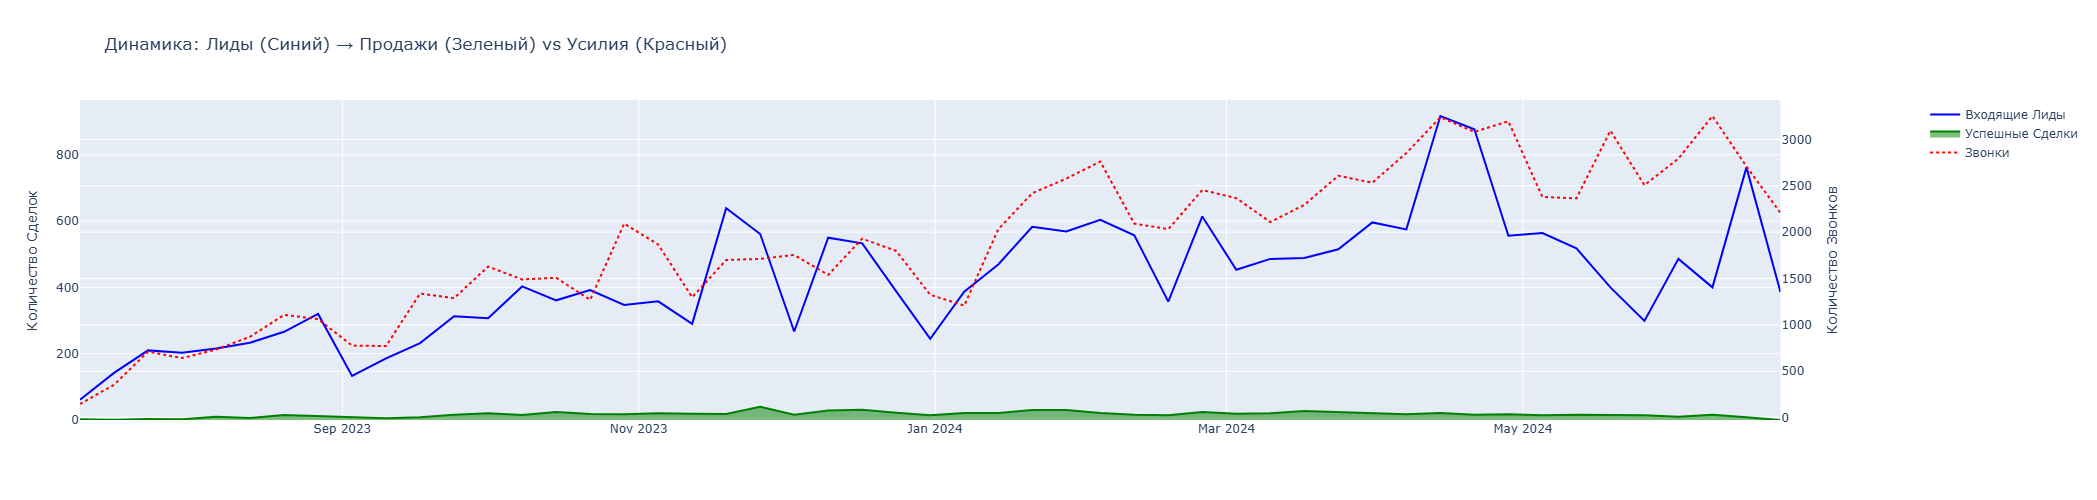


Данные по неделям (последние 5 недель):


Week  Leads_Count  Success_Count  Calls_Count  Conversion_Rate  \
46 2024-05-26          299             14         2506              4.7   
47 2024-06-02          486             10         2793              2.1   
48 2024-06-09          400             16         3252              4.0   
49 2024-06-16          762              8         2708              1.0   
50 2024-06-23          386              0         2207              0.0   

    Calls_Per_Lead  
46             8.4  
47             5.7  
48             8.1  
49             3.6  
50             5.7

In [8]:
# Ячейка 8.
print("АНАЛИЗ ТРЕНДОВ: ДИНАМИКА ЛИДОВ, ПРОДАЖ И ЗВОНКОВ")

# Подготовка данных
weekly_deals = deals.set_index('Created Time').resample('W').agg({
    'Id': 'count',
    'stage_normalized': lambda x: (x == 'Active Student').sum()
}).reset_index()
weekly_deals.columns = ['Week', 'Leads_Count', 'Success_Count']

weekly_calls = calls.set_index('Call Start Time').resample('W')['Id'].count().reset_index()
weekly_calls.columns = ['Week', 'Calls_Count']

weekly_stats = weekly_deals.merge(weekly_calls, on='Week', how='inner').fillna(0)
weekly_stats['Conversion_Rate'] = (weekly_stats['Success_Count'] / weekly_stats['Leads_Count'] * 100).round(1)
weekly_stats['Calls_Per_Lead'] = (weekly_stats['Calls_Count'] / weekly_stats['Leads_Count']).round(1)

# --- ВИЗУАЛИЗАЦИЯ ---
fig_trend = make_subplots(specs=[[{"secondary_y": True}]])

# Линия Лидов
fig_trend.add_trace(
    go.Scatter(x=weekly_stats['Week'], y=weekly_stats['Leads_Count'], 
               name='Входящие Лиды', line=dict(color='blue')),
    secondary_y=False,
)

# Линия Успешных
fig_trend.add_trace(
    go.Scatter(x=weekly_stats['Week'], y=weekly_stats['Success_Count'], 
               name='Успешные Сделки', fill='tozeroy', line=dict(color='green')),
    secondary_y=False,
)

# Линия Звонков
fig_trend.add_trace(
    go.Scatter(x=weekly_stats['Week'], y=weekly_stats['Calls_Count'], 
               name='Звонки', line=dict(dash='dot', color='red')),
    secondary_y=True,
)

fig_trend.update_layout(
    title_text="Динамика: Лиды (Синий) → Продажи (Зеленый) vs Усилия (Красный)",
    hovermode="x unified",
    height=500
)
fig_trend.update_yaxes(title_text="Количество Сделок", secondary_y=False)
fig_trend.update_yaxes(title_text="Количество Звонков", secondary_y=True)
fig_trend.show()

# Таблица данных
print("\nДанные по неделям (последние 5 недель):")
display(weekly_stats.tail())

АНАЛИЗ ВЛИЯНИЯ: СВЯЗЬ ЗВОНКОВ И ПРОДАЖ


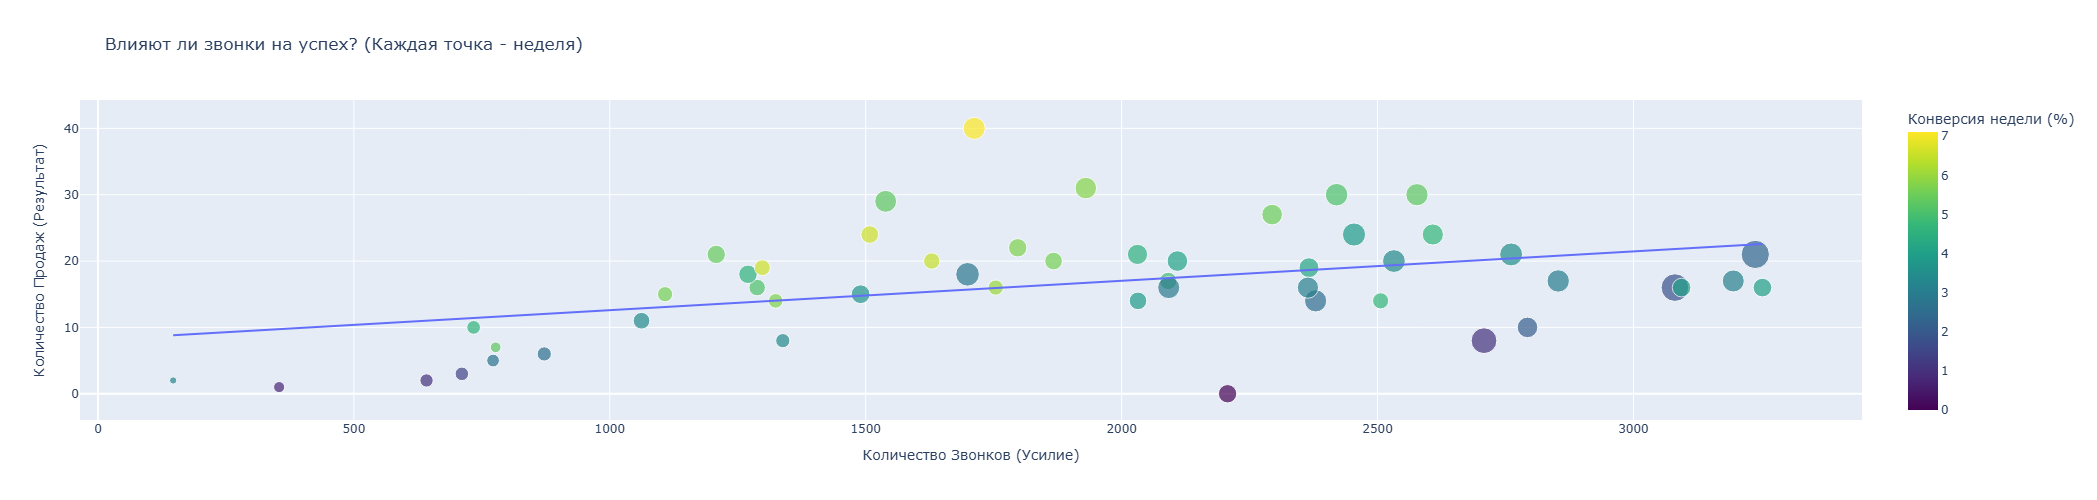


КОРРЕЛЯЦИЯ:
• Связь 'Звонки → Продажи': 0.43
• Связь 'Лиды → Продажи': 0.54

ВЫВОД: Продажи растут в основном за счет трафика, звонки — обслуживающая функция.


In [9]:
# Ячейка 9
print("АНАЛИЗ ВЛИЯНИЯ: СВЯЗЬ ЗВОНКОВ И ПРОДАЖ")

# Данные уже подготовлены в weekly_stats (из ячейки 9)

# --- МАТРИЦА ВЛИЯНИЯ ---
fig_impact = px.scatter(
    weekly_stats,
    x='Calls_Count',
    y='Success_Count',
    size='Leads_Count',
    color='Conversion_Rate',
    hover_data=['Week', 'Calls_Per_Lead'],
    title='Влияют ли звонки на успех? (Каждая точка - неделя)',
    labels={
        'Calls_Count': 'Количество Звонков (Усилие)',
        'Success_Count': 'Количество Продаж (Результат)',
        'Leads_Count': 'Объем Лидов (Трафик)',
        'Conversion_Rate': 'Конверсия недели (%)'
    },
    color_continuous_scale='Viridis',
    height=500
)

# Линия тренда
fig_impact.add_traces(
    px.scatter(weekly_stats, x='Calls_Count', y='Success_Count', trendline="ols").data[1]
)

fig_impact.show()

# --- КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ---
corr_calls_sales = weekly_stats['Calls_Count'].corr(weekly_stats['Success_Count'])
corr_leads_sales = weekly_stats['Leads_Count'].corr(weekly_stats['Success_Count'])

print(f"\nКОРРЕЛЯЦИЯ:")
print(f"• Связь 'Звонки → Продажи': {corr_calls_sales:.2f}")
print(f"• Связь 'Лиды → Продажи': {corr_leads_sales:.2f}")

if corr_calls_sales > corr_leads_sales:
    print("\nВЫВОД: Звонки влияют на продажи СИЛЬНЕЕ, чем просто рост трафика.")
else:
    print("\nВЫВОД: Продажи растут в основном за счет трафика, звонки — обслуживающая функция.")

РАСПРЕДЕЛЕНИЕ ЗВОНКОВ ДО ПРОДАЖИ


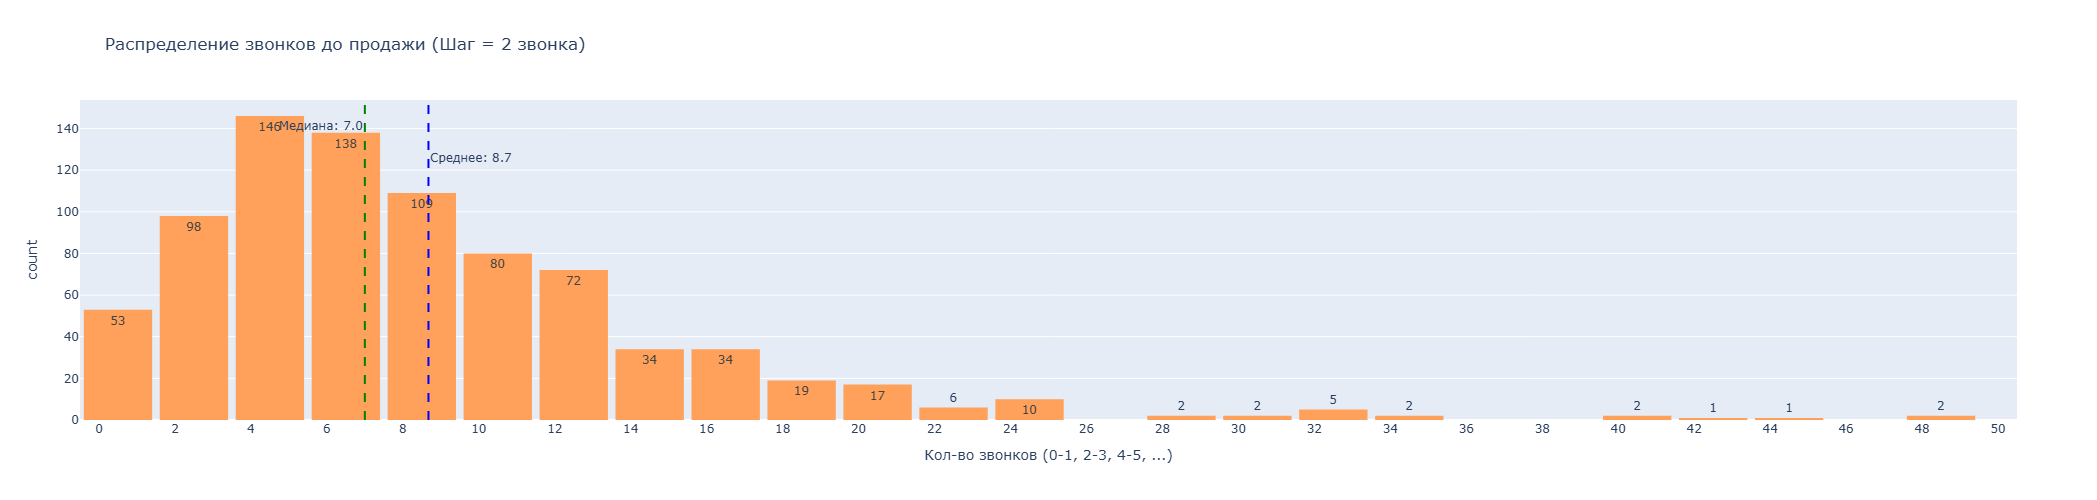


Распределение по группам звонков:


Группа звонков  Количество сделок Доля от общего
0     0.0-1.0 звонков                 53           6.4%
6     2.0-3.0 звонков                 98          11.8%
14    4.0-5.0 звонков                146          17.5%
19    6.0-7.0 звонков                138          16.6%
20    8.0-9.0 звонков                109          13.1%
1   10.0-11.0 звонков                 80           9.6%
2   12.0-13.0 звонков                 72           8.6%
3   14.0-15.0 звонков                 34           4.1%
4   16.0-17.0 звонков                 34           4.1%
5   18.0-19.0 звонков                 19           2.3%
7   20.0-21.0 звонков                 17           2.0%
8   22.0-23.0 звонков                  6           0.7%
9   24.0-25.0 звонков                 10           1.2%
10  28.0-29.0 звонков                  2           0.2%
11  30.0-31.0 звонков                  2           0.2%
12  32.0-33.0 звонков                  5           0.6%
13  34.0-35.0 звонков                  2           0.2%
15  40.0-41.0 звонков                  2           0.2%
16  42.0-43.0 звонков                  1           0.1%
17  44.0-45.0 звонков                  1           0.1%
18  48.0-49.0 звонков                  2           0.2%


Ключевые метрики:
• Сделок без звонков: 21 (2.5%)
• Сделок до 5 звонков: 297 (35.7%)


In [10]:
# Ячейка 10
print("РАСПРЕДЕЛЕНИЕ ЗВОНКОВ ДО ПРОДАЖИ")

# 1. Подготовка данных (Успешные студенты)
success_deals = deals[
    (deals['stage_normalized'] == 'Active Student') & 
    (deals['Closing Date'].notna()) &
    (deals['Contact Name'].notna()) & 
    (deals['Contact Name'] != '')
][['Id', 'Contact Name', 'Closing Date', 'Deal Owner Name']].copy()

# 2. Подготовка звонков
calls_dates = calls[
    (calls['CONTACTID'].notna()) & 
    (calls['CONTACTID'] != '')
][['CONTACTID', 'Call Start Time']].copy()

# 3. Объединение и фильтрация
merged_calls = success_deals.merge(
    calls_dates, 
    left_on='Contact Name', 
    right_on='CONTACTID', 
    how='left'
)

valid_calls = merged_calls[
    (merged_calls['Call Start Time'].notna()) &
    (merged_calls['Call Start Time'].dt.normalize() <= merged_calls['Closing Date'].dt.normalize())
]

# 4. Подсчет по сделкам
calls_per_deal = valid_calls.groupby('Id')['Call Start Time'].count().reset_index()
calls_per_deal.columns = ['Id', 'Calls_Count']

# 5. Финальный DataFrame
final_calls_stats = pd.DataFrame(success_deals[['Id', 'Deal Owner Name']]).merge(calls_per_deal, on='Id', how='left').fillna(0)

# 6. Статистика
avg_calls = final_calls_stats['Calls_Count'].mean()
median_calls = final_calls_stats['Calls_Count'].median()
max_calls = final_calls_stats['Calls_Count'].max()
total_deals = len(final_calls_stats)

# 7. Группировка по 2 звонка
final_calls_stats['Call_Group'] = (final_calls_stats['Calls_Count'] // 2) * 2
final_calls_stats['Call_Group_Label'] = final_calls_stats['Call_Group'].astype(str) + '-' + (final_calls_stats['Call_Group'] + 1).astype(str) + ' звонков'

group_stats = final_calls_stats.groupby('Call_Group_Label').agg({
    'Id': ['count', lambda x: f"{(len(x)/total_deals*100):.1f}%"]
}).round(1)
group_stats.columns = ['Количество сделок', 'Доля от общего']
group_stats = group_stats.reset_index().rename(columns={'Call_Group_Label': 'Группа звонков'})
group_stats['Sort_Key'] = group_stats['Группа звонков'].str.extract(r'(\d+)').astype(int)
group_stats = group_stats.sort_values('Sort_Key').drop('Sort_Key', axis=1)

# 8. Дополнительные метрики
deals_without_calls = len(final_calls_stats[final_calls_stats['Calls_Count'] == 0])
deals_under_5_calls = len(final_calls_stats[final_calls_stats['Calls_Count'] <= 5])

# --- ГИСТОГРАММА ---
fig_hist = px.histogram(
    final_calls_stats, 
    x='Calls_Count',
    title='Распределение звонков до продажи (Шаг = 2 звонка)',
    labels={'Calls_Count': 'Количество звонков', 'count': 'Кол-во сделок'},
    text_auto=True,
    color_discrete_sequence=['#FFA15A']
)

# Настройка бинов
max_calls_value = final_calls_stats['Calls_Count'].max()
x_range_max = ((max_calls_value // 2) + 1) * 2 + 0.5
fig_hist.update_traces(xbins=dict(start=-0.5, size=2))
fig_hist.update_xaxes(
    range=[-0.5, x_range_max], 
    dtick=2, 
    title_text="Кол-во звонков (0-1, 2-3, 4-5, ...)"
)

# Линии
fig_hist.add_vline(
    x=median_calls, 
    line_dash="dash", 
    line_color="green", 
    annotation_text=f"Медиана: {median_calls}",
    annotation_position="top left",
    annotation_y=0.95
)

fig_hist.add_vline(
    x=avg_calls, 
    line_dash="dash", 
    line_color="blue", 
    annotation_text=f"Среднее: {avg_calls:.1f}",
    annotation_position="top right",
    annotation_y=0.85
)

fig_hist.update_layout(
    bargap=0.1,
    xaxis=dict(tickmode='linear', dtick=2),
    height=500,
    margin=dict(t=100)
)
fig_hist.show()

# --- ТАБЛИЦА ГРУПП ---
print("\nРаспределение по группам звонков:")
display(group_stats)

# --- КЛЮЧЕВЫЕ МЕТРИКИ ---
print(f"\nКлючевые метрики:")
print(f"• Сделок без звонков: {deals_without_calls} ({deals_without_calls/total_deals*100:.1f}%)")
print(f"• Сделок до 5 звонков: {deals_under_5_calls} ({deals_under_5_calls/total_deals*100:.1f}%)")

АНАЛИЗ СКОРОСТИ ЗАКРЫТИЯ СДЕЛОК
Сводная статистика:


Метрика         Дни
0   Среднее   52.008353
1   Медиана   27.000000
2   Минимум    0.000000
3  Максимум  325.000000

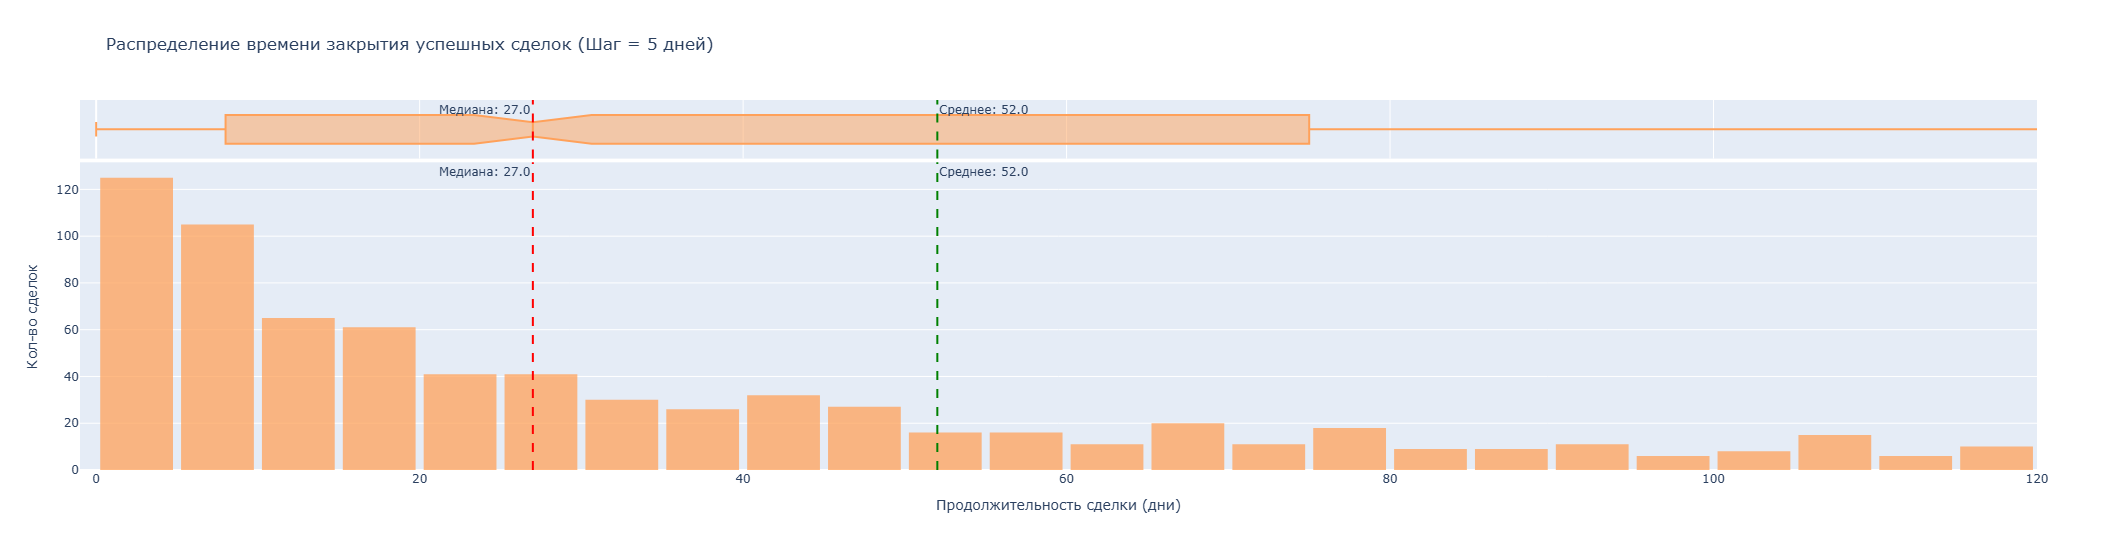

In [11]:
# Ячейка 11
print("АНАЛИЗ СКОРОСТИ ЗАКРЫТИЯ СДЕЛОК")

# --- Фильтрация ---
active_student_ids = deals[deals['stage_normalized'] == 'Active Student']['Id'].unique()
closed_deals_clean = deals[
    (deals['Id'].isin(active_student_ids)) & 
    (deals['Closing Date'].notna()) & 
    (deals['Deal_Age_days'].notna()) & 
    (deals['Deal_Age_days'] >= 0)
].copy()

# --- Статистика ---
mean_age = closed_deals_clean['Deal_Age_days'].mean()
median_age = closed_deals_clean['Deal_Age_days'].median()
min_age = closed_deals_clean['Deal_Age_days'].min()
max_age = closed_deals_clean['Deal_Age_days'].max()

# --- Таблица статистик ---
stats_df = pd.DataFrame({
    'Метрика': ['Среднее', 'Медиана', 'Минимум', 'Максимум'],
    'Дни': [mean_age, median_age, min_age, max_age]
})
print("Сводная статистика:")
display(stats_df)

# --- Гистограмма ---
fig = px.histogram(
    closed_deals_clean, 
    x='Deal_Age_days', 
    title='Распределение времени закрытия успешных сделок (Шаг = 5 дней)',
    color_discrete_sequence=['#FFA15A'],
    marginal='box',  # создает вторую ось X (xaxis2)
    opacity=0.75
)

# Настройка бинов
fig.update_traces(xbins=dict(start=0, size=5), selector=dict(type='histogram'))

# Линии медианы и среднего
fig.add_vline(
    x=median_age, line_width=2, line_dash="dash", line_color="red",
    annotation_text=f"Медиана: {median_age:.1f}", annotation_position="top left"
)
fig.add_vline(
    x=mean_age, line_width=2, line_dash="dash", line_color="green",
    annotation_text=f"Среднее: {mean_age:.1f}", annotation_position="top right"
)

# Настройки осей и оформления
fig.update_xaxes(range=[-1, 120], title_text='Продолжительность сделки (дни)')  # только основная ось X
fig.update_layout(
    yaxis_title='Кол-во сделок', 
    showlegend=False, 
    bargap=0.1,
    height=550
)

# Убираем заголовок со второй оси X, которую создал marginal='box'
if 'xaxis2' in fig.layout:
    fig.layout.xaxis2.title = None
    fig.layout.xaxis2.showticklabels = False

fig.show()


МАРКЕТИНГОВЫЙ ДАШБОРД: ВОРОНКА И РАСХОДЫ


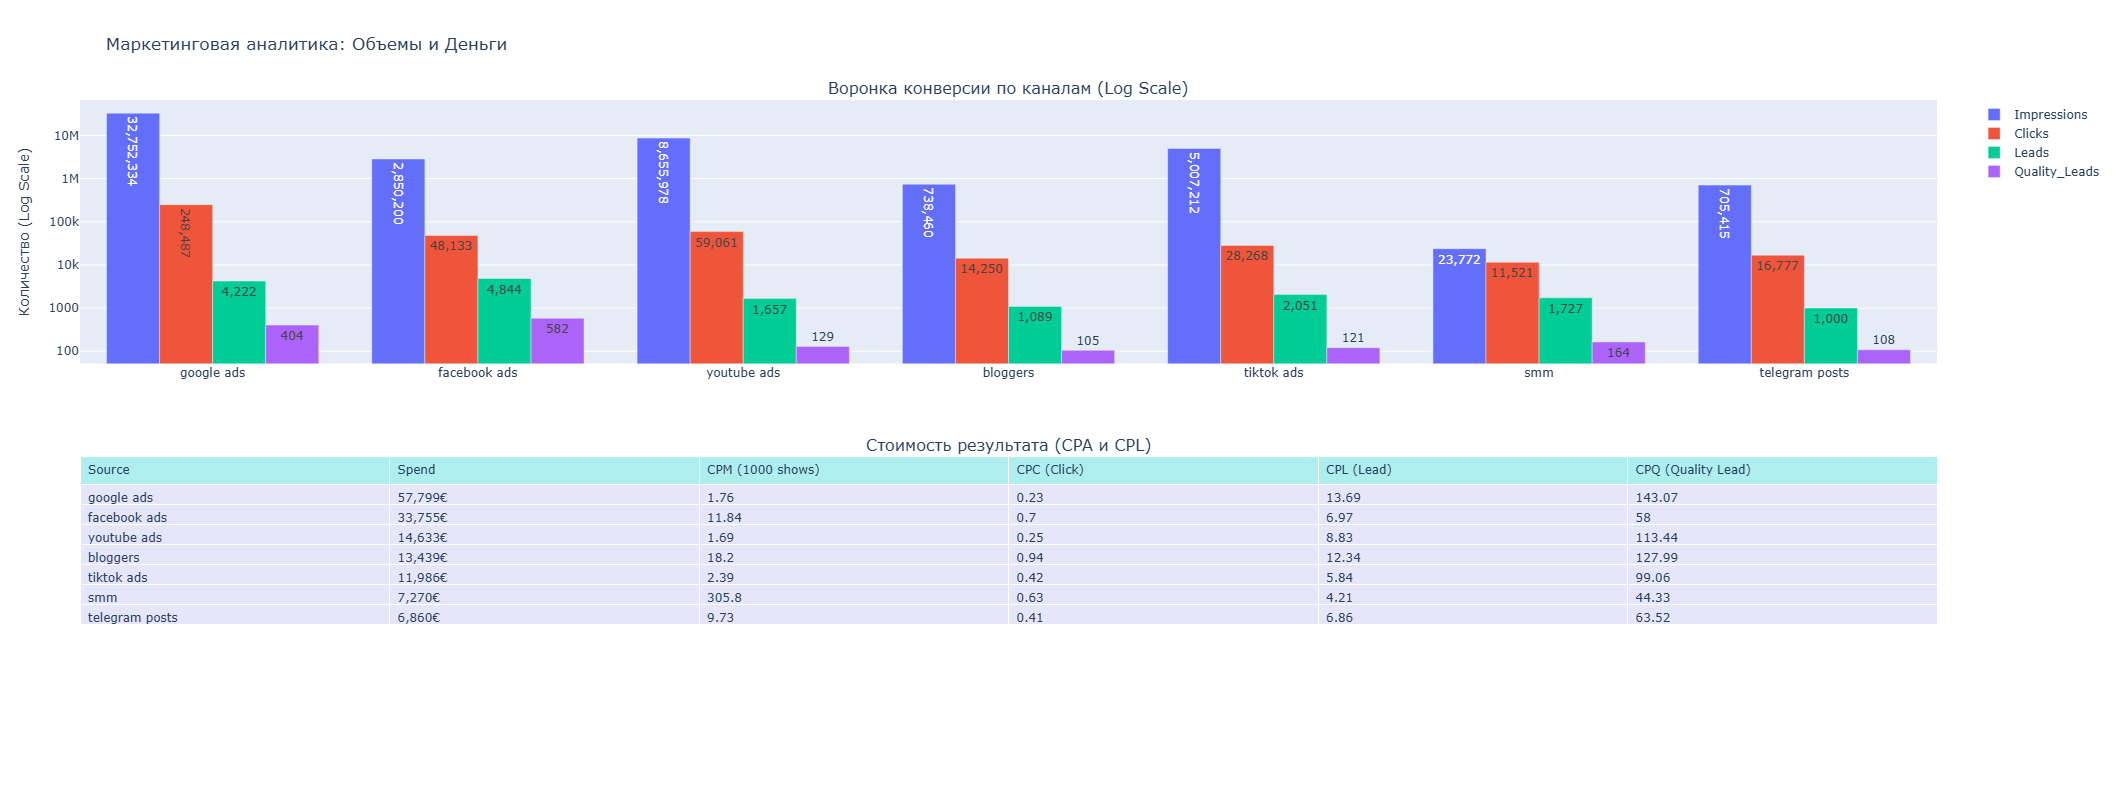


ПОЯСНЕНИЕ:
1. График сверху в логарифмической шкале! Это позволяет видеть и 1 млн показов, и 100 лидов на одном экране.
2. Таблица снизу показывает, сколько мы платим за каждое действие.
3. Сравните CPL (цена заявки) и CPQ (цена качественной заявки). Если разрыв большой — трафик мусорный.


In [12]:
# Ячейка 12: Маркетинговая воронка и эффективность расходов (Plotly Dashboard)
# 1. Воронка: Impressions -> Clicks -> Leads -> Quality Leads
# 2. Деньги: Сколько стоит каждый этап?

print("МАРКЕТИНГОВЫЙ ДАШБОРД: ВОРОНКА И РАСХОДЫ")

# 1. Подготовка данных
# Агрегация Spend
spend_agg = spend.groupby('Source').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spend': 'sum'
}).reset_index()

# Агрегация Deals
leads_agg = deals.groupby('Source')['Id'].count().reset_index().rename(columns={'Id': 'Leads'})
quality_filter = ['A - High', 'B - Medium']
qual_leads_agg = deals[deals['Quality'].isin(quality_filter)].groupby('Source')['Id'].count().reset_index().rename(columns={'Id': 'Quality_Leads'})

# Объединение
funnel_df = spend_agg.merge(leads_agg, on='Source', how='left').merge(qual_leads_agg, on='Source', how='left').fillna(0)

# Сортируем и берем Топ-7 по расходам (чтобы не засорять график мелочью)
top_funnel = funnel_df.sort_values(by='Spend', ascending=False).head(7)

# 2. Визуализация (Subplots)
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Воронка конверсии по каналам (Log Scale)", "Стоимость результата (CPA и CPL)"),
    vertical_spacing=0.15,
    specs=[[{"type": "bar"}], [{"type": "table"}]] # Во втором ряду сделаем таблицу, или можно график
)

# --- График 1: Группированная воронка ---
# Используем логарифмическую шкалу, чтобы маленькие столбики лидов были видны рядом с огромными показами
stages = ['Impressions', 'Clicks', 'Leads', 'Quality_Leads']
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA']

for i, stage in enumerate(stages):
    fig.add_trace(
        go.Bar(
            name=stage,
            x=top_funnel['Source'],
            y=top_funnel[stage],
            text=top_funnel[stage].apply(lambda x: f"{x:,.0f}"),
            textposition='auto',
            marker_color=colors[i]
        ),
        row=1, col=1
    )

# Настройка оси Y (Log)
fig.update_yaxes(type="log", title_text="Количество (Log Scale)", row=1, col=1)


# --- График 2: Таблица с деньгами (Информативнее, чем график, для точных цифр) ---
# Считаем цены
top_funnel['CPM'] = (top_funnel['Spend'] / top_funnel['Impressions'] * 1000).replace([np.inf], 0).round(2)
top_funnel['CPC'] = (top_funnel['Spend'] / top_funnel['Clicks']).replace([np.inf], 0).round(2)
top_funnel['CPL (Lead)'] = (top_funnel['Spend'] / top_funnel['Leads']).replace([np.inf], 0).round(2)
top_funnel['CPQ (Quality)'] = (top_funnel['Spend'] / top_funnel['Quality_Leads']).replace([np.inf], 0).round(2)

fig.add_trace(
    go.Table(
        header=dict(
            values=['Source', 'Spend', 'CPM (1000 shows)', 'CPC (Click)', 'CPL (Lead)', 'CPQ (Quality Lead)'],
            fill_color='paleturquoise',
            align='left'
        ),
        cells=dict(
            values=[
                top_funnel['Source'],
                top_funnel['Spend'].apply(lambda x: f"{x:,.0f}€"),
                top_funnel['CPM'],
                top_funnel['CPC'],
                top_funnel['CPL (Lead)'],
                top_funnel['CPQ (Quality)']
            ],
            fill_color='lavender',
            align='left'
        )
    ),
    row=2, col=1
)

fig.update_layout(height=800, title_text="Маркетинговая аналитика: Объемы и Деньги", barmode='group')
fig.show()

print("\nПОЯСНЕНИЕ:")
print("1. График сверху в логарифмической шкале! Это позволяет видеть и 1 млн показов, и 100 лидов на одном экране.")
print("2. Таблица снизу показывает, сколько мы платим за каждое действие.")
print("3. Сравните CPL (цена заявки) и CPQ (цена качественной заявки). Если разрыв большой — трафик мусорный.")

АНАЛИЗ ПЛАТНЫХ ИСТОЧНИКОВ: КАЧЕСТВО И ЭФФЕКТИВНОСТЬ
Сводная таблица по источникам:


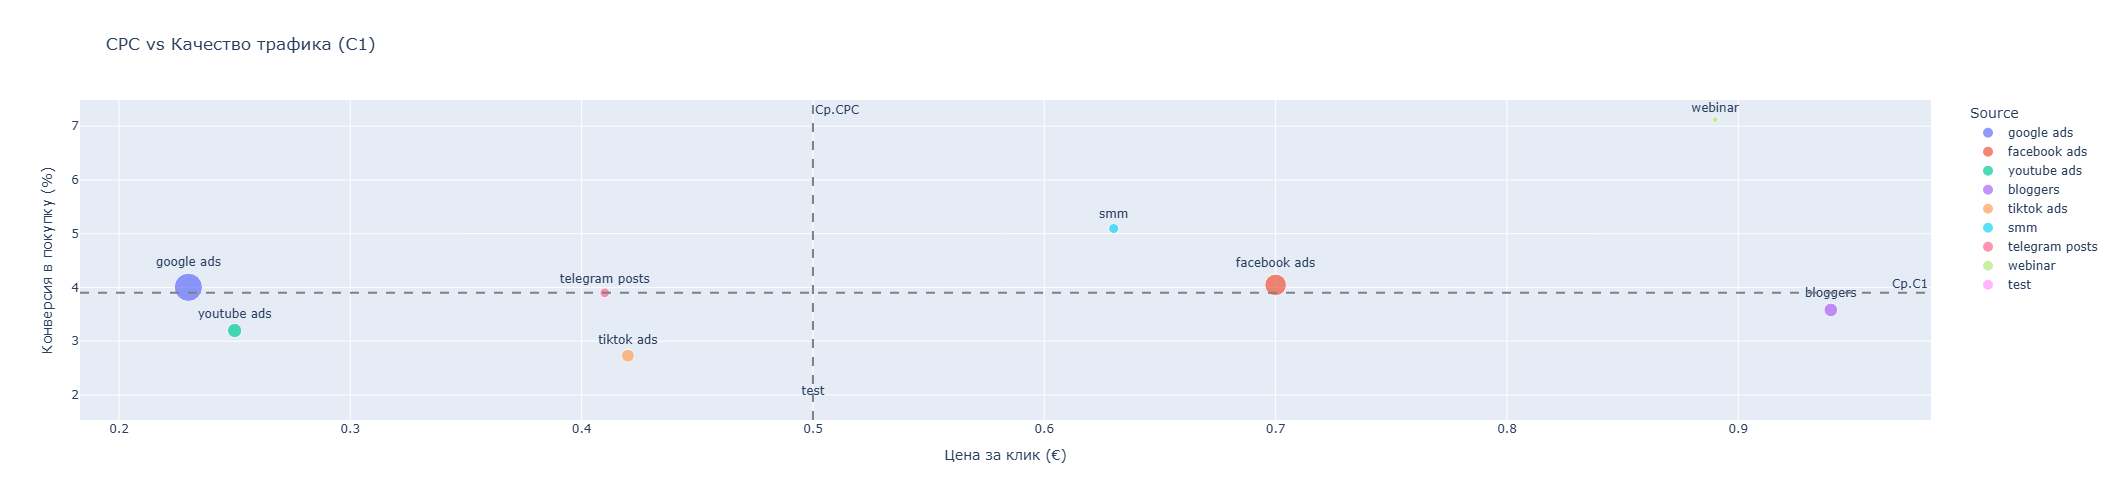


КЛЮЧЕВЫЕ МЕТРИКИ:
• CPC - цена клика
• C1_Quality - конверсия в покупку (%)
• Share_Full_Payment_Pct - доля полных оплат
• Median_Speed_Days - скорость закрытия
• Collected_Pct - % собранных денег от контракта


In [13]:
# Ячейка 13
print("АНАЛИЗ ПЛАТНЫХ ИСТОЧНИКОВ: КАЧЕСТВО И ЭФФЕКТИВНОСТЬ")

# 1. Платные источники (CPC, C1)
spend_metrics = spend.groupby('Source').agg({'Spend': 'sum', 'Clicks': 'sum', 'Impressions': 'sum'}).reset_index()
deals_metrics = deals.groupby('Source').agg({'Id': 'count', 'stage_normalized': lambda x: (x == 'Active Student').sum()}).reset_index().rename(columns={'Id': 'Leads', 'stage_normalized': 'Buyers'})
marketing_deep = spend_metrics.merge(deals_metrics, on='Source', how='inner')

marketing_deep['CPC'] = (marketing_deep['Spend'] / marketing_deep['Clicks']).replace([np.inf], 0).fillna(0).round(2)
marketing_deep['CTR'] = (marketing_deep['Clicks'] / marketing_deep['Impressions'] * 100).fillna(0).round(2)
marketing_deep['CPL'] = (marketing_deep['Spend'] / marketing_deep['Leads'])
marketing_deep['C1_Quality'] = (marketing_deep['Buyers'] / marketing_deep['Leads'] * 100)
paid_marketing = marketing_deep[(marketing_deep['Spend'] > 10)].sort_values(by='Spend', ascending=False).copy()

# 2. Качество оплат по источникам
deals['payment_ratio'] = deals['Initial Amount Paid'] / deals['Offer Total Amount']
deals_financial = deals[deals['stage_normalized'] == 'Active Student'].copy()
deals_financial['is_full_payment'] = (deals_financial['payment_ratio'] >= 0.99).astype(int)
source_quality = deals_financial.groupby('Source').agg({
    'Id': 'count',
    'is_full_payment': 'mean'
}).reset_index()
source_quality.columns = ['Source', 'Student_Count', 'Share_Full_Payment']
source_quality['Share_Full_Payment_Pct'] = (source_quality['Share_Full_Payment'] * 100).round(2)
source_quality = source_quality[source_quality['Student_Count'] >= 5].sort_values(by='Share_Full_Payment', ascending=False)

# 3. Объединение метрик
deals_success = deals[deals['stage_normalized'] == 'Active Student'].copy()
source_matrix = deals_success.groupby('Source').agg({
    'Id': 'count',
    'Deal_Age_days': 'median',
    'revenue': ['mean', 'sum'],
    'Offer Total Amount': 'sum'
}).reset_index()
source_matrix.columns = ['Source', 'Student_Count', 'Median_Speed_Days', 'Mean_Check', 'Total_Revenue', 'Total_Potential']
source_matrix = source_matrix[source_matrix['Student_Count'] >= 5]
source_matrix['Collected_Pct'] = (source_matrix['Total_Revenue'] / source_matrix['Total_Potential'] * 100).round(1)

# 4. Объединенная таблица
source_analysis = paid_marketing.merge(source_quality[['Source', 'Share_Full_Payment_Pct']], on='Source', how='left')
source_analysis = source_analysis.merge(source_matrix[['Source', 'Median_Speed_Days', 'Mean_Check', 'Collected_Pct']], on='Source', how='left')

print("Сводная таблица по источникам:")
display_cols = ['Source', 'Spend', 'CPC', 'C1_Quality', 'Share_Full_Payment_Pct', 'Median_Speed_Days', 'Mean_Check', 'Collected_Pct']
display(source_analysis[display_cols].sort_values(by='Spend', ascending=False).style.format({
    'Spend': '{:,.0f}',
    'CPC': '{:.2f}',
    'C1_Quality': '{:.2f}%',
    'Share_Full_Payment_Pct': '{:.1f}%',
    'Median_Speed_Days': '{:.1f}',
    'Mean_Check': '{:,.0f}',
    'Collected_Pct': '{:.1f}%'
}).background_gradient(subset=['C1_Quality', 'Share_Full_Payment_Pct'], cmap='RdYlGn'))

# Добавить в конец ячейки A (после display таблицы):
fig = px.scatter(
    paid_marketing,
    x='CPC',
    y='C1_Quality',
    size='Spend',
    color='Source',
    text='Source',
    title='CPC vs Качество трафика (C1)',
    labels={'CPC': 'Цена за клик (€)', 'C1_Quality': 'Конверсия в покупку (%)'},
    height=500
)
fig.add_vline(x=paid_marketing['CPC'].median(), line_dash="dash", line_color="gray", annotation_text="Ср.CPC")
fig.add_hline(y=paid_marketing['C1_Quality'].median(), line_dash="dash", line_color="gray", annotation_text="Ср.C1")
fig.update_traces(textposition='top center')
fig.show()

print("\nКЛЮЧЕВЫЕ МЕТРИКИ:")
print("• CPC - цена клика")
print("• C1_Quality - конверсия в покупку (%)")
print("• Share_Full_Payment_Pct - доля полных оплат")
print("• Median_Speed_Days - скорость закрытия")
print("• Collected_Pct - % собранных денег от контракта")

МАТРИЦА ЭФФЕКТИВНОСТИ ИСТОЧНИКОВ: СКОРОСТЬ VS ЧЕК


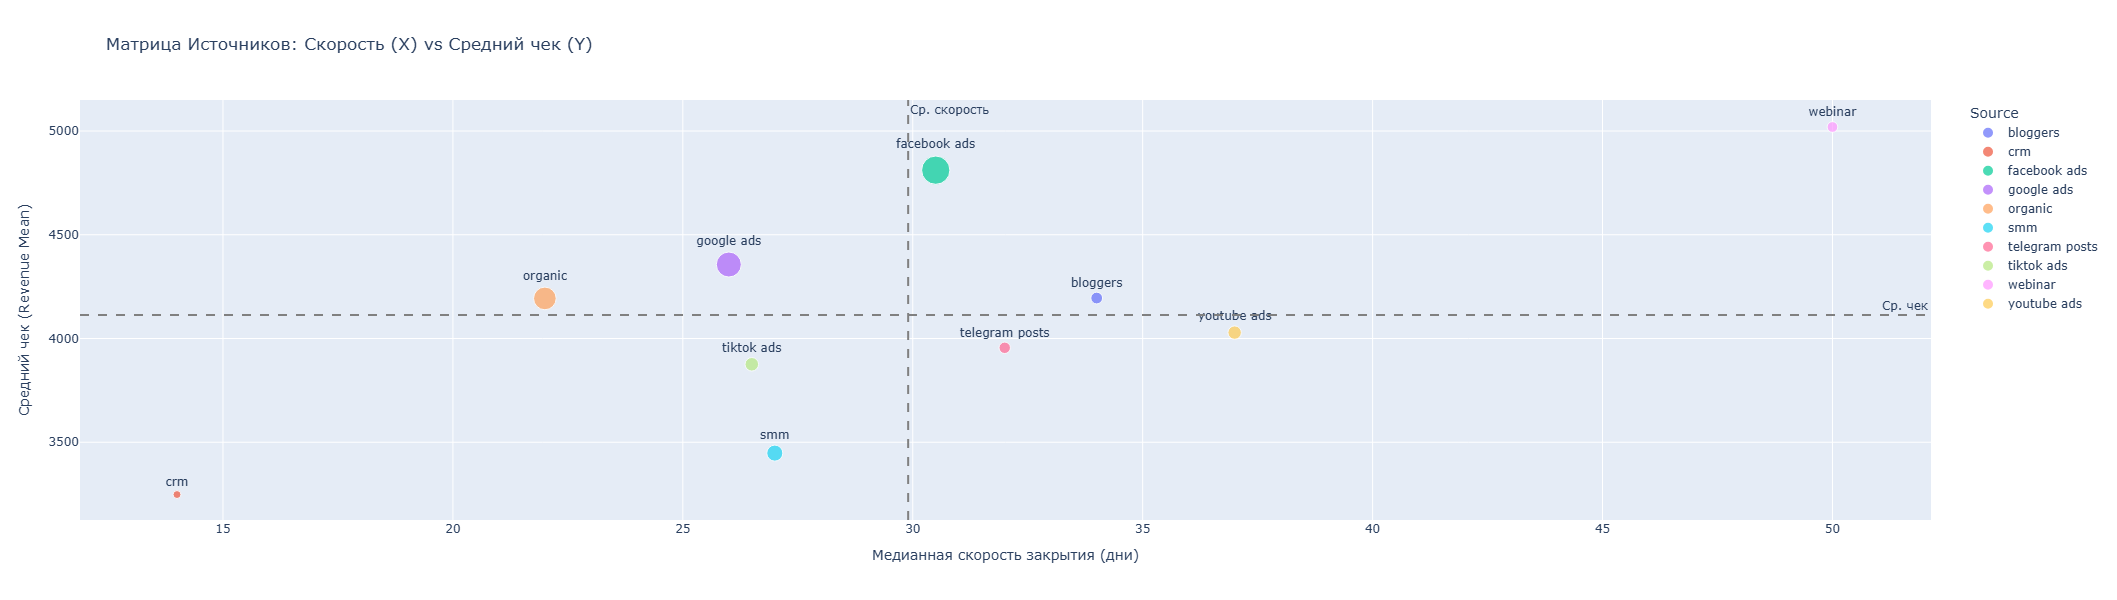

Финансовые показатели и лиды по источникам:



ИНТЕРПРЕТАЦИЯ:
• Total_Leads - всего лидов из источника
• Quality_Leads - лиды качества A-B
• Quality_Leads_Share - доля качественных лидов (%)
• Student_Count - оплатившие студенты
• Collected_Pct < 100%: клиенты платят частями


In [14]:
# Ячейка 14
print("МАТРИЦА ЭФФЕКТИВНОСТИ ИСТОЧНИКОВ: СКОРОСТЬ VS ЧЕК")

# Данные уже рассчитаны в предыдущей ячейке (source_matrix)
# Если запускаем отдельно - пересчитываем
deals_success = deals[deals['stage_normalized'] == 'Active Student'].copy()

# ДОБАВЛЯЕМ: Лиды и Качественные лиды по источникам
lead_counts = deals.groupby('Source').agg({
    'Id': 'count'  # Все лиды
}).reset_index().rename(columns={'Id': 'Total_Leads'})

# Качественные лиды (A-B)
quality_filter = ['A - High', 'B - Medium']
quality_leads = deals[deals['Quality'].isin(quality_filter)].groupby('Source')['Id'].count().reset_index().rename(columns={'Id': 'Quality_Leads'})

# Объединяем с основной таблицей
source_matrix = deals_success.groupby('Source').agg({
    'Id': 'count',
    'Deal_Age_days': 'median',
    'revenue': ['mean', 'sum'],
    'Offer Total Amount': 'sum'
}).reset_index()

source_matrix.columns = ['Source', 'Student_Count', 'Median_Speed_Days', 'Mean_Check', 'Total_Revenue', 'Total_Potential']
source_matrix = source_matrix[source_matrix['Student_Count'] >= 5]

# Добавляем лиды
source_matrix = source_matrix.merge(lead_counts, on='Source', how='left')
source_matrix = source_matrix.merge(quality_leads, on='Source', how='left')
source_matrix['Quality_Leads_Share'] = (source_matrix['Quality_Leads'] / source_matrix['Total_Leads'] * 100).round(1)

source_matrix['Collected_Pct'] = (source_matrix['Total_Revenue'] / source_matrix['Total_Potential'] * 100).round(1)

# Визуализация (остается без изменений)
fig = px.scatter(
    source_matrix,
    x='Median_Speed_Days',
    y='Mean_Check',
    size='Total_Revenue',
    color='Source',
    text='Source',
    title='Матрица Источников: Скорость (X) vs Средний чек (Y)',
    labels={
        'Median_Speed_Days': 'Медианная скорость закрытия (дни)', 
        'Mean_Check': 'Средний чек (Revenue Mean)',
        'Total_Revenue': 'Общая выручка'
    },
    height=600
)

# Линии средних
avg_speed = source_matrix['Median_Speed_Days'].mean()
avg_check = source_matrix['Mean_Check'].mean()

fig.add_vline(x=avg_speed, line_dash="dash", line_color="gray", annotation_text="Ср. скорость")
fig.add_hline(y=avg_check, line_dash="dash", line_color="gray", annotation_text="Ср. чек")

fig.update_traces(textposition='top center')
fig.show()

# ОБНОВЛЕННАЯ ТАБЛИЦА с лидами
print("Финансовые показатели и лиды по источникам:")
display_cols = ['Source', 'Total_Leads', 'Quality_Leads', 'Quality_Leads_Share', 'Student_Count', 
                'Total_Revenue', 'Total_Potential', 'Collected_Pct', 'Mean_Check']

display(source_matrix[display_cols].sort_values(by='Total_Revenue', ascending=False).style.format({
    'Total_Revenue': '{:,.0f}',
    'Total_Potential': '{:,.0f}',
    'Mean_Check': '{:,.0f}',
    'Quality_Leads_Share': '{:.1f}%',
    'Collected_Pct': '{:.1f}%'
}).background_gradient(subset=['Quality_Leads_Share', 'Collected_Pct'], cmap='RdYlGn'))

print("\nИНТЕРПРЕТАЦИЯ:")
print("• Total_Leads - всего лидов из источника")
print("• Quality_Leads - лиды качества A-B")
print("• Quality_Leads_Share - доля качественных лидов (%)")
print("• Student_Count - оплатившие студенты")
print("• Collected_Pct < 100%: клиенты платят частями")

ЭФФЕКТИВНОСТЬ КАМПАНИЙ И ROI
1. ТОП-15 кампаний по Efficiency Ratio:


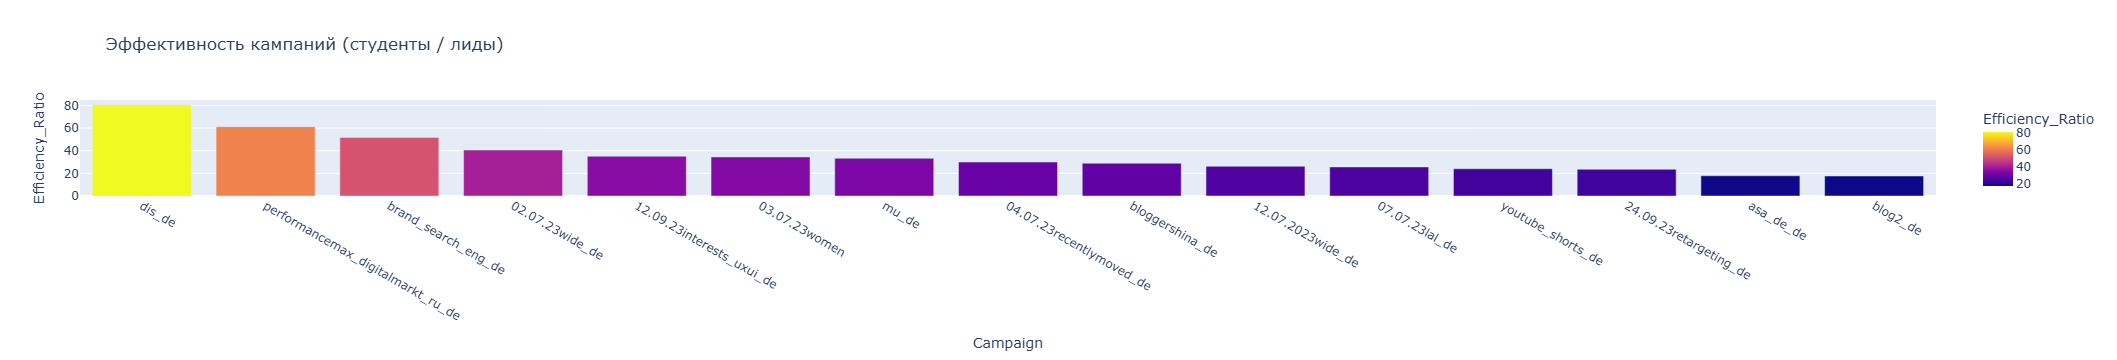

Campaign  Count_Leads  Count_Active_Students  \
63                             dis_de         36.0                   29.0   
88  performancemax_digitalmarkt_ru_de        178.0                  109.0   
58                brand_search_eng_de         29.0                   15.0   
2                     02.07.23wide_de        128.0                   52.0   
16          12.09.23interests_uxui_de         74.0                   26.0   
3                       03.07.23women         84.0                   29.0   
86                              mu_de         21.0                    7.0   
4            04.07.23recentlymoved_de        100.0                   30.0   
57                    bloggershina_de         38.0                   11.0   
15                  12.07.2023wide_de        183.0                   48.0   

    Efficiency_Ratio  
63             80.56  
88             61.24  
58             51.72  
2              40.62  
16             35.14  
3              34.52  
86             33.33  
4              30.00  
57             28.95  
15             26.23


2. ROI по источникам трафика:


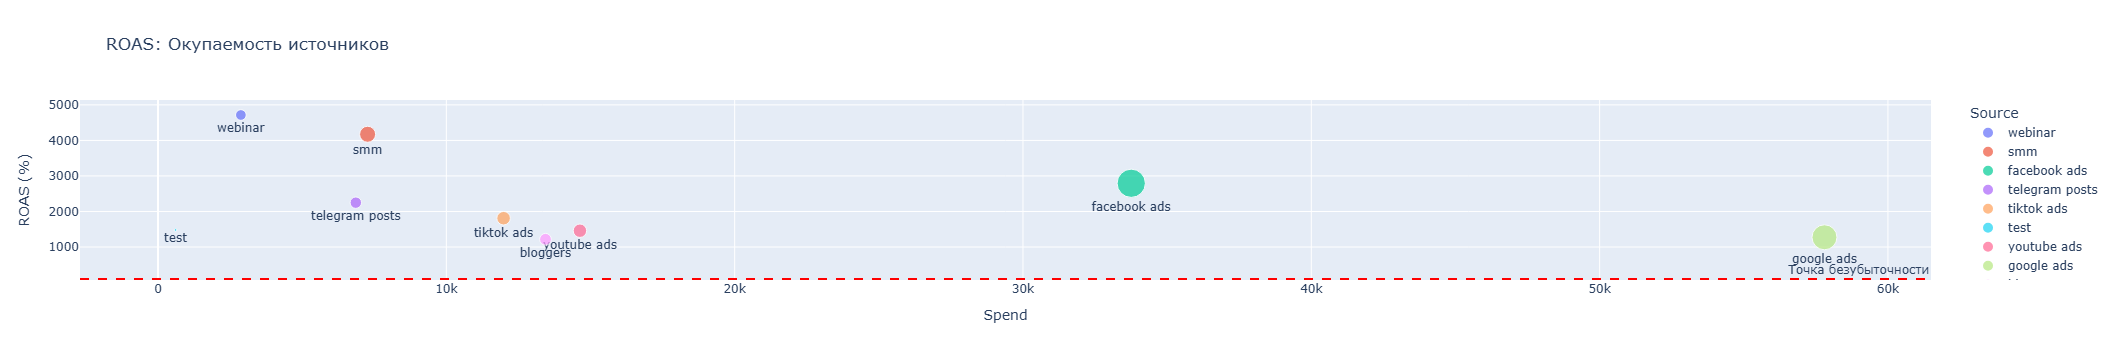

Source     Spend  Students_Count    revenue     CAC  ROAS_Pct
12         webinar   2874.04            27.0  135525.00  106.45   4715.49
8              smm   7269.52            88.0  303383.15   82.61   4173.36
2     facebook ads  33754.72           196.0  943020.95  172.22   2793.75
9   telegram posts   6860.36            39.0  154252.10  175.91   2248.45
11      tiktok ads  11985.67            56.0  217035.00  214.03   1810.79
10            test    608.21             3.0    9000.00  202.74   1479.75
13     youtube ads  14633.33            53.0  213503.50  276.10   1459.02
3       google ads  57798.60           169.0  736254.20  342.00   1273.83
0         bloggers  13439.00            39.0  163605.00  344.59   1217.39


ВЫВОД:
• Кампании: какие конкретные рекламные кампании лучше конвертируют лидов в студентов
• Источники: какие каналы трафика (facebook, google) дают лучшую окупаемость (ROAS)


In [15]:
# Ячейка 15
print("ЭФФЕКТИВНОСТЬ КАМПАНИЙ И ROI")

# 1. Efficiency Ratio КАМПАНИЙ (из deals.Campaign)
lead_counts = deals[deals['stage_normalized'] == 'Lead'].groupby('Campaign')['Id'].nunique().reset_index()
lead_counts.columns = ['Campaign', 'Count_Leads']
active_counts = deals[deals['stage_normalized'] == 'Active Student'].groupby('Campaign')['Id'].nunique().reset_index()
active_counts.columns = ['Campaign', 'Count_Active_Students']
campaign_df = lead_counts.merge(active_counts, on='Campaign', how='outer').fillna(0)
campaign_df['Efficiency_Ratio'] = (campaign_df['Count_Active_Students'] / campaign_df['Count_Leads'] * 100).replace([np.inf, -np.inf], 0).fillna(0).round(2)
campaign_efficiency = campaign_df[(campaign_df['Count_Leads'] + campaign_df['Count_Active_Students']) > 20].copy()

# 2. ROI/ROAS ИСТОЧНИКОВ (из spend.Source)
marketing_costs = spend.groupby('Source').agg({'Spend': 'sum', 'Clicks': 'sum'}).reset_index()
marketing_revenue = deals[deals['stage_normalized'] == 'Active Student'].groupby('Source').agg({
    'revenue': 'sum',
    'Id': 'count'
}).reset_index().rename(columns={'Id': 'Students_Count'})
marketing_roi = marketing_costs.merge(marketing_revenue, on='Source', how='left').fillna(0)
marketing_roi['CAC'] = (marketing_roi['Spend'] / marketing_roi['Students_Count']).replace([np.inf], 0).round(2)
marketing_roi['ROAS_Pct'] = (marketing_roi['revenue'] / marketing_roi['Spend'] * 100).replace([np.inf], 0).round(2)
marketing_roi['Avg_Check'] = (marketing_roi['revenue'] / marketing_roi['Students_Count']).fillna(0).round(2)
roi_analysis = marketing_roi[(marketing_roi['Spend'] > 0) & (marketing_roi['Students_Count'] > 0)].sort_values(by='ROAS_Pct', ascending=False)

# 3. Визуализации
print("1. ТОП-15 кампаний по Efficiency Ratio:")
fig1 = px.bar(
    campaign_efficiency.sort_values('Efficiency_Ratio', ascending=False).head(15),
    x='Campaign', y='Efficiency_Ratio', color='Efficiency_Ratio',
    title='Эффективность кампаний (студенты / лиды)'
)
fig1.show()
display(campaign_efficiency.sort_values('Efficiency_Ratio', ascending=False).head(10))

print("\n2. ROI по источникам трафика:")
fig2 = px.scatter(
    roi_analysis,
    x='Spend',
    y='ROAS_Pct',
    size='revenue',
    color='Source',
    text='Source',  # подписи источников
    title='ROAS: Окупаемость источников',
    labels={'ROAS_Pct': 'ROAS (%)'}
)
fig2.update_traces(textposition='bottom center')  # размещаем подписи снизу
fig2.add_hline(y=100, line_dash="dash", line_color="red", annotation_text="Точка безубыточности")
fig2.show()
display(roi_analysis[['Source', 'Spend', 'Students_Count', 'revenue', 'CAC', 'ROAS_Pct']])

print("\nВЫВОД:")
print("• Кампании: какие конкретные рекламные кампании лучше конвертируют лидов в студентов")
print("• Источники: какие каналы трафика (facebook, google) дают лучшую окупаемость (ROAS)")


АНАЛИЗ ЭФФЕКТИВНОСТИ ОТДЕЛА ПРОДАЖ (KPI 360°)


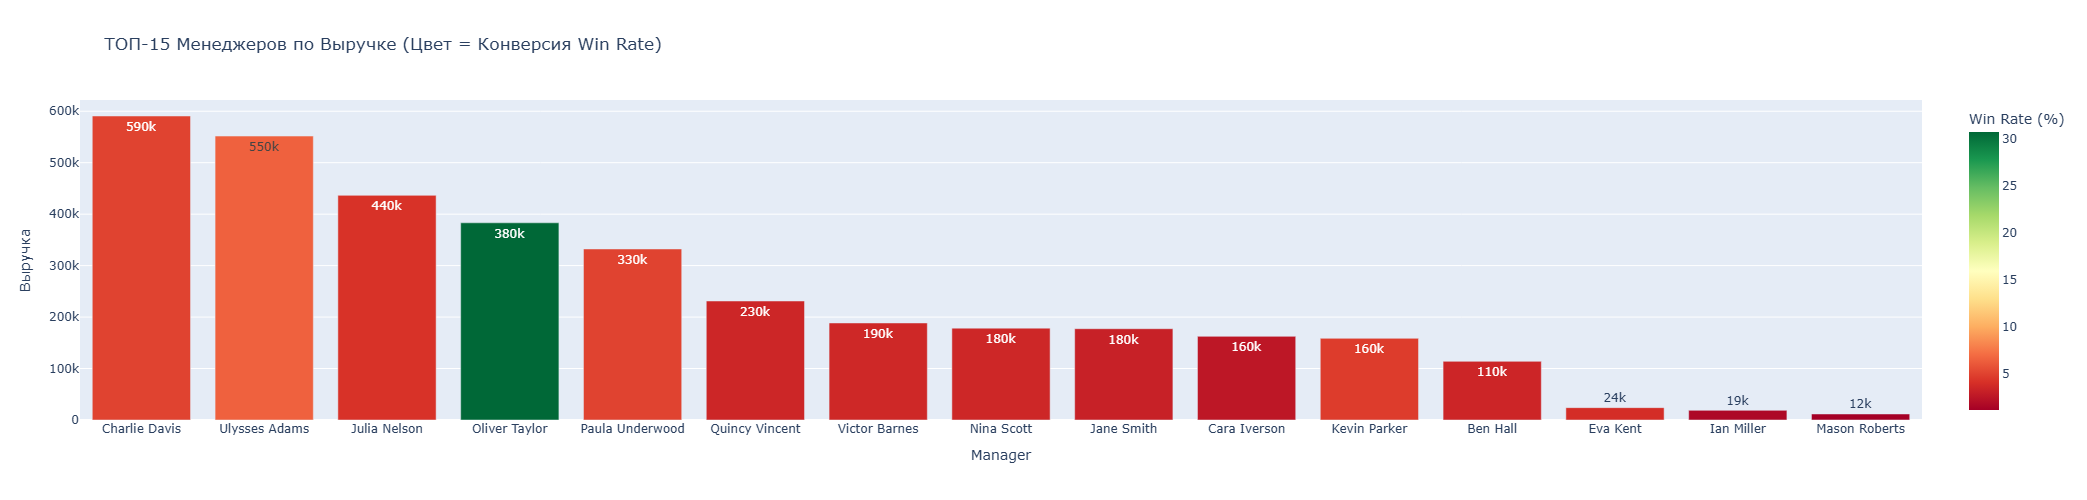

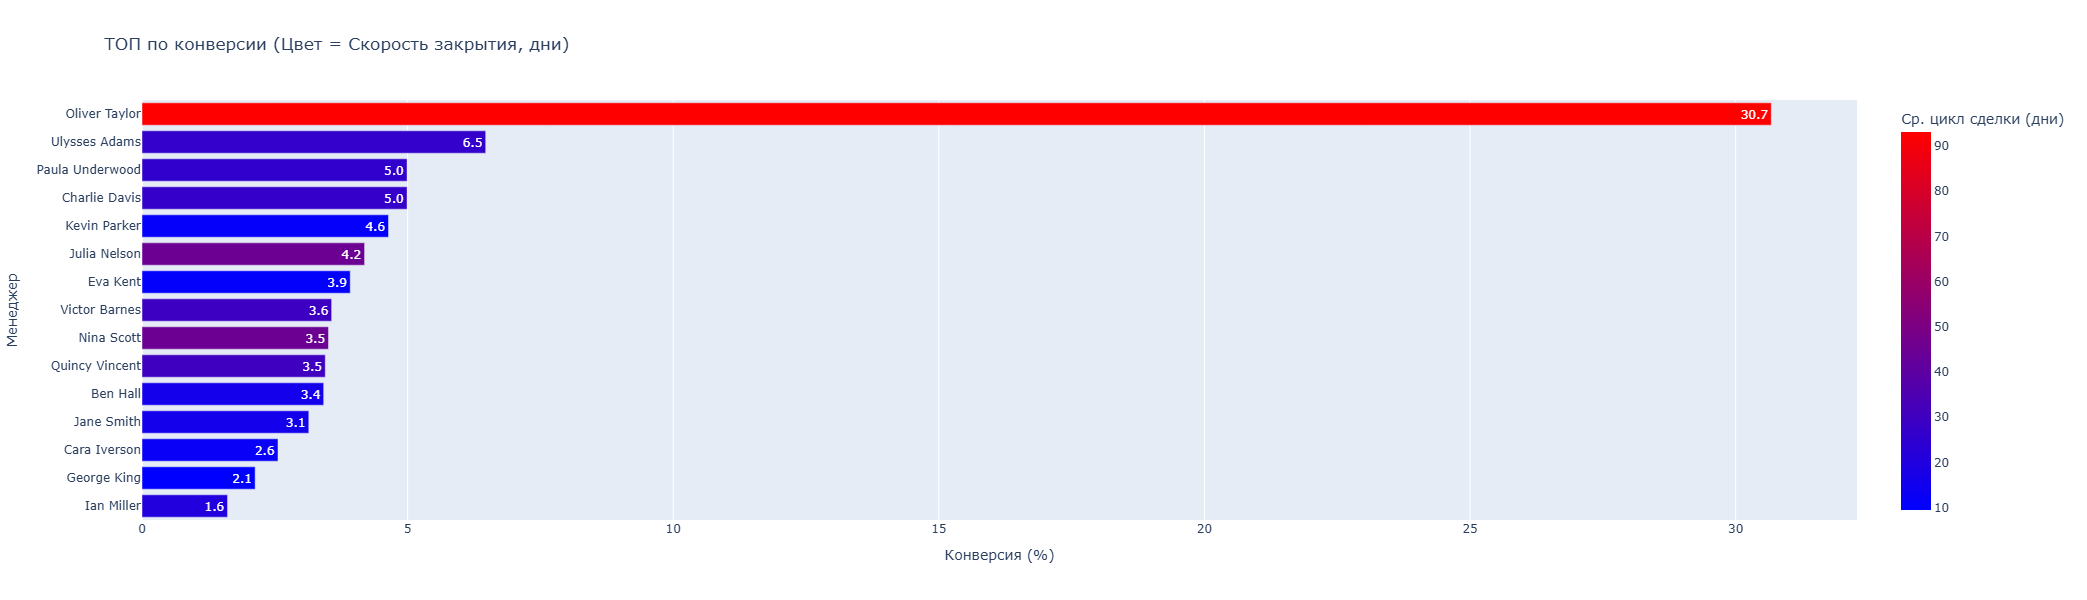

Сводная таблица KPI менеджеров:



КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:
1. Лидеры по выручке не всегда лидеры по конверсии.
2. Высокая конверсия при малом объеме может означать работу только с 'горячими' лидами.
3. Низкая конверсия при большом объеме требует аудита процесса продаж.
4. Скорость закрытия (Deal Age) показывает операционную эффективность.


In [26]:
# Ячейка 16
print("АНАЛИЗ ЭФФЕКТИВНОСТИ ОТДЕЛА ПРОДАЖ (KPI 360°)")

# 1. Подготовка данных (только чистые сделки)
df_clean = deals.copy()

# 2. Базовые метрики
manager_stats = df_clean.groupby('Deal Owner Name').agg(
    Leads=('Id', 'count'),
    Revenue=('revenue', 'sum'),
    Sales=('stage_normalized', lambda x: (x == 'Active Student').sum())
).reset_index().rename(columns={'Deal Owner Name': 'Manager'})

# 3. Скорость закрытия (только успешные)
speed_stats = df_clean[df_clean['stage_normalized'] == 'Active Student'].groupby('Deal Owner Name')['Deal_Age_days'].median().reset_index()
speed_stats.columns = ['Manager', 'Median_Deal_Age_Days']

# 4. Звонки (если есть)
if 'calls' in dfs:
    calls_agg = calls.groupby('CONTACTID')['Id'].count().reset_index().rename(columns={'Id': 'Calls_Count', 'CONTACTID': 'Contact Name'})
    deals_with_calls = df_clean[['Id', 'Deal Owner Name', 'Contact Name']].merge(calls_agg, on='Contact Name', how='left').fillna(0)
    calls_stats = deals_with_calls.groupby('Deal Owner Name')['Calls_Count'].mean().reset_index()
    calls_stats.columns = ['Manager', 'Avg_Calls_Per_Deal']
else:
    calls_stats = pd.DataFrame({'Manager': manager_stats['Manager'], 'Avg_Calls_Per_Deal': 0})

# 5. Сборка таблицы
final_stats = manager_stats.merge(speed_stats, on='Manager', how='left') \
                           .merge(calls_stats, on='Manager', how='left') \
                           .fillna(0)

# 6. Производные KPI
final_stats['Win_Rate'] = (final_stats['Sales'] / final_stats['Leads'] * 100).round(2)
final_stats['Avg_Check'] = (final_stats['Revenue'] / final_stats['Sales']).replace([np.inf], 0).fillna(0).round(0)

# Фильтр: менеджеры с > 10 лидов
top_managers = final_stats[final_stats['Leads'] >= 10].sort_values(by='Revenue', ascending=False)

# === ВИЗУАЛИЗАЦИИ ===

# График 1: Выручка с цветом Win Rate
fig1 = px.bar(
    top_managers.head(15),
    x='Manager', y='Revenue', 
    color='Win_Rate',
    text_auto='.2s',
    title='ТОП-15 Менеджеров по Выручке (Цвет = Конверсия Win Rate)',
    labels={'Revenue': 'Выручка', 'Win_Rate': 'Win Rate (%)'},
    color_continuous_scale='RdYlGn',
    height=500
)
fig1.update_layout(xaxis={'categoryorder':'total descending'})
fig1.show()

# График 2: Конверсия с цветом скорости
efficiency_view = top_managers.sort_values(by='Win_Rate', ascending=True).tail(15)
fig2 = px.bar(
    efficiency_view,
    x='Win_Rate', 
    y='Manager', 
    orientation='h', 
    color='Median_Deal_Age_Days',
    text_auto='.1f',
    title='ТОП по конверсии (Цвет = Скорость закрытия, дни)',
    labels={'Win_Rate': 'Конверсия (%)', 'Manager': 'Менеджер', 'Median_Deal_Age_Days': 'Ср. цикл сделки (дни)'},
    color_continuous_scale='Bluered',
    height=600
)
fig2.show()

# === ТАБЛИЦА ===
print("Сводная таблица KPI менеджеров:")
display_cols = ['Manager', 'Leads', 'Sales', 'Revenue', 'Win_Rate', 'Avg_Check', 'Median_Deal_Age_Days', 'Avg_Calls_Per_Deal']
display(top_managers[display_cols].style\
    .background_gradient(subset=['Revenue', 'Win_Rate'], cmap='Greens')\
    .format({'Revenue': '{:,.0f}', 'Avg_Check': '{:,.0f}', 'Avg_Calls_Per_Deal': '{:.1f}', 'Median_Deal_Age_Days': '{:.0f}'}))

# === ВЫВОДЫ ===
print("\nКЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:")
print("1. Лидеры по выручке не всегда лидеры по конверсии.")
print("2. Высокая конверсия при малом объеме может означать работу только с 'горячими' лидами.")
print("3. Низкая конверсия при большом объеме требует аудита процесса продаж.")
print("4. Скорость закрытия (Deal Age) показывает операционную эффективность.")

АНАЛИЗ СКОРОСТИ И КАЧЕСТВА (SLA & QUALITY)

1. ЗАВИСИМОСТЬ КОНВЕРСИИ ОТ СКОРОСТИ ОТВЕТА


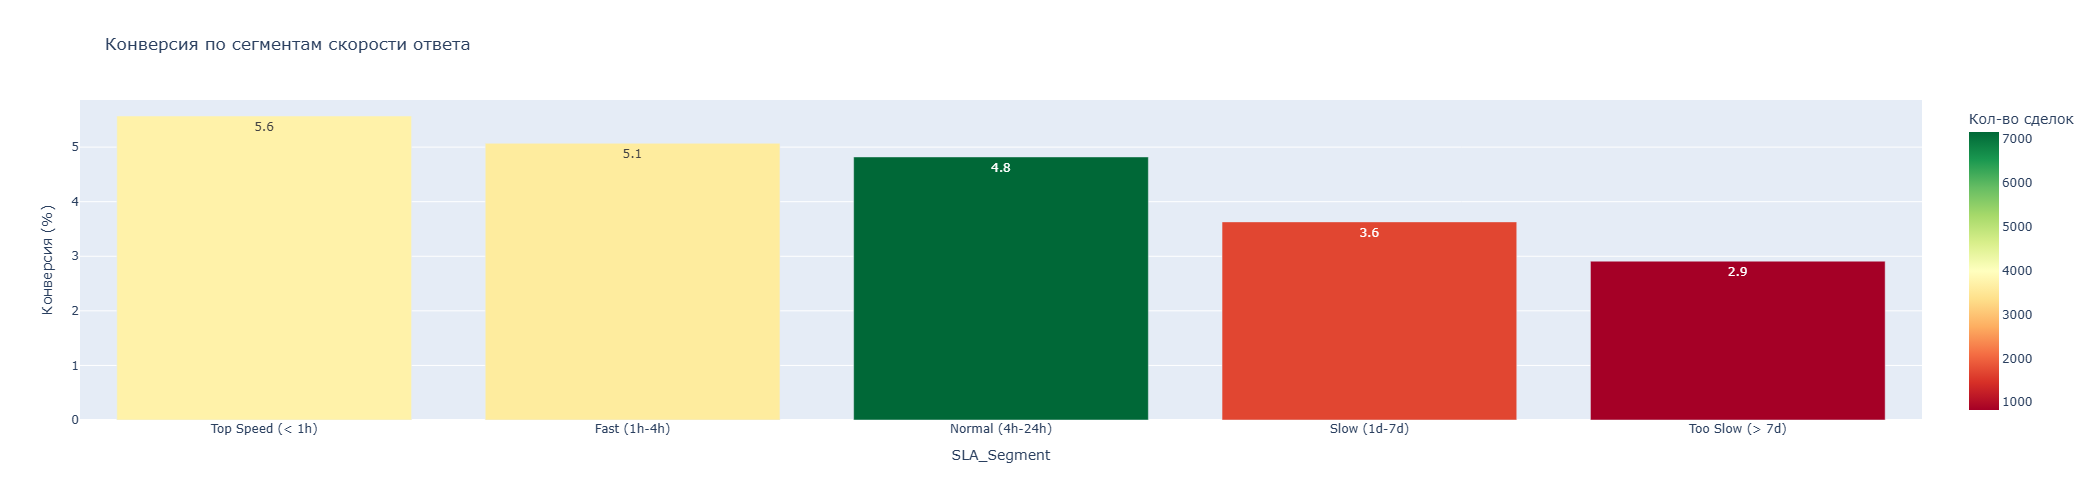

Таблица: Конверсия по сегментам SLA:


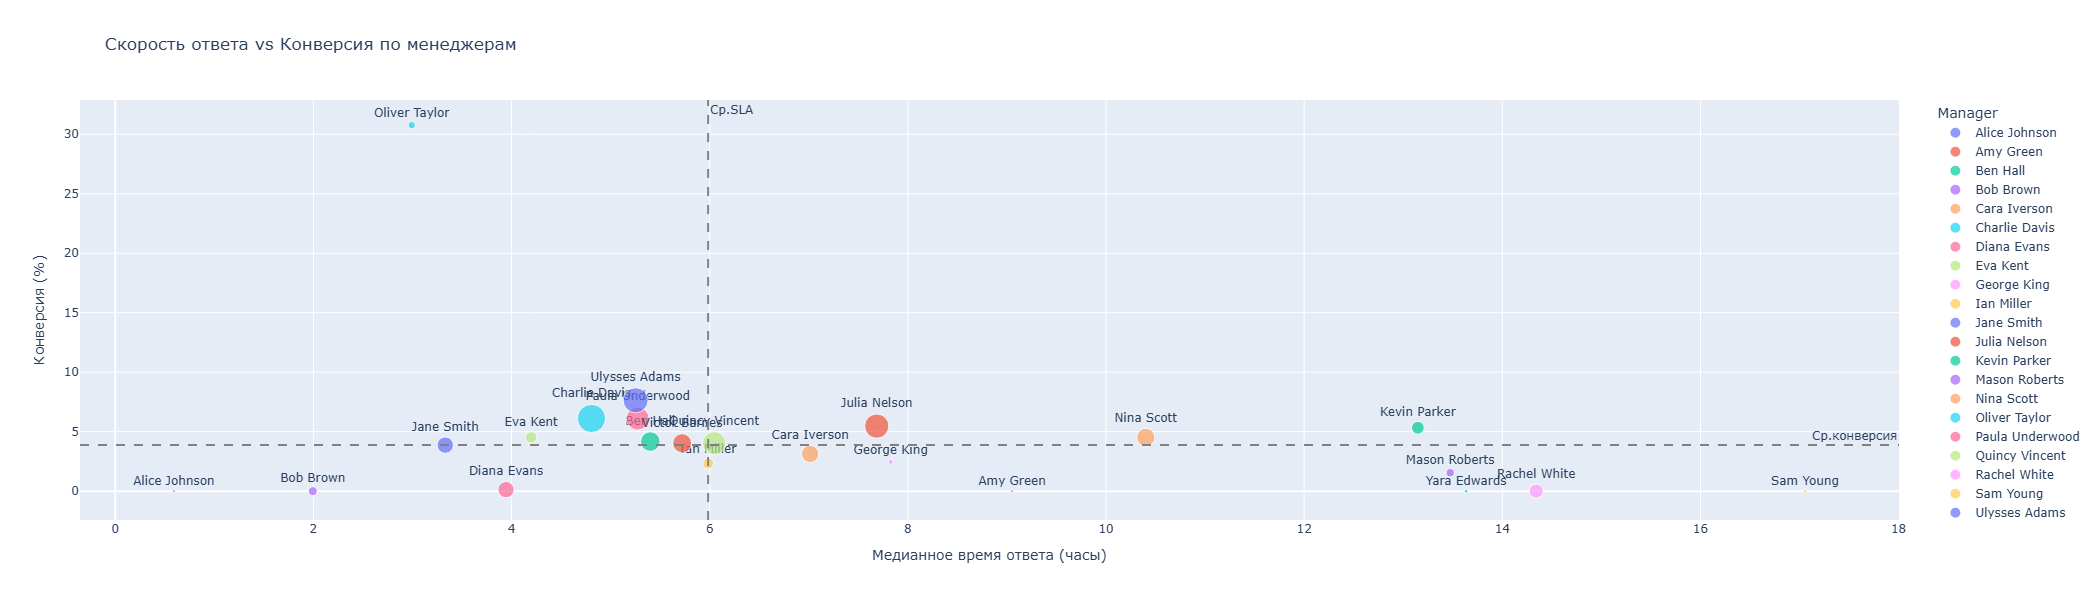

Таблица: Менеджеры по скорости ответа:


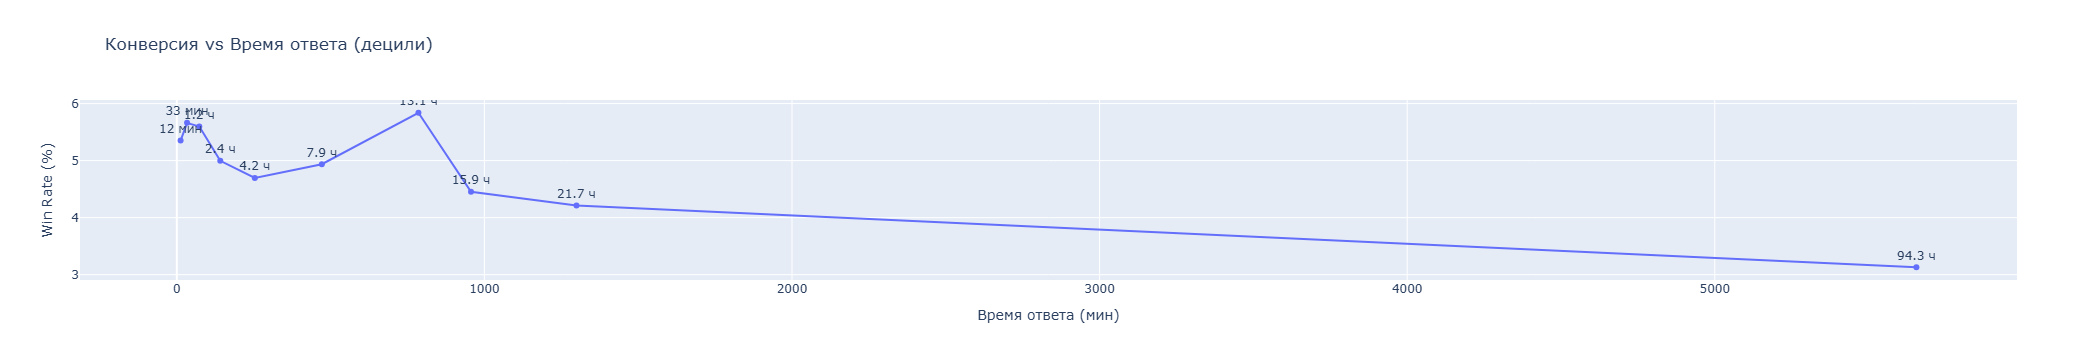

Таблица: Конверсия по децилям времени:



Ключевые метрики скорости ответа:



2. ВЛИЯНИЕ КАЧЕСТВА ЛИДОВ НА КОНВЕРСИЮ


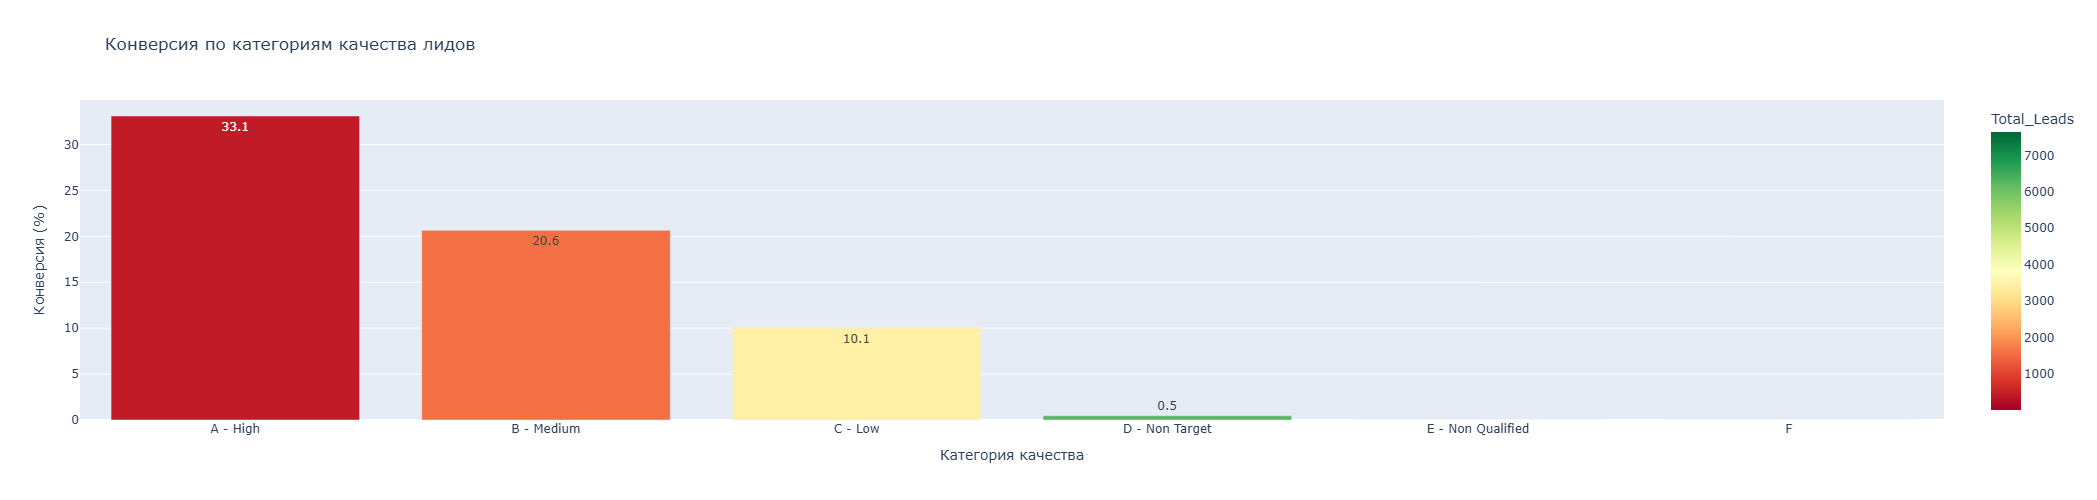

Таблица: Конверсия по качеству лидов:


In [17]:
# Ячейка 17
print("АНАЛИЗ СКОРОСТИ И КАЧЕСТВА (SLA & QUALITY)")

# ================= ЧАСТЬ 1: ВЛИЯНИЕ СКОРОСТИ ОТВЕТА (SLA) НА КОНВЕРСИЮ =================
print("\n1. ЗАВИСИМОСТЬ КОНВЕРСИИ ОТ СКОРОСТИ ОТВЕТА")

# 1.1 Глобальное влияние (SLA Segments)
if 'SLA_Segment' in deals.columns:
    sla_global = deals[
        (deals['SLA_Segment'].notna()) & 
        (deals['SLA_Segment'] != 'Unknown')
    ].copy()
    
    sla_impact = sla_global.groupby('SLA_Segment').agg({
        'Id': 'count',
        'is_paid': 'mean'
    }).reset_index()
    sla_impact.columns = ['SLA_Segment', 'Total_Deals', 'Win_Rate']
    sla_impact['Win_Rate_Pct'] = (sla_impact['Win_Rate'] * 100).round(2)
    
    sla_order = ['Top Speed (< 1h)', 'Fast (1h-4h)', 'Normal (4h-24h)', 'Slow (1d-7d)', 'Too Slow (> 7d)']
    sla_impact['SLA_Segment'] = pd.Categorical(sla_impact['SLA_Segment'], categories=sla_order, ordered=True)
    sla_impact = sla_impact.sort_values('SLA_Segment')
    
    fig1 = px.bar(
        sla_impact,
        x='SLA_Segment',
        y='Win_Rate_Pct',
        color='Total_Deals',
        text_auto='.1f',
        title='Конверсия по сегментам скорости ответа',
        labels={'Win_Rate_Pct': 'Конверсия (%)', 'Total_Deals': 'Кол-во сделок'},
        color_continuous_scale='RdYlGn',
        height=500
    )
    fig1.show()
    
    print("Таблица: Конверсия по сегментам SLA:")
    display(sla_impact.style.format({'Win_Rate_Pct': '{:.1f}%'}).background_gradient(subset=['Win_Rate_Pct'], cmap='RdYlGn'))

# 1.2 Матрица менеджеров и децили
if 'SLA' in deals.columns:
    deals_sla = deals[deals['SLA'].notna()].copy()
    deals_sla['SLA_Hours'] = deals_sla['SLA'].dt.total_seconds() / 3600
    
    manager_sla_stats = deals_sla.groupby('Deal Owner Name').agg({
        'Id': 'count',
        'SLA_Hours': 'median',
        'is_paid': 'mean'
    }).reset_index()
    manager_sla_stats.columns = ['Manager', 'Deals_Count', 'Median_SLA_Hours', 'Win_Rate']
    manager_sla_stats['Win_Rate_Pct'] = (manager_sla_stats['Win_Rate'] * 100).round(2)
    manager_sla_stats = manager_sla_stats[manager_sla_stats['Deals_Count'] > 10]
    
    fig2 = px.scatter(
        manager_sla_stats,
        x='Median_SLA_Hours',
        y='Win_Rate_Pct',
        size='Deals_Count',
        color='Manager',
        text='Manager',
        title='Скорость ответа vs Конверсия по менеджерам',
        labels={'Median_SLA_Hours': 'Медианное время ответа (часы)', 'Win_Rate_Pct': 'Конверсия (%)'},
        height=600
    )
    
    avg_sla = manager_sla_stats['Median_SLA_Hours'].median()
    avg_win = manager_sla_stats['Win_Rate_Pct'].median()
    fig2.add_vline(x=avg_sla, line_dash="dash", line_color="gray", annotation_text="Ср.SLA")
    fig2.add_hline(y=avg_win, line_dash="dash", line_color="gray", annotation_text="Ср.конверсия")
    fig2.update_traces(textposition='top center')
    fig2.show()
    
    print("Таблица: Менеджеры по скорости ответа:")
    display(manager_sla_stats.sort_values('Median_SLA_Hours')[['Manager', 'Deals_Count', 'Median_SLA_Hours', 'Win_Rate_Pct']]
            .style.format({'Median_SLA_Hours': '{:.1f}', 'Win_Rate_Pct': '{:.1f}%'}))
    
    # График конверсии по децилям
    sla_clean = deals_sla.copy()
    sla_clean['SLA_Minutes'] = sla_clean['SLA'].dt.total_seconds() / 60
    sla_clean = sla_clean[(sla_clean['SLA_Minutes'] > 0) & (sla_clean['SLA_Minutes'] < 43200)]
    
    sla_clean['SLA_Decile'] = pd.qcut(sla_clean['SLA_Minutes'], q=10, labels=False)
    conversion_by_speed = sla_clean.groupby('SLA_Decile').agg({
        'SLA_Minutes': 'median',
        'stage_normalized': lambda x: (x == 'Active Student').mean() * 100
    }).reset_index()
    conversion_by_speed['Time_Label'] = conversion_by_speed['SLA_Minutes'].apply(
        lambda m: f"{m/60:.1f} ч" if m >= 60 else f"{m:.0f} мин"
    )
    
    fig3 = px.line(
        conversion_by_speed,
        x='SLA_Minutes',
        y='stage_normalized',
        markers=True,
        text='Time_Label',
        title='Конверсия vs Время ответа (децили)',
        labels={'SLA_Minutes': 'Время ответа (мин)', 'stage_normalized': 'Win Rate (%)'}
    )
    fig3.update_traces(textposition="top center")
    fig3.show()
    
    print("Таблица: Конверсия по децилям времени:")
    display(conversion_by_speed[['SLA_Minutes', 'Time_Label', 'stage_normalized']]
            .rename(columns={'stage_normalized': 'Win_Rate_Pct'})
            .style.format({'SLA_Minutes': '{:.1f}', 'Win_Rate_Pct': '{:.1f}%'}))
    
    # Ключевые метрики SLA
    def format_time(minutes):
        if minutes < 60: return f"{minutes:.1f} мин"
        if minutes < 1440: return f"{minutes/60:.1f} ч"
        return f"{minutes/1440:.1f} дн"
    
    mean_sla = sla_clean['SLA_Minutes'].mean()
    median_sla = sla_clean['SLA_Minutes'].median()
    q25 = sla_clean['SLA_Minutes'].quantile(0.25)
    q75 = sla_clean['SLA_Minutes'].quantile(0.75)
    
    print("\nКлючевые метрики скорости ответа:")
    metrics_df = pd.DataFrame({
        'Метрика': ['Среднее время', 'Медианное время', '25% сделок быстрее', '75% сделок быстрее'],
        'Значение': [format_time(mean_sla), format_time(median_sla), format_time(q25), format_time(q75)]
    })
    display(metrics_df.style.hide(axis='index'))

# ================= ЧАСТЬ 2: ВЛИЯНИЕ КАЧЕСТВА ЛИДОВ =================
print("\n2. ВЛИЯНИЕ КАЧЕСТВА ЛИДОВ НА КОНВЕРСИЮ")

if 'Quality' in deals.columns:
    deals_quality = deals[deals['Quality'].notna()].copy()
    
    quality_stats = deals_quality.groupby('Quality').agg({
        'Id': 'count',
        'stage_normalized': lambda x: (x == 'Active Student').sum()
    }).reset_index()
    quality_stats.columns = ['Quality', 'Total_Leads', 'Active_Students']
    quality_stats['Win_Rate_Pct'] = (quality_stats['Active_Students'] / quality_stats['Total_Leads'] * 100).round(2)
    
    fig4 = px.bar(
        quality_stats,
        x='Quality',
        y='Win_Rate_Pct',
        color='Total_Leads',
        text_auto='.1f',
        title='Конверсия по категориям качества лидов',
        labels={'Win_Rate_Pct': 'Конверсия (%)', 'Quality': 'Категория качества'},
        color_continuous_scale='RdYlGn',
        height=500
    )
    fig4.update_layout(xaxis={'categoryorder':'category ascending'})
    fig4.show()
    
    print("Таблица: Конверсия по качеству лидов:")
    display(quality_stats[['Quality', 'Total_Leads', 'Win_Rate_Pct']]
            .sort_values('Win_Rate_Pct', ascending=False)
            .style.format({'Win_Rate_Pct': '{:.1f}%'})
            .background_gradient(subset=['Win_Rate_Pct'], cmap='RdYlGn'))

АНАЛИЗ ПРИЧИН ОТКАЗОВ ПО МЕНЕДЖЕРАМ
Общее распределение причин отказов:


Reason  Count  Share
0                            Doesn't Answer   4074   26.0
1                          Changed Decision   2122   13.5
2                                 Duplicate   1746   11.1
3                                Non target   1736   11.1
4                         Stopped Answering   1556    9.9
5                            Invalid number   1460    9.3
6                                 Expensive    614    3.9
7                       needs time to think    606    3.9
8               Conditions are not suitable    524    3.3
9                                Inadequate    174    1.1
10                         Gutstein refusal    163    1.0
11  Considering a different direction in IT    148    0.9
12                           Not for myself    145    0.9
13                   Does not speak English    138    0.9
14                              Next stream    131    0.8
15              Didn't leave an application    131    0.8
16                         Thought for free    110    0.7
17      Does not know how to use a computer     49    0.3
18                           Went to Rivals     47    0.3
19                 The contract did not fit     21    0.1
20                                  Refugee      1    0.0

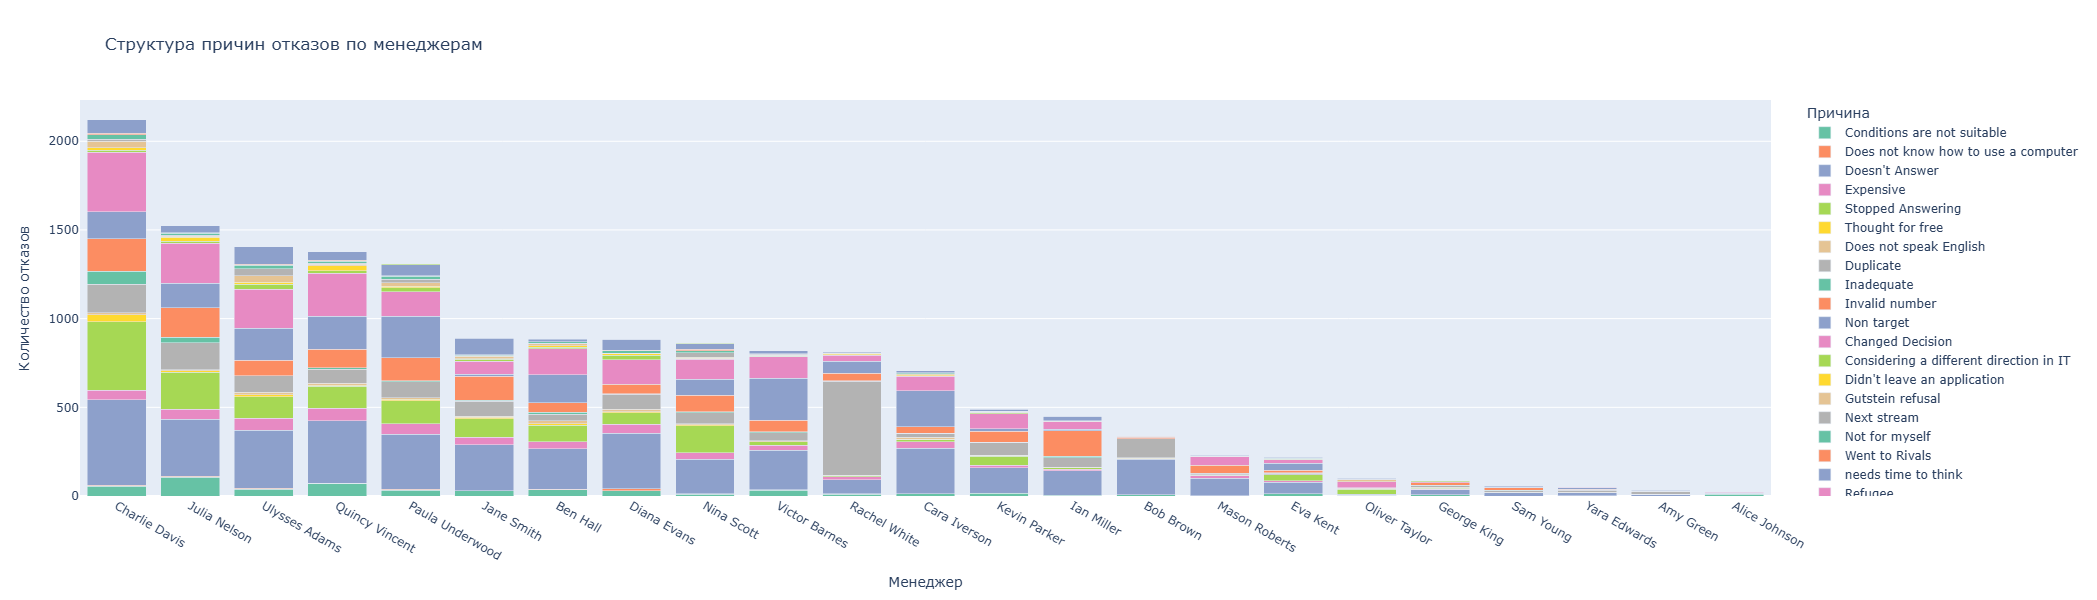


Основные причины отказов у топ-менеджеров:

Charlie Davis:
  • Doesn't Answer: 481 (40.0%)
  • Stopped Answering: 386 (32.1%)
  • Changed Decision: 337 (28.0%)

Julia Nelson:
  • Doesn't Answer: 321 (42.5%)
  • Changed Decision: 227 (30.0%)
  • Stopped Answering: 208 (27.5%)

Ulysses Adams:
  • Doesn't Answer: 326 (44.9%)
  • Changed Decision: 220 (30.3%)
  • Non target: 180 (24.8%)

Quincy Vincent:
  • Doesn't Answer: 351 (45.1%)
  • Changed Decision: 242 (31.1%)
  • Non target: 185 (23.8%)

Paula Underwood:
  • Doesn't Answer: 312 (45.5%)
  • Non target: 235 (34.3%)
  • Changed Decision: 138 (20.1%)

Jane Smith:
  • Doesn't Answer: 259 (51.9%)
  • Invalid number: 135 (27.1%)
  • Stopped Answering: 105 (21.0%)

Ben Hall:
  • Doesn't Answer: 230 (43.1%)
  • Non target: 157 (29.4%)
  • Changed Decision: 147 (27.5%)

Diana Evans:
  • Doesn't Answer: 312 (58.4%)
  • Changed Decision: 137 (25.7%)
  • Duplicate: 85 (15.9%)


In [18]:
# Ячейка 18
print("АНАЛИЗ ПРИЧИН ОТКАЗОВ ПО МЕНЕДЖЕРАМ")

# 1. ПОДГОТОВКА ДАННЫХ
# Берем только проигранные сделки с указанной причиной
lost_deals = deals[
    (deals['stage_normalized'] == 'Churned') & 
    (deals['Lost Reason'].notna()) &
    (deals['Lost Reason'] != 'unknown') &
    (deals['Lost Reason'] != 'Unknown')
].copy()

if len(lost_deals) == 0:
    print("Нет данных по причинам отказов.")
else:
    # 2. ОБЩАЯ СТАТИСТИКА ПО ПРИЧИНАМ
    print("Общее распределение причин отказов:")
    reason_total = lost_deals['Lost Reason'].value_counts().reset_index()
    reason_total.columns = ['Reason', 'Count']
    reason_total['Share'] = (reason_total['Count'] / len(lost_deals) * 100).round(1)
    display(reason_total)
    
    # 3. АНАЛИЗ ПО МЕНЕДЖЕРАМ
    lost_reasons_stats = lost_deals.groupby(['Deal Owner Name', 'Lost Reason'])['Id'].count().reset_index()
    lost_reasons_stats.columns = ['Manager', 'Reason', 'Count']
    
    # Фильтр: менеджеры с > 10 отказов
    manager_total_lost = lost_reasons_stats.groupby('Manager')['Count'].transform('sum')
    lost_reasons_stats = lost_reasons_stats[manager_total_lost > 10]
    
    if len(lost_reasons_stats) == 0:
        print("Недостаточно данных для анализа по менеджерам.")
    else:
        # 4. ВИЗУАЛИЗАЦИЯ: СТРУКТУРА ОТКАЗОВ
        fig = px.bar(
            lost_reasons_stats,
            x='Manager',
            y='Count',
            color='Reason',
            title='Структура причин отказов по менеджерам',
            labels={'Count': 'Количество отказов', 'Reason': 'Причина', 'Manager': 'Менеджер'},
            color_discrete_sequence=px.colors.qualitative.Set2,
            height=600
        )
        fig.update_layout(
            barmode='stack',
            xaxis={'categoryorder': 'total descending'}
        )
        fig.show()
        
        # 5. ТАБЛИЦА: ТОП-ПРИЧИНЫ ПО КАЖДОМУ МЕНЕДЖЕРУ
        print("\nОсновные причины отказов у топ-менеджеров:")
        
        # Находим менеджеров с наибольшим числом отказов
        top_managers_by_loss = lost_reasons_stats.groupby('Manager')['Count'].sum().nlargest(8).index
        
        for manager in top_managers_by_loss:
            manager_data = lost_reasons_stats[lost_reasons_stats['Manager'] == manager]\
                .sort_values('Count', ascending=False).head(3)
            total = manager_data['Count'].sum()
            
            print(f"\n{manager}:")
            for _, row in manager_data.iterrows():
                share = (row['Count'] / total * 100).round(1)
                print(f"  • {row['Reason']}: {row['Count']} ({share}%)")

АНАЛИЗ ПРОДУКТОВ И ПЛАТЕЖЕЙ
1. ПОЛНЫЕ МЕТРИКИ ПО ПРОДУКТАМ
Проанализировано 3 продуктов (исключены продукты с 1 клиентом)
Таблица метрик (отсортировано по выручке):



2. ВИЗУАЛИЗАЦИИ ЭФФЕКТИВНОСТИ ПРОДУКТОВ


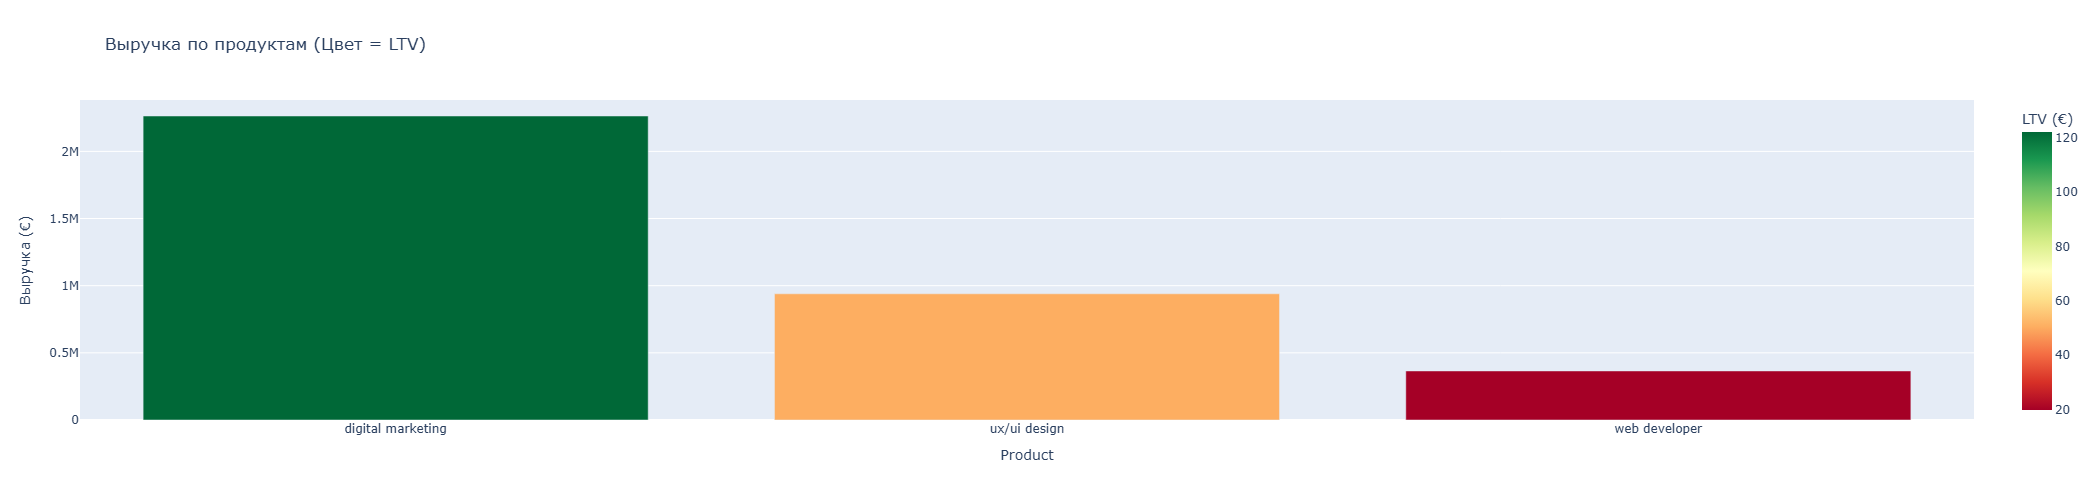

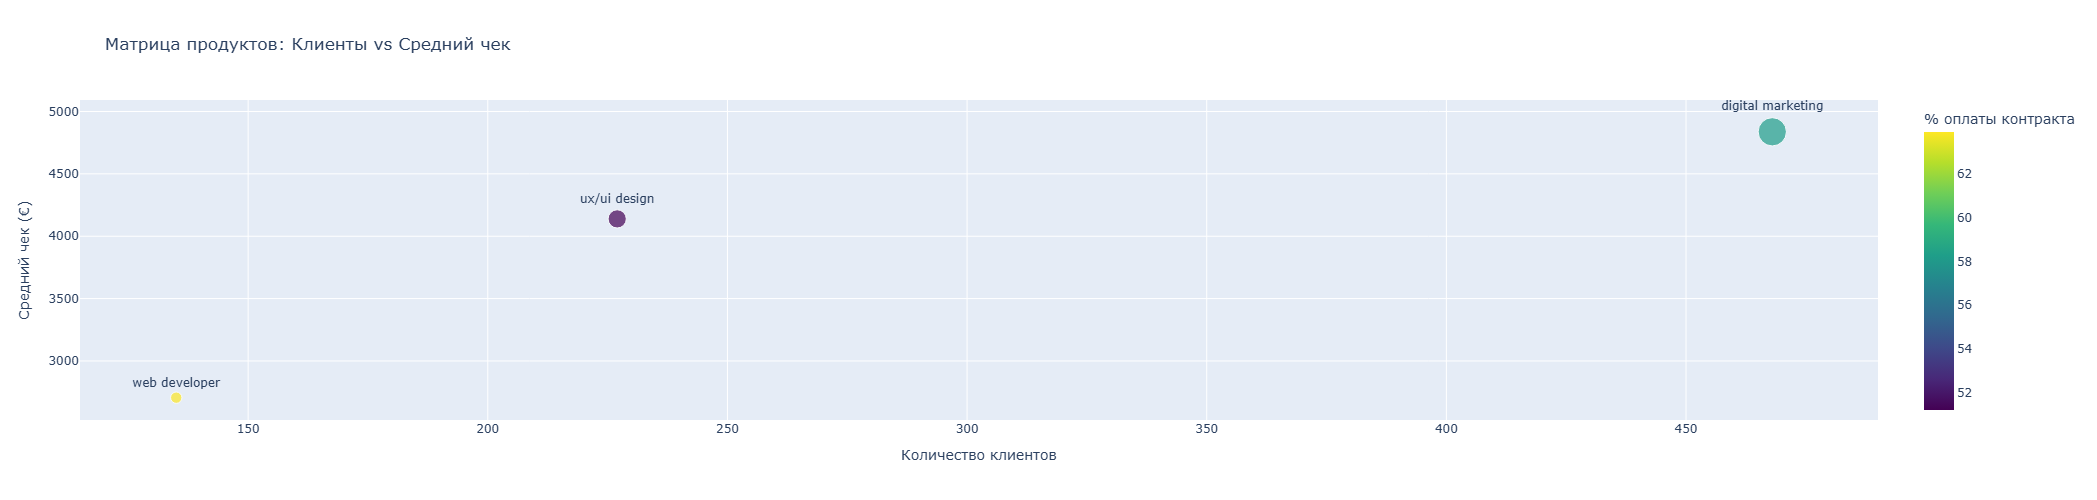


3. АНАЛИЗ ТИПОВ ОПЛАТЫ


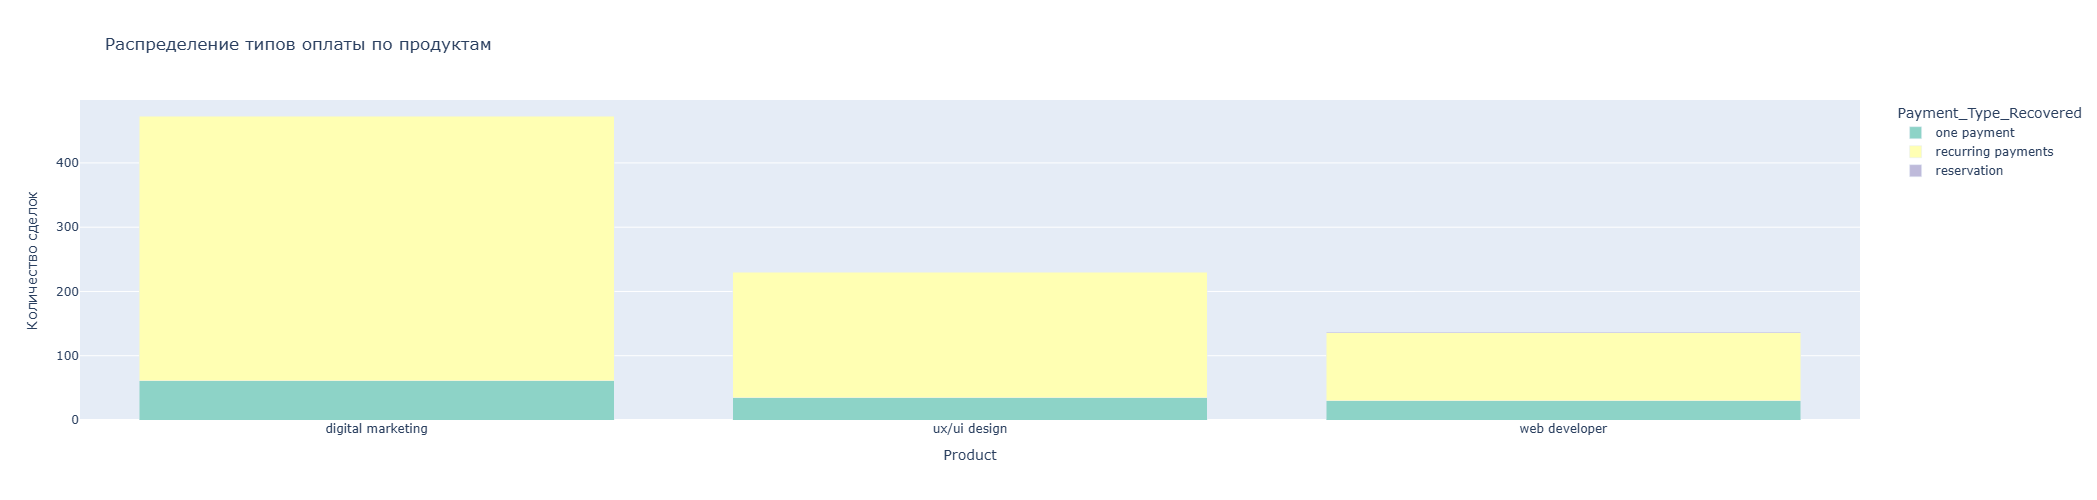

Доля полных оплат по продуктам:


Payment_Type_Recovered  Total  % One Payment
Product                                     
web developer           137.0           21.9
ux/ui design            230.0           15.2
digital marketing       473.0           12.9


4. АНАЛИЗ ТИПОВ ОБУЧЕНИЯ


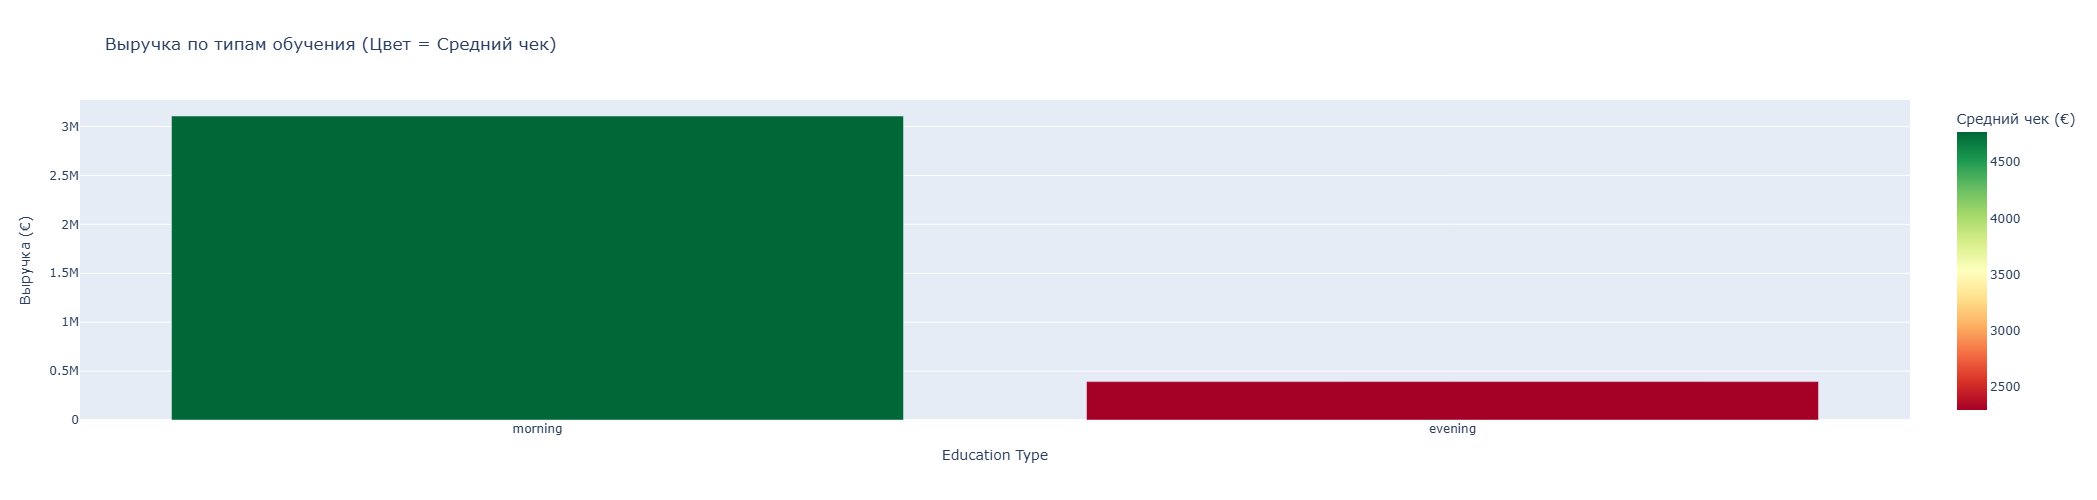

Метрики по типам обучения:


Students    Revenue  Avg_Contract  Avg_Check
Education Type                                              
evening              171   392275.0        3631.0     2294.0
morning              652  3107520.0        8464.0     4766.0


КЛЮЧЕВЫЕ ВЫВОДЫ:

1. Топ-3 продукта по LTV (прибыль с посетителя):
   • digital marketing: LTV = 122.02€, Выручка = 2,263,487€
   • ux/ui design: LTV = 50.52€, Выручка = 939,478€
   • web developer: LTV = 19.76€, Выручка = 365,280€

2. Топ-3 по доле оплаты контракта (%):
   • web developer: 63.9% оплачено
   • digital marketing: 58.2% оплачено
   • ux/ui design: 51.2% оплачено

3. РЕКОМЕНДАЦИИ:
   • Продукты с высоким LTV и Collection_Ratio > 80% — кандидаты на масштабирование.
   • Продукты с низким Collection_Ratio — проверить условия оплаты.
   • Продукты с высоким CAC и низким LTV — кандидаты на оптимизацию или вывод.


In [19]:
# Ячейка 19
print("АНАЛИЗ ПРОДУКТОВ И ПЛАТЕЖЕЙ")

# ==================== ПОДГОТОВКА ДАННЫХ ====================
deals_success = deals[deals['stage_normalized'] == 'Active Student'].copy()
pay_col = 'Payment_Type_Recovered' if 'Payment_Type_Recovered' in deals.columns else 'Payment Type'

# Рассчитываем Transactions как в юнит-экономике
deals_success['Transactions'] = np.where(
    deals_success[pay_col] == 'one payment', 
    1, 
    deals_success['Months of study'].fillna(1)
)

# ==================== ЧАСТЬ 1: ПОЛНЫЕ МЕТРИКИ ПРОДУКТОВ ====================
print("1. ПОЛНЫЕ МЕТРИКИ ПО ПРОДУКТАМ")

# Базовые метрики
product_metrics = deals_success.groupby('Product').agg({
    'Contact Name': 'nunique',          # B (уникальные клиенты)
    'revenue': 'sum',                   # Выручка
    'Offer Total Amount': ['mean', 'sum'],  # Средний и общий контракт
    'Transactions': 'sum',              # T (транзакции)
    'Initial Amount Paid': 'mean'       # Средний первоначальный взнос
}).round(0)

product_metrics.columns = ['B', 'Revenue', 'Avg_Contract', 'Total_Contract', 'T', 'Avg_Initial']

# Фильтрация: удаляем продукты с 1 клиентом (включая find yourself in it)
product_metrics = product_metrics[product_metrics['B'] > 1].copy()

# Расчет производных метрик
product_metrics['Avg_Check'] = (product_metrics['Revenue'] / product_metrics['B']).round(0)
product_metrics['Collection_Ratio'] = (product_metrics['Revenue'] / product_metrics['Total_Contract'] * 100).round(1)
product_metrics['APC'] = (product_metrics['T'] / product_metrics['B']).round(2)
product_metrics['AOV'] = (product_metrics['Revenue'] / product_metrics['T']).round(0)

# Юнит-экономика (автономные расчеты)
TOTAL_UA = contacts['Id'].nunique()
total_marketing_spend = spend['Spend'].sum()
COGS_PERCENT = 0.0
COGS_FIXED = 0

product_metrics['UA'] = TOTAL_UA
product_metrics['C1'] = (product_metrics['B'] / TOTAL_UA).round(4)
product_metrics['AC'] = total_marketing_spend
product_metrics['CPA'] = (total_marketing_spend / TOTAL_UA).round(2)
product_metrics['CAC'] = (total_marketing_spend / product_metrics['B']).round(0)

# COGS и прибыль
product_metrics['COGS_per_T'] = (product_metrics['Revenue'] * COGS_PERCENT + product_metrics['T'] * COGS_FIXED) / product_metrics['T']
product_metrics['CLTV'] = ((product_metrics['AOV'] - product_metrics['COGS_per_T']) * product_metrics['APC']).round(0)
product_metrics['LTV'] = (product_metrics['CLTV'] * product_metrics['C1']).round(2)
product_metrics['CM'] = (product_metrics['Revenue'] - total_marketing_spend - (product_metrics['Revenue'] * COGS_PERCENT + product_metrics['T'] * COGS_FIXED)).round(0)

# Таблица для вывода
display_cols = ['B', 'Revenue', 'Avg_Check', 'Avg_Contract', 'Collection_Ratio', 
                'C1', 'CLTV', 'LTV', 'CAC', 'CM']
display_df = product_metrics[display_cols].sort_values('Revenue', ascending=False)

print(f"Проанализировано {len(display_df)} продуктов (исключены продукты с 1 клиентом)")
print("Таблица метрик (отсортировано по выручке):")
display(display_df.style.format({
    'B': '{:,.0f}',
    'Revenue': '{:,.0f}',
    'Avg_Check': '{:,.0f}',
    'Avg_Contract': '{:,.0f}',
    'Collection_Ratio': '{:.1f}%',
    'C1': '{:.2%}',
    'CLTV': '{:,.0f}',
    'LTV': '{:.2f}',
    'CAC': '{:,.0f}',
    'CM': '{:,.0f}'
}).background_gradient(subset=['Revenue', 'LTV', 'CM'], cmap='RdYlGn'))

# ==================== ЧАСТЬ 2: ВИЗУАЛИЗАЦИИ (ЕДИНАЯ ЦВЕТОВАЯ ГАММА) ====================
print("\n2. ВИЗУАЛИЗАЦИИ ЭФФЕКТИВНОСТИ ПРОДУКТОВ")

# Цветовая гамма проекта: Viridis для последовательных, Set3 для категорий
# Для метрик используем RdYlGn как в предыдущих ячейках

# График 1: Выручка по продуктам (цвет = LTV) - RdYlGn
fig1 = px.bar(
    display_df.reset_index(),
    x='Product', y='Revenue',
    color='LTV',
    title='Выручка по продуктам (Цвет = LTV)',
    labels={'Revenue': 'Выручка (€)', 'LTV': 'LTV (€)'},
    color_continuous_scale='RdYlGn',
    height=500
)
fig1.update_layout(xaxis={'categoryorder': 'total descending'})
fig1.show()

# График 2: Матрица продуктов (Клиенты vs Средний чек) - Viridis для Collection_Ratio
fig2 = px.scatter(
    display_df.reset_index(),
    x='B', y='Avg_Check',
    size='Revenue',
    color='Collection_Ratio',
    text='Product',
    title='Матрица продуктов: Клиенты vs Средний чек',
    labels={'B': 'Количество клиентов', 'Avg_Check': 'Средний чек (€)', 'Collection_Ratio': '% оплаты контракта'},
    color_continuous_scale='Viridis',
    height=500
)
fig2.update_traces(textposition='top center')
fig2.show()

# ==================== ЧАСТЬ 3: АНАЛИЗ ТИПОВ ОПЛАТЫ ====================
print("\n3. АНАЛИЗ ТИПОВ ОПЛАТЫ")

if pay_col in deals_success.columns:
    # Фильтруем те же продукты
    deals_filtered = deals_success[deals_success['Product'].isin(display_df.index)]
    payment_split = deals_filtered.groupby(['Product', pay_col]).size().reset_index(name='Count')
    
    # Stacked bar: Set3 для категориальных (как в предыдущих ячейках)
    fig3 = px.bar(
        payment_split,
        x='Product', y='Count', color=pay_col,
        title='Распределение типов оплаты по продуктам',
        labels={'Count': 'Количество сделок'},
        color_discrete_sequence=px.colors.qualitative.Set3,
        height=500
    )
    fig3.update_layout(xaxis={'categoryorder': 'total descending'}, barmode='stack')
    fig3.show()
    
    # Таблица долей
    payment_pivot = payment_split.pivot(index='Product', columns=pay_col, values='Count').fillna(0)
    payment_pivot['Total'] = payment_pivot.sum(axis=1)
    payment_pivot['% One Payment'] = (payment_pivot.get('one payment', 0) / payment_pivot['Total'] * 100).round(1)
    
    print("Доля полных оплат по продуктам:")
    display(payment_pivot[['Total', '% One Payment']].sort_values('% One Payment', ascending=False))

# ==================== ЧАСТЬ 4: АНАЛИЗ ТИПОВ ОБУЧЕНИЯ ====================
print("\n4. АНАЛИЗ ТИПОВ ОБУЧЕНИЯ")

if 'Education Type' in deals_success.columns:
    edu_stats = deals_success.groupby('Education Type').agg({
        'Contact Name': 'nunique',
        'revenue': 'sum',
        'Offer Total Amount': 'mean'
    }).round(0)
    edu_stats.columns = ['Students', 'Revenue', 'Avg_Contract']
    edu_stats = edu_stats[edu_stats['Students'] > 1]  # Фильтр
    edu_stats['Avg_Check'] = (edu_stats['Revenue'] / edu_stats['Students']).round(0)
    
    # Барчарт с RdYlGn как в графике 1
    fig4 = px.bar(
        edu_stats.reset_index(),
        x='Education Type', y='Revenue',
        color='Avg_Check',
        title='Выручка по типам обучения (Цвет = Средний чек)',
        labels={'Revenue': 'Выручка (€)', 'Avg_Check': 'Средний чек (€)'},
        color_continuous_scale='RdYlGn',
        height=500
    )
    fig4.update_layout(xaxis={'categoryorder': 'total descending'})
    fig4.show()
    
    print("Метрики по типам обучения:")
    display(edu_stats)

# ==================== ВЫВОДЫ ====================
print("\n" + "="*60)
print("КЛЮЧЕВЫЕ ВЫВОДЫ:")

# Топ-3 по LTV
top_ltv = display_df.nlargest(3, 'LTV')
print("\n1. Топ-3 продукта по LTV (прибыль с посетителя):")
for idx, row in top_ltv.iterrows():
    print(f"   • {idx}: LTV = {row['LTV']:.2f}€, Выручка = {row['Revenue']:,.0f}€")

# Топ-3 по Collection Ratio
top_collection = display_df.nlargest(3, 'Collection_Ratio')
print("\n2. Топ-3 по доле оплаты контракта (%):")
for idx, row in top_collection.iterrows():
    print(f"   • {idx}: {row['Collection_Ratio']}% оплачено")

# Рекомендации
print("\n3. РЕКОМЕНДАЦИИ:")
print("   • Продукты с высоким LTV и Collection_Ratio > 80% — кандидаты на масштабирование.")
print("   • Продукты с низким Collection_Ratio — проверить условия оплаты.")
print("   • Продукты с высоким CAC и низким LTV — кандидаты на оптимизацию или вывод.")

ГЕОГРАФИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ СДЕЛОК
Городов с данными: 874
Геокодирование...
Геокодировано: 50 из топ-50


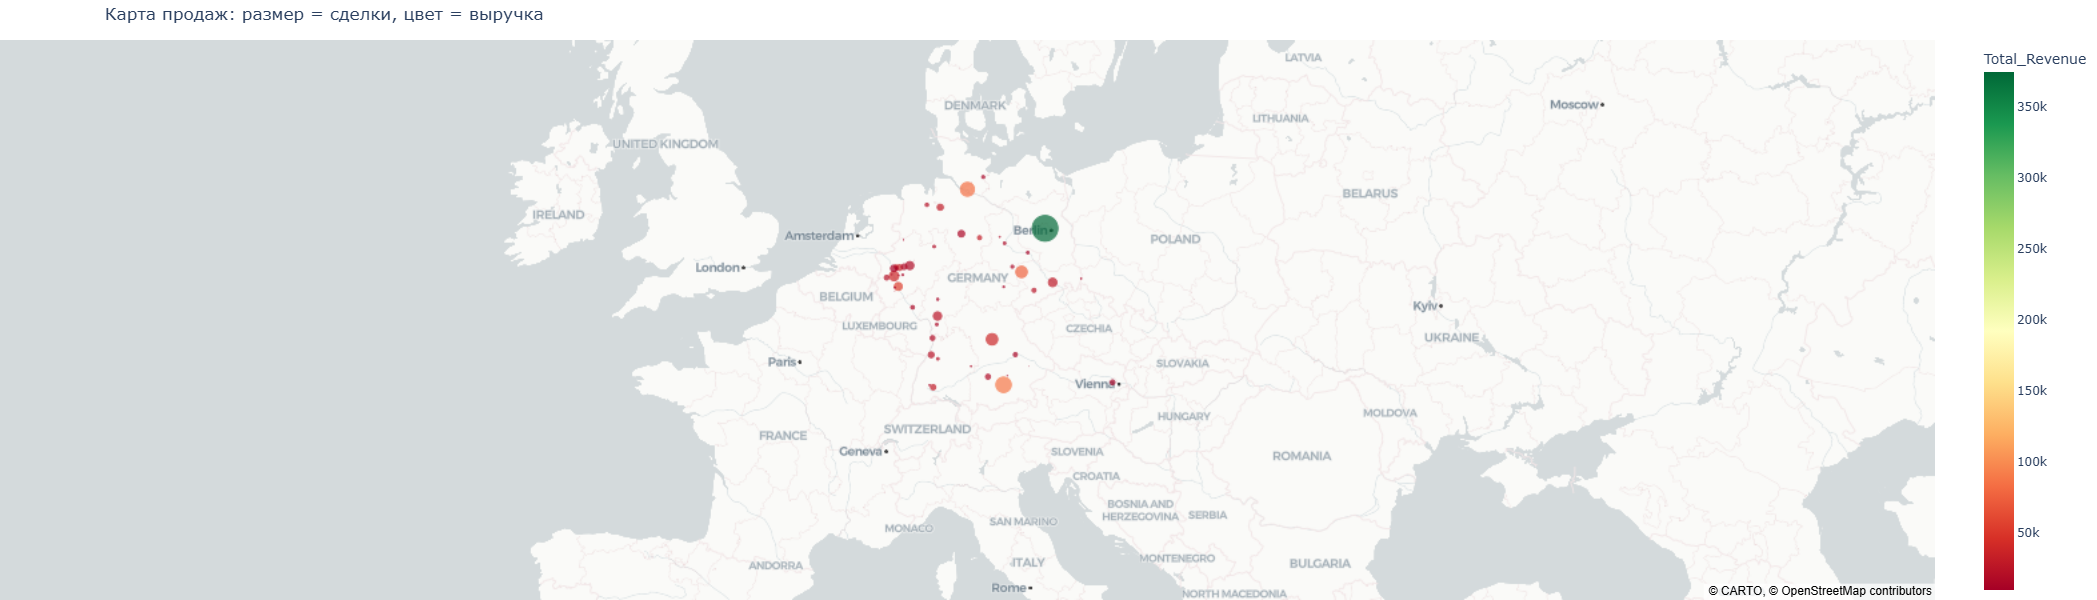

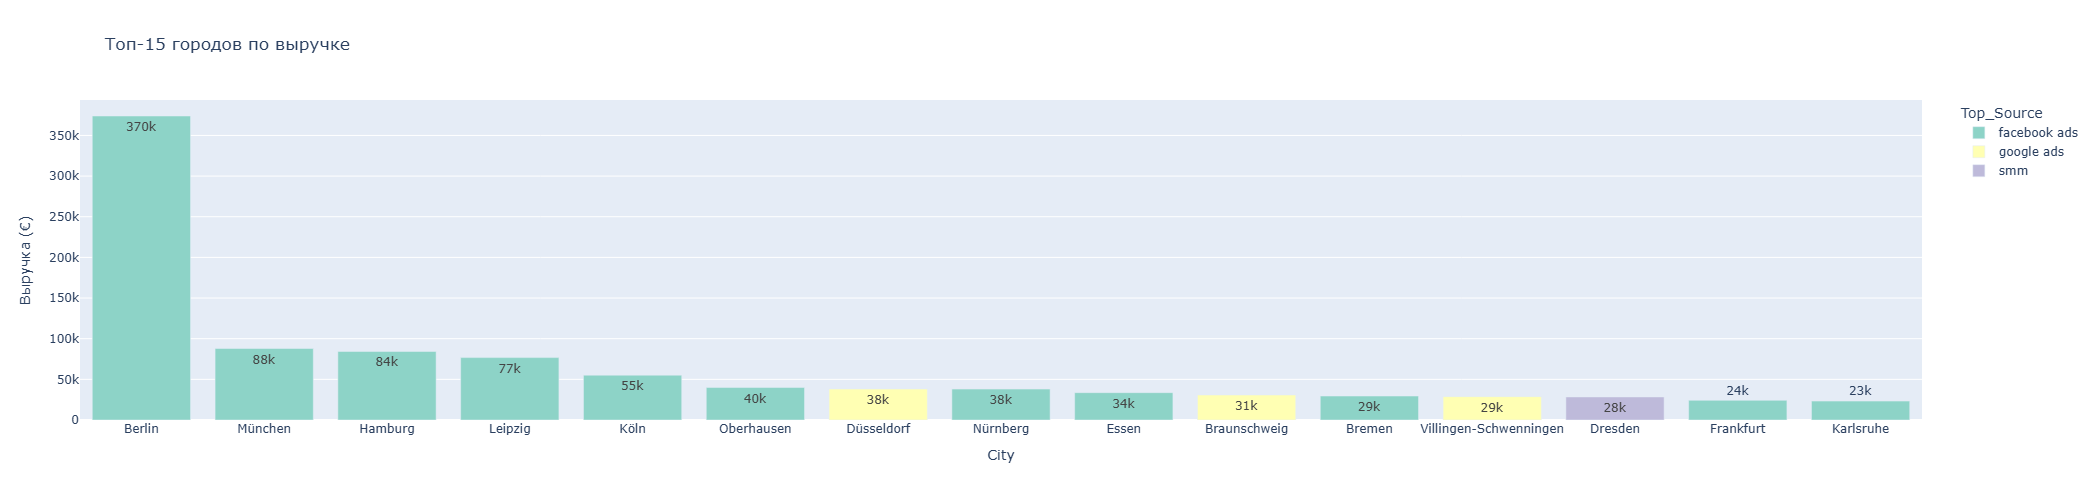

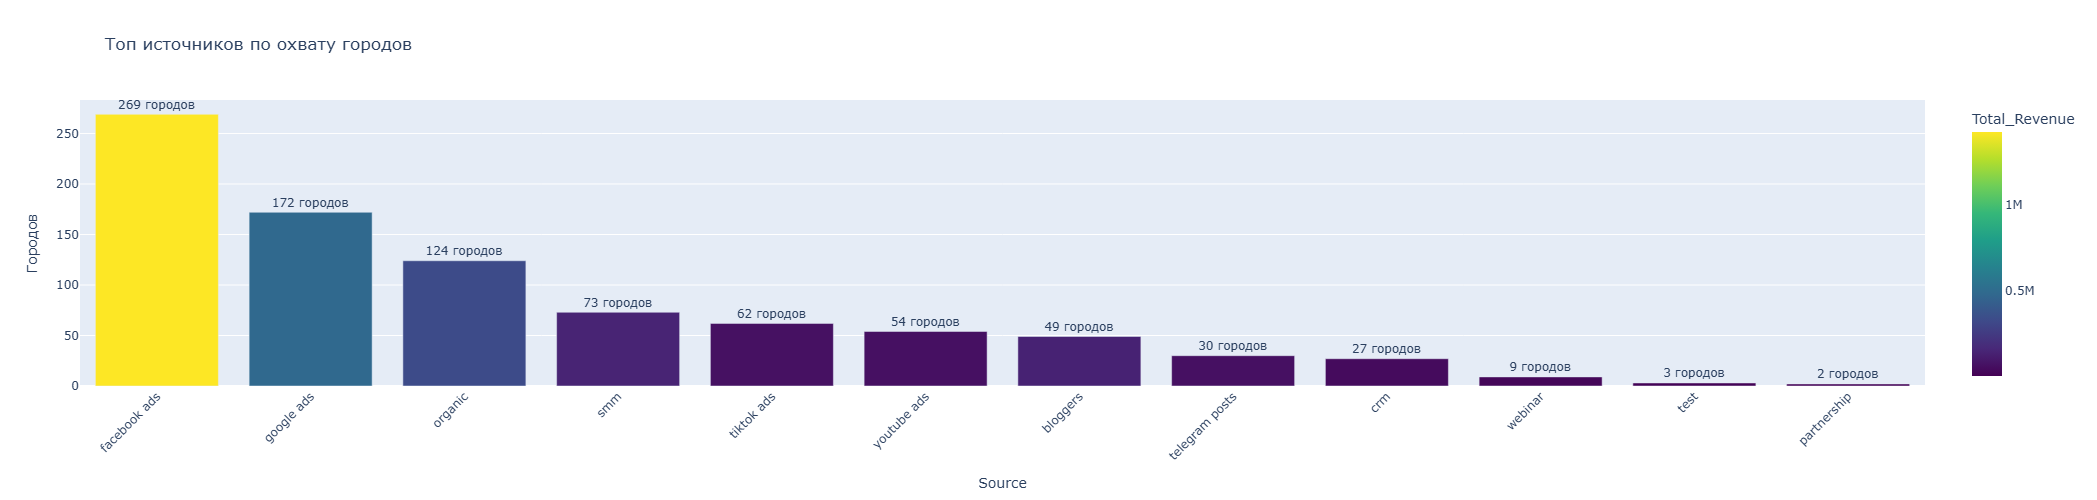

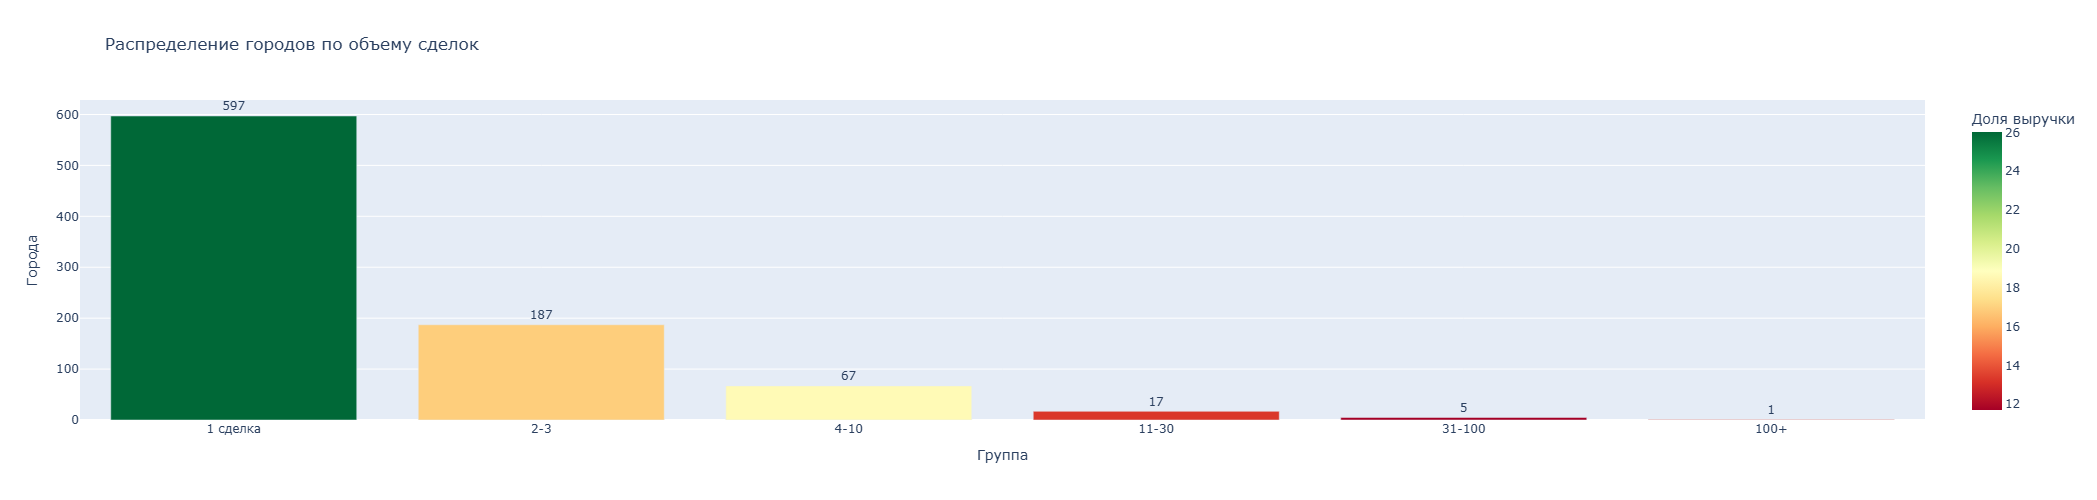


Топ-15 городов:



Группы городов:



КЛЮЧЕВЫЕ ВЫВОДЫ:
• Городов: 874
• Топ-10 дают 31.0% выручки
• Лидер: Berlin (373,880€)
• Самый частый источник: facebook ads (269 городов)


In [20]:
# Ячейка 20
print("ГЕОГРАФИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ СДЕЛОК")

# ---------- ГЕОКОДИРОВАНИЕ ----------
COORD_DB = {
    'Berlin': (52.5200, 13.4050), 'München': (48.1351, 11.5820), 'Hamburg': (53.5511, 9.9937),
    'Köln': (50.9375, 6.9603), 'Frankfurt': (50.1109, 8.6821), 'Leipzig': (51.3397, 12.3731),
    'Düsseldorf': (51.2277, 6.7735), 'Dortmund': (51.5136, 7.4653), 'Essen': (51.4556, 7.0116),
    'Bremen': (53.0793, 8.8017), 'Dresden': (51.0504, 13.7373), 'Hannover': (52.3759, 9.7320),
    'Nürnberg': (49.4521, 11.0767), 'Duisburg': (51.4344, 6.7623), 'Bochum': (51.4818, 7.2162),
    'Wuppertal': (51.2562, 7.1508), 'Bielefeld': (52.0302, 8.5325), 'Bonn': (50.7374, 7.0982),
    'Münster': (51.9607, 7.6261), 'Karlsruhe': (49.0069, 8.4037), 'Mannheim': (49.4875, 8.4660),
    'Augsburg': (48.3705, 10.8978), 'Wiesbaden': (50.0826, 8.2493), 'Gelsenkirchen': (51.5177, 7.0857),
    'Mönchengladbach': (51.1805, 6.4428), 'Braunschweig': (52.2689, 10.5268), 'Chemnitz': (50.8321, 12.9208),
    'Kiel': (54.3233, 10.1228), 'Aachen': (50.7753, 6.0839), 'Halle': (51.4826, 11.9697),
    'Magdeburg': (52.1205, 11.6276), 'Freiburg': (47.9961, 7.8494), 'Krefeld': (51.3388, 6.5853),
    'Lübeck': (53.8696, 10.6872), 'Oberhausen': (51.4780, 6.8625), 'Erfurt': (50.9848, 11.0299),
    'Mainz': (50.0012, 8.2763), 'Rostock': (54.0924, 12.0991), 'Kassel': (51.3127, 9.4797),
    'Hagen': (51.3671, 7.4633), 'Saarbrücken': (49.2402, 6.9969), 'Hamm': (51.6803, 7.8209),
    'Ludwigshafen': (49.4774, 8.4452), 'Mülheim': (51.4271, 6.8806), 'Oldenburg': (53.1435, 8.2146),
    'Osnabrück': (52.2799, 8.0472), 'Leverkusen': (51.0459, 7.0192), 'Heidelberg': (49.3988, 8.6724),
    'Solingen': (51.1694, 7.0815), 'Herne': (51.5372, 7.2223), 'Neuss': (51.2042, 6.6879),
    'Darmstadt': (49.8728, 8.6512), 'Paderborn': (51.7189, 8.7575), 'Regensburg': (49.0134, 12.1016),
    'Ingolstadt': (48.7632, 11.4251), 'Würzburg': (49.7913, 9.9534), 'Fürth': (49.4771, 10.9887),
    'Wolfsburg': (52.4227, 10.7865), 'Offenbach': (50.0956, 8.7761), 'Ulm': (48.4011, 9.9876),
    'Heilbronn': (49.1427, 9.2109), 'Pforzheim': (48.8922, 8.6946), 'Göttingen': (51.5413, 9.9158),
    'Bottrop': (51.5259, 6.9248), 'Trier': (49.7499, 6.6373), 'Recklinghausen': (51.6149, 7.1977),
    'Reutlingen': (48.4914, 9.2112), 'Bremerhaven': (53.5396, 8.5809), 'Koblenz': (50.3569, 7.5890),
    'Bergisch Gladbach': (50.9916, 7.1368), 'Jena': (50.9271, 11.5892), 'Remscheid': (51.1790, 7.1925),
    'Erlangen': (49.5897, 11.0039), 'Moers': (51.4516, 6.6403), 'Siegen': (50.8745, 8.0243),
    'Hildesheim': (52.1548, 9.9578), 'Salzgitter': (52.1508, 10.3593),
    'Wien': (48.2082, 16.3738), 'Graz': (47.0707, 15.4395), 'Linz': (48.3069, 14.2858),
    'Salzburg': (47.8095, 13.0550), 'Innsbruck': (47.2692, 11.4041), 'Klagenfurt': (46.6362, 14.3126),
    'Zürich': (47.3769, 8.5417), 'Basel': (47.5596, 7.5886), 'Bern': (46.9480, 7.4474),
    'Lausanne': (46.5197, 6.6323), 'Genf': (46.2044, 6.1432), 'Luzern': (47.0502, 8.3093),
    'St. Gallen': (47.4245, 9.3767), 'Lugano': (46.0037, 8.9511),
}

def geocode_city(city_name):
    if pd.isna(city_name):
        return None
    
    city_clean = str(city_name).strip()
    
    # Локальная база
    for db_city, coords in COORD_DB.items():
        if db_city.lower() in city_clean.lower() or city_clean.lower() in db_city.lower():
            return coords
    
    # Онлайн геокодирование
    try:
        geolocator = Nominatim(user_agent="geo_analysis")
        time.sleep(1)
        
        query = f"{city_clean}, Germany"
        if any(word in city_clean.lower() for word in ['wien', 'vienna', 'graz', 'salzburg', 'linz', 'innsbruck']):
            query = f"{city_clean}, Austria"
        elif any(word in city_clean.lower() for word in ['zürich', 'basel', 'bern', 'lausanne', 'genf', 'luzern']):
            query = f"{city_clean}, Switzerland"
        
        location = geolocator.geocode(query, timeout=10)
        if location:
            return (location.latitude, location.longitude)
    except:
        pass
    
    return None

# ---------- ПОДГОТОВКА ДАННЫХ ----------
deals_with_city = deals[
    (deals['City'].notna()) & 
    (deals['City'] != 'Unknown') &
    (deals['City'] != 'unknown')
].copy()

city_stats = deals_with_city.groupby('City').agg({
    'Id': 'count',
    'stage_normalized': lambda x: (x == 'Active Student').sum(),
    'revenue': 'sum',
    'Source': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
}).reset_index()

city_stats.columns = ['City', 'Total_Deals', 'Active_Students', 'Total_Revenue', 'Top_Source']
city_stats['Win_Rate'] = (city_stats['Active_Students'] / city_stats['Total_Deals'] * 100).round(2)
city_stats = city_stats.sort_values('Total_Revenue', ascending=False)

print(f"Городов с данными: {len(city_stats)}")

# ---------- ГЕОКОДИРОВАНИЕ ТОП-50 ----------
print("Геокодирование...")
top_cities = city_stats.head(50).copy()

coordinates = []
for city in top_cities['City']:
    coords = geocode_city(city)
    coordinates.append(coords)

top_cities[['lat', 'lon']] = pd.DataFrame(coordinates, index=top_cities.index, columns=['lat', 'lon'])
geocoded = top_cities.dropna(subset=['lat', 'lon'])
print(f"Геокодировано: {len(geocoded)} из топ-50")

# ---------- ГРАФИК 1: КАРТА ----------
fig_map = px.scatter_map(
    geocoded,
    lat="lat",
    lon="lon",
    size="Total_Deals",
    color="Total_Revenue",
    hover_name="City",
    hover_data={'Total_Revenue': ':.0f', 'Total_Deals': True, 'Win_Rate': ':.1f', 'Top_Source': True},
    zoom=4,
    center={"lat": 50.0, "lon": 10.0},
    title="Карта продаж: размер = сделки, цвет = выручка",
    color_continuous_scale='RdYlGn',
    map_style="carto-positron",
    height=600
)
fig_map.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig_map.show()

# ---------- ГРАФИК 2: ТОП ГОРОДОВ ПО ВЫРУЧКЕ ----------
city_top15 = city_stats.head(15).copy()

fig_bar = px.bar(
    city_top15,
    x='City',
    y='Total_Revenue',
    color='Top_Source',
    text_auto='.2s',
    title='Топ-15 городов по выручке',
    labels={'Total_Revenue': 'Выручка (€)'},
    color_discrete_sequence=px.colors.qualitative.Set3,
    height=500
)
fig_bar.update_layout(xaxis={'categoryorder': 'total descending'})
fig_bar.show()

# ---------- ГРАФИК 3: РАСПРЕДЕЛЕНИЕ ИСТОЧНИКОВ ----------
source_dist = city_stats.groupby('Top_Source').agg({
    'City': 'count',
    'Total_Revenue': 'sum'
}).reset_index()
source_dist.columns = ['Source', 'Cities_Count', 'Total_Revenue']
source_dist = source_dist.sort_values('Cities_Count', ascending=False).head(15)

fig_sources = px.bar(
    source_dist,
    x='Source',
    y='Cities_Count',
    color='Total_Revenue',
    text='Cities_Count',
    title='Топ источников по охвату городов',
    labels={'Cities_Count': 'Городов'},
    color_continuous_scale='Viridis',
    height=500
)
fig_sources.update_traces(texttemplate='%{text} городов', textposition='outside')
fig_sources.update_layout(xaxis_tickangle=-45)
fig_sources.show()

# ---------- ГРАФИК 4: ГРУППИРОВКА ГОРОДОВ ----------
city_groups = pd.cut(
    city_stats['Total_Deals'],
    bins=[0, 1, 3, 10, 30, 100, float('inf')],
    labels=['1 сделка', '2-3', '4-10', '11-30', '31-100', '100+']
)

group_stats = pd.DataFrame({
    'Группа': city_groups,
    'Города': 1,
    'Выручка': city_stats['Total_Revenue']
}).groupby('Группа', observed=False).agg({
    'Города': 'count',
    'Выручка': 'sum'
})
group_stats['Доля выручки'] = (group_stats['Выручка'] / group_stats['Выручка'].sum() * 100).round(1)
group_stats['Выручка на город'] = (group_stats['Выручка'] / group_stats['Города']).astype(int)

fig_groups = px.bar(
    group_stats.reset_index(),
    x='Группа',
    y='Города',
    color='Доля выручки',
    text='Города',
    title='Распределение городов по объему сделок',
    color_continuous_scale='RdYlGn',
    height=500
)
fig_groups.update_traces(textposition='outside')
fig_groups.show()

# ---------- ТАБЛИЦЫ ----------
print("\nТоп-15 городов:")
display(city_top15.style.format({
    'Total_Revenue': '{:,.0f}',
    'Win_Rate': '{:.1f}%'
}).background_gradient(subset=['Total_Revenue'], cmap='RdYlGn'))

print("\nГруппы городов:")
display(group_stats.style.format({
    'Выручка': '{:,.0f}',
    'Выручка на город': '{:,.0f}',
    'Доля выручки': '{:.1f}%'
}))

# ---------- ВЫВОДЫ ----------
print("\nКЛЮЧЕВЫЕ ВЫВОДЫ:")
print(f"• Городов: {len(city_stats)}")
print(f"• Топ-10 дают {city_stats.head(10)['Total_Revenue'].sum() / city_stats['Total_Revenue'].sum() * 100:.1f}% выручки")
print(f"• Лидер: {city_stats.iloc[0]['City']} ({city_stats.iloc[0]['Total_Revenue']:,.0f}€)")
print(f"• Самый частый источник: {source_dist.iloc[0]['Source']} ({source_dist.iloc[0]['Cities_Count']} городов)")

АНАЛИЗ ЭФФЕКТИВНОСТИ ПО ГОРОДАМ
1. ТОП-10 ГОРОДОВ ПО ВЫРУЧКЕ


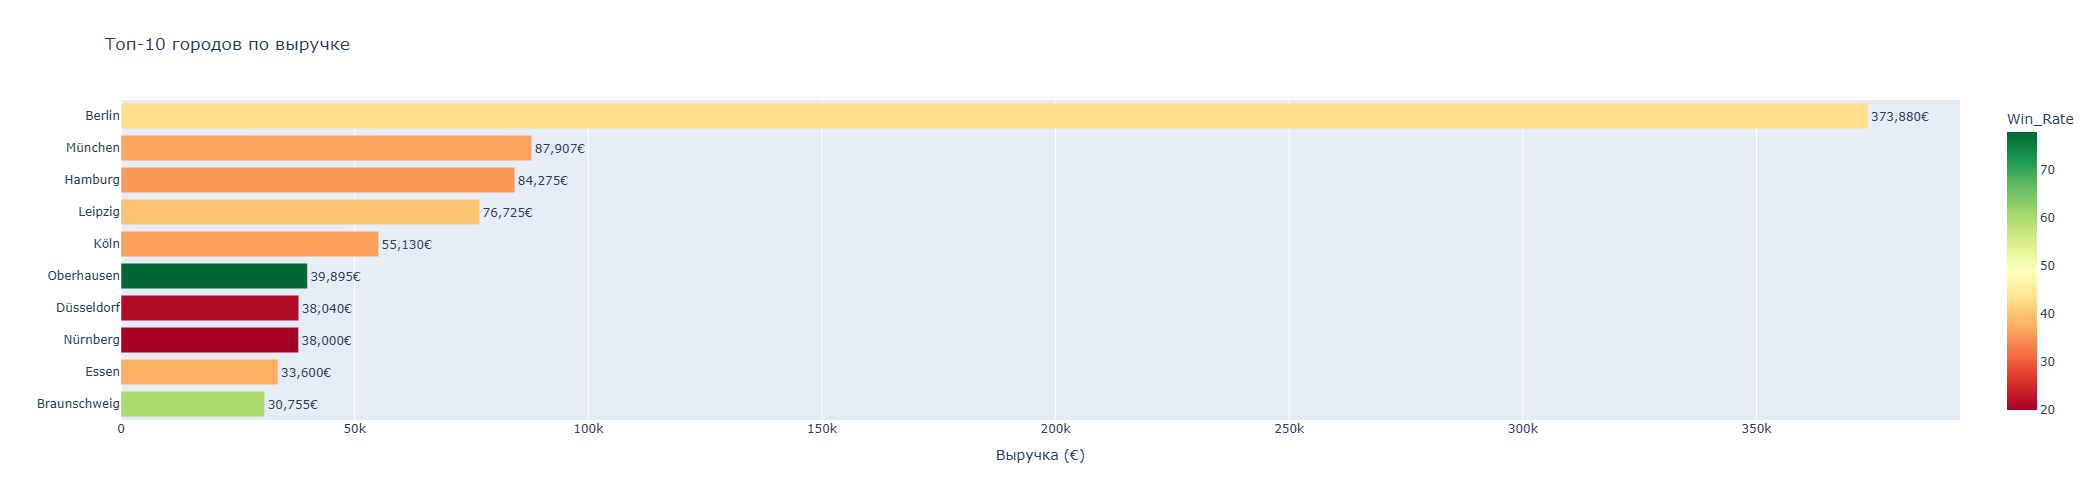


2. ТОП-10 ГОРОДОВ ПО КОНВЕРСИИ (минимум 5 сделок)


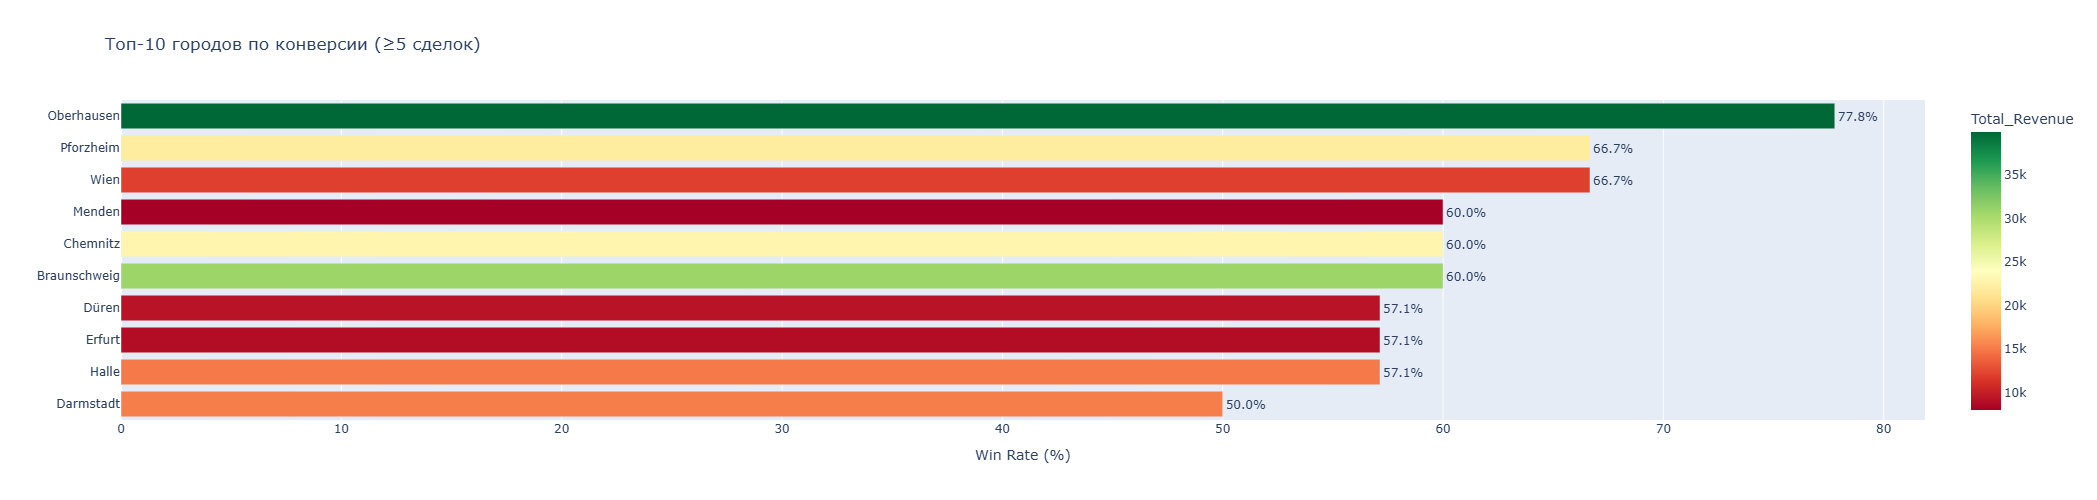


3. ТОП-10 ГОРОДОВ ПО ОБЪЕМУ СДЕЛОК


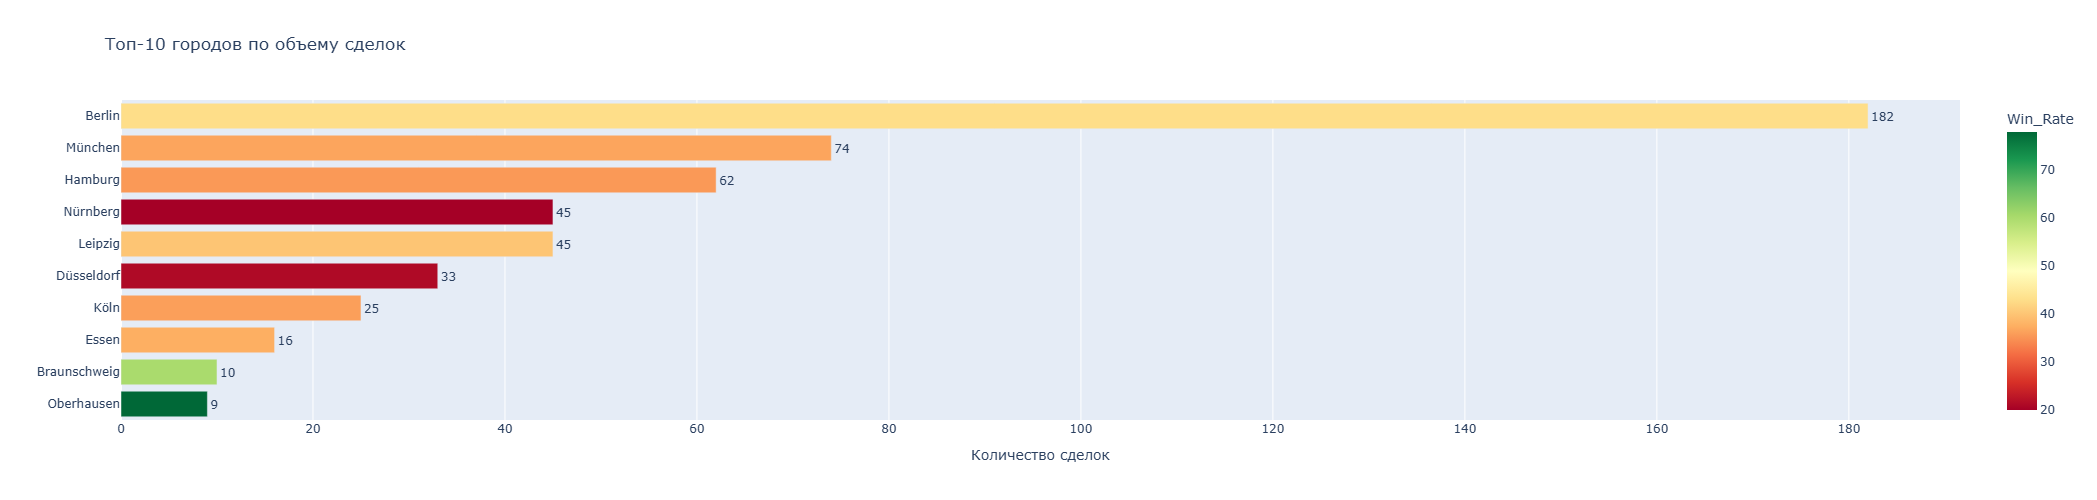


4. ЛИДЕРСТВО ИСТОЧНИКОВ В ГОРОДАХ
Основной источник трафика в городах:



5. КАТЕГОРИИ ГОРОДОВ
Ключевые города по категориям:


Категория                   Город   Выручка Win Rate  Сделок
0       Звезды                  Berlin  373,880€   42.86%     182
1       Звезды              Oberhausen   39,895€   77.78%       9
2       Звезды            Braunschweig   30,755€    60.0%      10
3       Звезды  Villingen-Schwenningen   28,720€   42.86%      14
4       Звезды                Chemnitz   22,950€    60.0%      10
5   Проблемные              Düsseldorf   38,040€   21.21%      33
6   Проблемные                Nürnberg   38,000€    20.0%      45
7   Проблемные                Dortmund   17,600€   15.38%      26
8    Потенциал              Oberhausen   39,895€   77.78%       9
9    Потенциал               Pforzheim   21,955€   66.67%       6
10   Потенциал               Oldenburg   21,200€    50.0%       8


6. СВОДНАЯ СТАТИСТИКА


In [21]:
# Ячейка 21
print("АНАЛИЗ ЭФФЕКТИВНОСТИ ПО ГОРОДАМ")

# ---------- ПОДГОТОВКА ДАННЫХ ----------
deals_with_city = deals[
    (deals['City'].notna()) & 
    (deals['City'] != 'Unknown') &
    (deals['City'] != 'unknown')
].copy()

city_stats = deals_with_city.groupby('City').agg({
    'Id': 'count',
    'stage_normalized': lambda x: (x == 'Active Student').sum(),
    'revenue': 'sum',
    'Source': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
}).reset_index()

city_stats.columns = ['City', 'Total_Deals', 'Active_Students', 'Total_Revenue', 'Top_Source']
city_stats['Win_Rate'] = (city_stats['Active_Students'] / city_stats['Total_Deals'] * 100).round(2)
city_stats = city_stats.sort_values('Total_Revenue', ascending=False)

# ---------- ГРАФИК 1: ТОП-10 ПО ВЫРУЧКЕ ----------
print("1. ТОП-10 ГОРОДОВ ПО ВЫРУЧКЕ")

top_revenue = city_stats.head(10).sort_values('Total_Revenue', ascending=True)

fig1 = px.bar(
    top_revenue,
    x='Total_Revenue',
    y='City',
    orientation='h',
    text='Total_Revenue',
    title='Топ-10 городов по выручке',
    labels={'Total_Revenue': 'Выручка (€)', 'City': ''},
    color='Win_Rate',
    color_continuous_scale='RdYlGn',
    height=500
)
fig1.update_traces(texttemplate='%{text:,.0f}€', textposition='outside')
fig1.update_layout(showlegend=False, yaxis={'categoryorder': 'total ascending'})
fig1.show()

# ---------- ГРАФИК 2: ТОП-10 ПО КОНВЕРСИИ ----------
print("\n2. ТОП-10 ГОРОДОВ ПО КОНВЕРСИИ (минимум 5 сделок)")

min_deals = 5
top_conversion = city_stats[city_stats['Total_Deals'] >= min_deals].sort_values('Win_Rate', ascending=False).head(10)

fig2 = px.bar(
    top_conversion,
    x='Win_Rate',
    y='City',
    orientation='h',
    text='Win_Rate',
    title=f'Топ-10 городов по конверсии (≥{min_deals} сделок)',
    labels={'Win_Rate': 'Win Rate (%)', 'City': ''},
    color='Total_Revenue',
    color_continuous_scale='RdYlGn',
    height=500
)
fig2.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig2.update_layout(showlegend=False, yaxis={'categoryorder': 'total ascending'})
fig2.show()

# ---------- ГРАФИК 3: ТОП-10 ПО ОБЪЕМУ СДЕЛОК ----------
print("\n3. ТОП-10 ГОРОДОВ ПО ОБЪЕМУ СДЕЛОК")

top_volume = city_stats.head(10).sort_values('Total_Deals', ascending=True)

fig3 = px.bar(
    top_volume,
    x='Total_Deals',
    y='City',
    orientation='h',
    text='Total_Deals',
    title='Топ-10 городов по объему сделок',
    labels={'Total_Deals': 'Количество сделок', 'City': ''},
    color='Win_Rate',
    color_continuous_scale='RdYlGn',
    height=500
)
fig3.update_traces(textposition='outside')
fig3.update_layout(showlegend=False, yaxis={'categoryorder': 'total ascending'})
fig3.show()

# ---------- ТАБЛИЦА: ЛИДЕРСТВО ИСТОЧНИКОВ ----------
print("\n4. ЛИДЕРСТВО ИСТОЧНИКОВ В ГОРОДАХ")

source_leadership = city_stats['Top_Source'].value_counts().head(5).reset_index()
source_leadership.columns = ['Источник', 'Городов']
source_leadership['Доля'] = (source_leadership['Городов'] / len(city_stats) * 100).round(1)

print("Основной источник трафика в городах:")
display(source_leadership.style.format({'Доля': '{:.1f}%'}).background_gradient(subset=['Городов'], cmap='Blues'))

# ---------- ТАБЛИЦА: КАТЕГОРИИ ГОРОДОВ ----------
print("\n5. КАТЕГОРИИ ГОРОДОВ")

categories = []

# Города-звезды (высокая выручка + высокая конверсия)
revenue_threshold = city_stats['Total_Revenue'].quantile(0.75)
winrate_threshold = city_stats[city_stats['Total_Deals'] >= 5]['Win_Rate'].quantile(0.75)

stars = city_stats[
    (city_stats['Total_Revenue'] >= revenue_threshold) & 
    (city_stats['Win_Rate'] >= winrate_threshold) &
    (city_stats['Total_Deals'] >= 5)
].head(5)
for _, row in stars.iterrows():
    categories.append({
        'Категория': 'Звезды',
        'Город': row['City'],
        'Выручка': f"{row['Total_Revenue']:,.0f}€",
        'Win Rate': f"{row['Win_Rate']}%",
        'Сделок': row['Total_Deals']
    })

# Проблемные города
problematic = city_stats[
    (city_stats['Total_Deals'] >= 20) & 
    (city_stats['Win_Rate'] < 25)
].head(3)
for _, row in problematic.iterrows():
    categories.append({
        'Категория': 'Проблемные',
        'Город': row['City'],
        'Выручка': f"{row['Total_Revenue']:,.0f}€",
        'Win Rate': f"{row['Win_Rate']}%",
        'Сделок': row['Total_Deals']
    })

# Потенциал роста
growth = city_stats[
    (city_stats['Total_Deals'] < 10) & 
    (city_stats['Win_Rate'] >= 50) &
    (city_stats['Total_Deals'] >= 3)
].head(3)
for _, row in growth.iterrows():
    categories.append({
        'Категория': 'Потенциал',
        'Город': row['City'],
        'Выручка': f"{row['Total_Revenue']:,.0f}€",
        'Win Rate': f"{row['Win_Rate']}%",
        'Сделок': row['Total_Deals']
    })

categories_df = pd.DataFrame(categories)
print("Ключевые города по категориям:")
display(categories_df)

# ---------- СВОДНАЯ СТАТИСТИКА ----------
print("\n6. СВОДНАЯ СТАТИСТИКА")

summary_data = {
    'Метрика': [
        'Всего городов с данными',
        'Городов с ≥5 сделками',
        'Средний Win Rate по городам',
        'Доля выручки топ-3 городов',
        'Facebook ads лидирует в',
        'Google ads лидирует в'
    ],
    'Значение': [
        f"{len(city_stats)}",
        f"{len(city_stats[city_stats['Total_Deals'] >= 5])}",
        f"{city_stats['Win_Rate'].mean():.1f}%",
        f"{city_stats.head(3)['Total_Revenue'].sum() / city_stats['Total_Revenue'].sum() * 100:.1f}%",
        f"{source_leadership[source_leadership['Источник'] == 'facebook ads']['Городов'].iloc[0] if 'facebook ads' in source_leadership['Источник'].values else 0} городов",
        f"{source_leadership[source_leadership['Источник'] == 'google ads']['Городов'].iloc[0] if 'google ads' in source_leadership['Источник'].values else 0} городов"
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df.style.hide(axis='index'))

АНАЛИЗ УРОВНЯ НЕМЕЦКОГО ЯЗЫКА
Сделок с указанным уровнем языка: 567


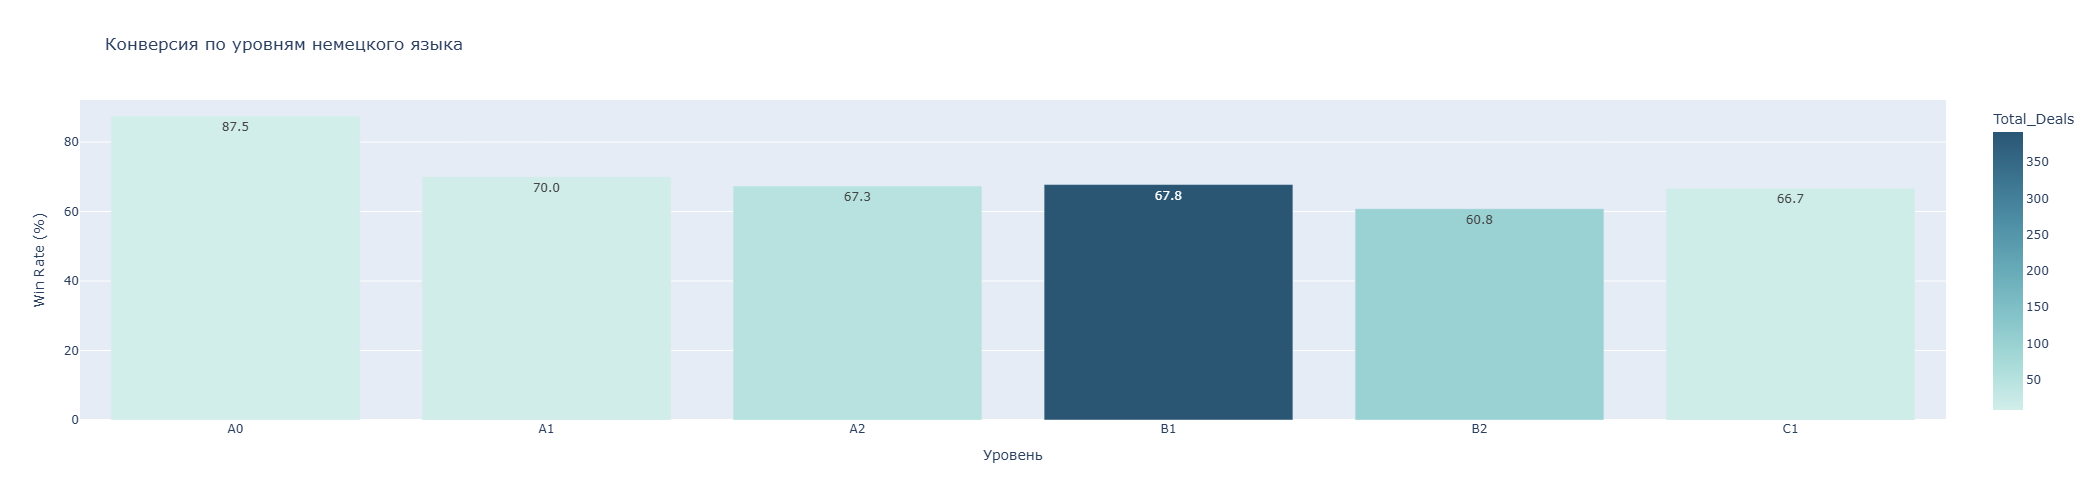

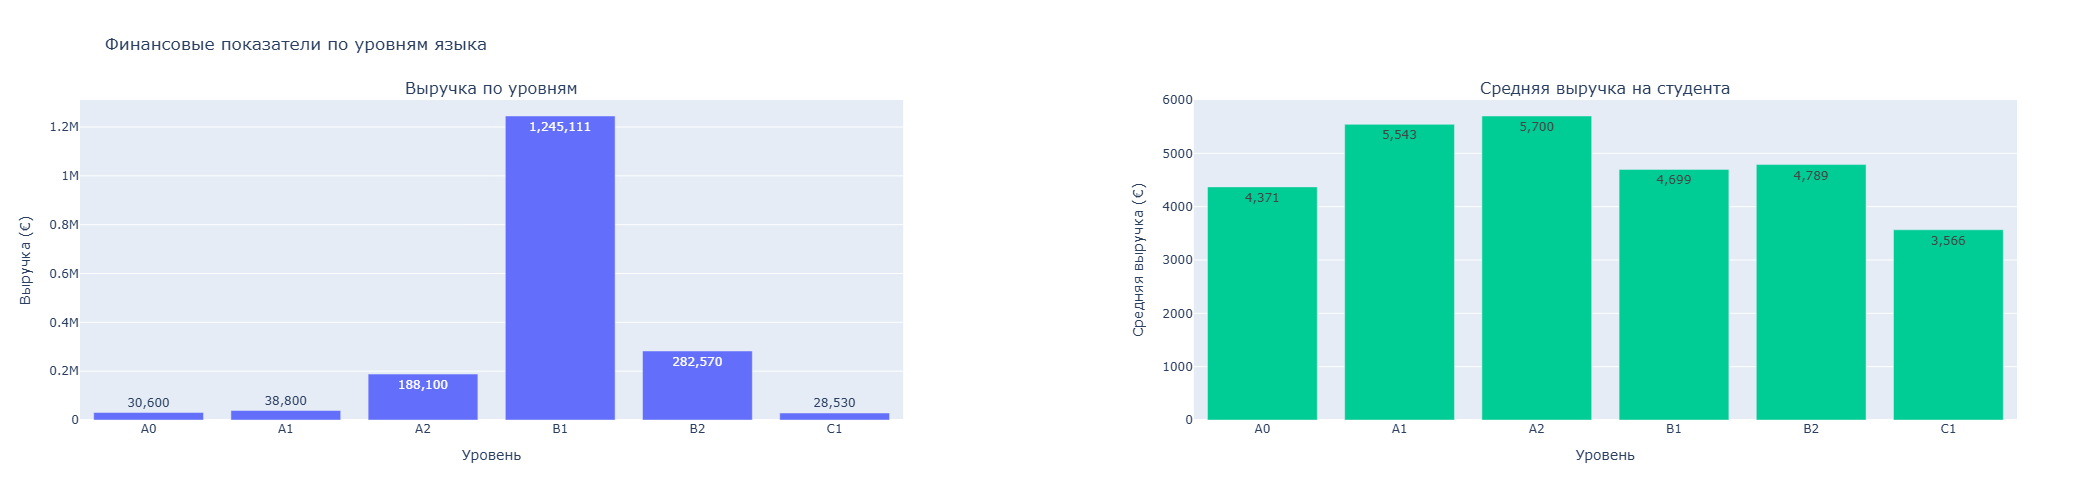


Статистика по уровням языка:



РАСПРЕДЕЛЕНИЕ УРОВНЕЙ ЯЗЫКА ПО ГОРОДАМ (ТОП-50)
Всего городов в таблице: 42


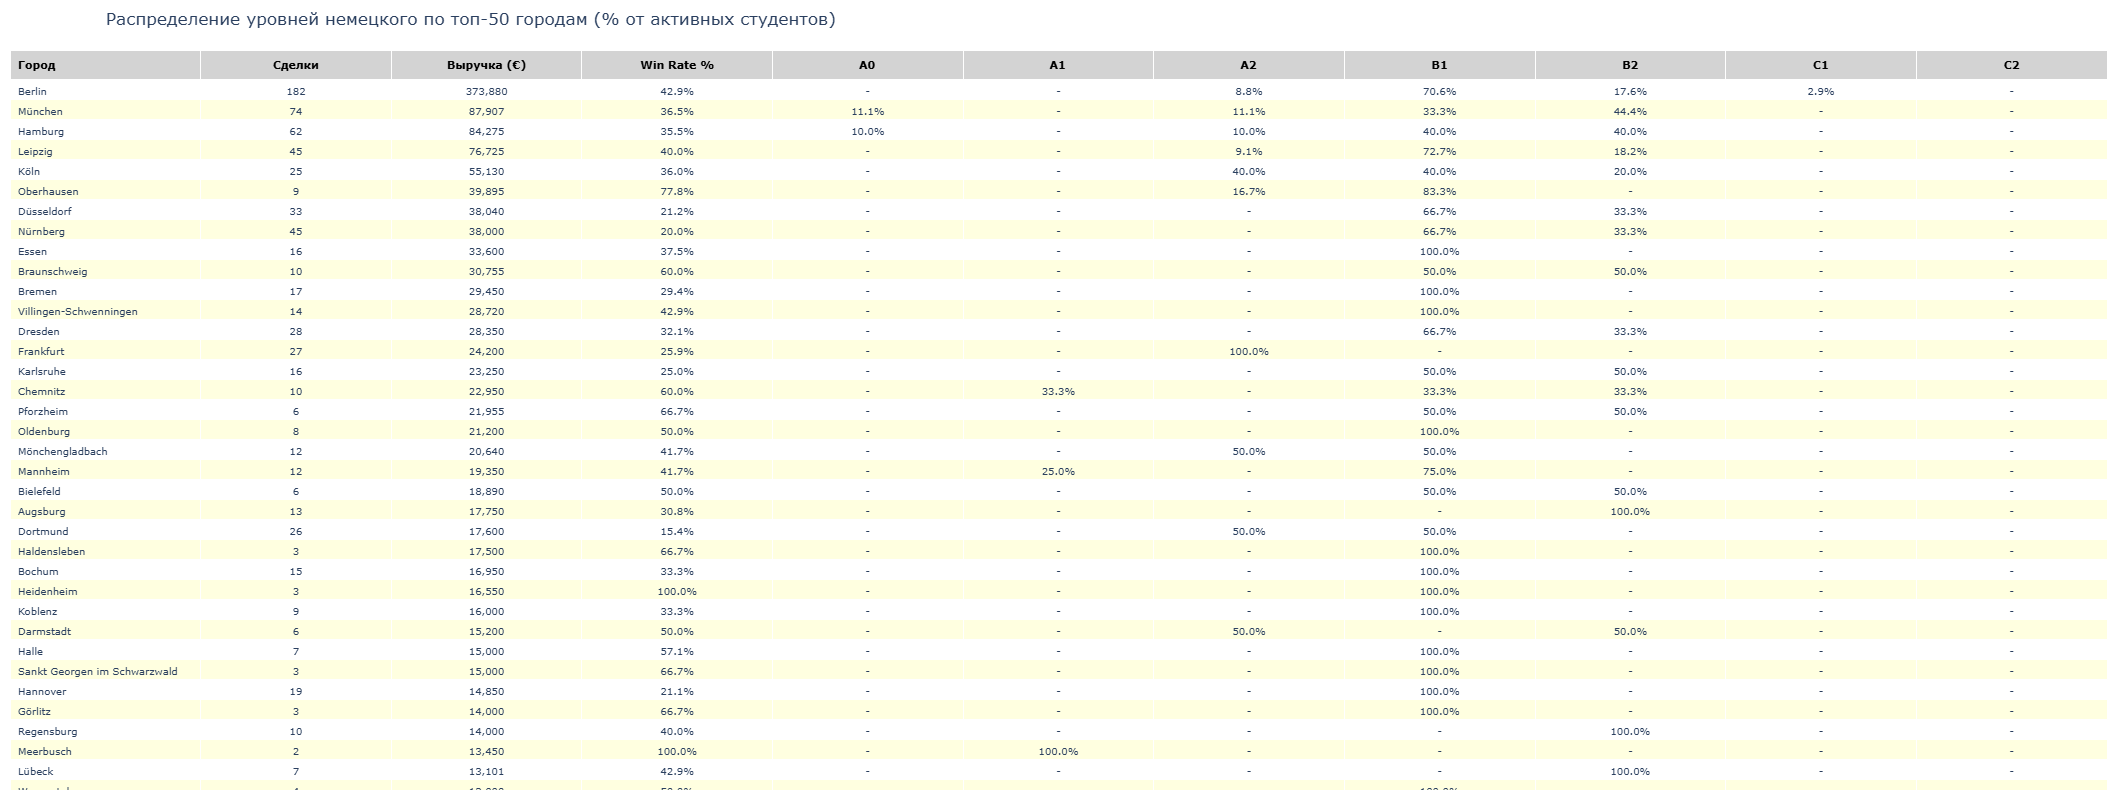

In [22]:
# Ячейка 22
print("АНАЛИЗ УРОВНЯ НЕМЕЦКОГО ЯЗЫКА")

# ---------- ПОДГОТОВКА ДАННЫХ ----------
deals_lang = deals[
    (deals['max_stage_rank'] >= 1) & 
    (deals['Level of Deutsch'].notna()) &
    (deals['Level of Deutsch'] != 'Unknown') &
    (deals['Level of Deutsch'] != 'unknown')
].copy()

print(f"Сделок с указанным уровнем языка: {len(deals_lang)}")

# ---------- ГРАФИК 1: КОНВЕРСИЯ ПО УРОВНЯМ ----------
lang_stats = deals_lang.groupby('Level of Deutsch').agg({
    'Id': 'count',
    'stage_normalized': lambda x: (x == 'Active Student').sum(),
    'revenue': 'sum'
}).reset_index()

lang_stats.columns = ['Level', 'Total_Deals', 'Active_Students', 'Total_Revenue']
lang_stats['Win_Rate'] = (lang_stats['Active_Students'] / lang_stats['Total_Deals'] * 100).round(2)
lang_stats['Avg_Revenue_per_Student'] = (lang_stats['Total_Revenue'] / lang_stats['Active_Students']).round(0)

level_order = ['A0', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2']
lang_stats['Level'] = pd.Categorical(lang_stats['Level'], categories=level_order, ordered=True)
lang_stats = lang_stats.sort_values('Level').dropna()

fig1 = px.bar(
    lang_stats,
    x='Level',
    y='Win_Rate',
    color='Total_Deals',
    text_auto='.1f',
    title='Конверсия по уровням немецкого языка',
    labels={'Win_Rate': 'Win Rate (%)', 'Level': 'Уровень'},
    color_continuous_scale='Teal',
    height=500
)
fig1.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': level_order})
fig1.show()

# ---------- ГРАФИК 2: ФИНАНСОВЫЕ ПОКАЗАТЕЛИ ----------
fig2 = make_subplots(
    rows=1, cols=2,
    subplot_titles=['Выручка по уровням', 'Средняя выручка на студента'],
    horizontal_spacing=0.15
)

fig2.add_trace(
    go.Bar(
        x=lang_stats['Level'],
        y=lang_stats['Total_Revenue'],
        text=lang_stats['Total_Revenue'].apply(lambda x: f'{x:,.0f}'),
        textposition='auto',
        marker_color='#636EFA',
        name='Выручка'
    ),
    row=1, col=1
)

fig2.add_trace(
    go.Bar(
        x=lang_stats['Level'],
        y=lang_stats['Avg_Revenue_per_Student'],
        text=lang_stats['Avg_Revenue_per_Student'].apply(lambda x: f'{x:,.0f}'),
        textposition='auto',
        marker_color='#00CC96',
        name='Средняя выручка'
    ),
    row=1, col=2
)

fig2.update_xaxes(title_text="Уровень", row=1, col=1)
fig2.update_xaxes(title_text="Уровень", row=1, col=2)
fig2.update_yaxes(title_text="Выручка (€)", row=1, col=1)
fig2.update_yaxes(title_text="Средняя выручка (€)", row=1, col=2)
fig2.update_layout(showlegend=False, height=500, title_text="Финансовые показатели по уровням языка")
fig2.show()

# ---------- ТАБЛИЦА: СТАТИСТИКА ПО УРОВНЯМ ----------
print("\nСтатистика по уровням языка:")
display(lang_stats.style.format({
    'Total_Revenue': '{:,.0f}',
    'Avg_Revenue_per_Student': '{:,.0f}',
    'Win_Rate': '{:.1f}%'
}).background_gradient(subset=['Win_Rate', 'Total_Revenue'], cmap='RdYlGn'))

# ---------- ТАБЛИЦА: РАСПРЕДЕЛЕНИЕ ПО ГОРОДАМ (ТОП-50) ----------
print("\nРАСПРЕДЕЛЕНИЕ УРОВНЕЙ ЯЗЫКА ПО ГОРОДАМ (ТОП-50)")

city_revenue = deals.groupby('City')['revenue'].sum().nlargest(50).index.tolist()
deals_city_lang = deals[
    (deals['City'].isin(city_revenue)) &
    (deals['Level of Deutsch'].notna()) &
    (deals['Level of Deutsch'] != 'Unknown') &
    (deals['Level of Deutsch'] != 'unknown') &
    (deals['stage_normalized'] == 'Active Student')
].copy()

if len(deals_city_lang) > 0:
    city_lang_dist = deals_city_lang.groupby(['City', 'Level of Deutsch']).size().reset_index(name='Active_Students')
    city_totals = city_lang_dist.groupby('City')['Active_Students'].sum().reset_index(name='Total_Active')
    city_lang_dist = pd.merge(city_lang_dist, city_totals, on='City')
    city_lang_dist['Percentage'] = (city_lang_dist['Active_Students'] / city_lang_dist['Total_Active'] * 100).round(1)
    
    city_stats = deals.groupby('City').agg({
        'Id': 'count',
        'revenue': 'sum',
        'stage_normalized': lambda x: (x == 'Active Student').sum()
    }).reset_index()
    city_stats.columns = ['City', 'Total_Deals', 'Total_Revenue', 'Active_Students']
    city_stats['Win_Rate_Pct'] = (city_stats['Active_Students'] / city_stats['Total_Deals'] * 100).round(1)
    
    city_lang_dist = pd.merge(city_lang_dist, city_stats[['City', 'Total_Deals', 'Total_Revenue', 'Win_Rate_Pct']], on='City')
    
    pivot_table = city_lang_dist.pivot_table(
        index='City',
        columns='Level of Deutsch',
        values='Percentage',
        aggfunc='first'
    ).fillna(0)
    
    for level in level_order:
        if level not in pivot_table.columns:
            pivot_table[level] = 0
    pivot_table = pivot_table[level_order]
    
    pivot_table = pd.merge(
        pivot_table,
        city_stats[['City', 'Total_Deals', 'Total_Revenue', 'Win_Rate_Pct']],
        left_index=True,
        right_on='City'
    )
    
    pivot_table = pivot_table.sort_values('Total_Revenue', ascending=False)
    
    print(f"Всего городов в таблице: {len(pivot_table)}")
    
    fig_table = go.Figure(data=[go.Table(
        header=dict(
            values=['<b>Город</b>', '<b>Сделки</b>', '<b>Выручка (€)</b>', '<b>Win Rate %</b>'] + 
                   [f'<b>{level}</b>' for level in level_order],
            fill_color='lightgrey',
            align=['left', 'center', 'center', 'center'] + ['center'] * len(level_order),
            font=dict(size=11, color='black')
        ),
        cells=dict(
            values=[
                pivot_table['City'],
                pivot_table['Total_Deals'],
                pivot_table['Total_Revenue'].apply(lambda x: f'{x:,.0f}'),
                pivot_table['Win_Rate_Pct'].apply(lambda x: f'{x:.1f}%')
            ] + [
                pivot_table[level].apply(lambda x: f'{x:.1f}%' if x > 0 else '-') 
                for level in level_order
            ],
            fill_color=[['white', 'lightyellow'] * (len(pivot_table) // 2 + 1)],
            align=['left', 'center', 'center', 'center'] + ['center'] * len(level_order),
            font=dict(size=10)
        )
    )])
    
    fig_table.update_layout(
        title='Распределение уровней немецкого по топ-50 городам (% от активных студентов)',
        height=800,
        margin=dict(l=10, r=10, t=50, b=10)
    )
    
    fig_table.show()

In [23]:
# Ячейка 23: Расчет Юнит-Экономики (METHOD: KHANIN + VACUUM MODEL)
# UA и AC — общие для всех продуктов (константы).
# Включает полную легенду формул.

print("РАСЧЕТ ЮНИТ-ЭКОНОМИКИ (VACUUM MODEL)")

# --- НАСТРОЙКИ ---
COGS_FIXED_PER_TRANS = 0       
COGS_PERCENT_FROM_CHECK = 0.0 

# 1. Подготовка данных
deals['Transactions'] = np.where(
    deals['Payment_Type_Recovered'] == 'one payment', 
    1, 
    deals['Months of study'].fillna(1)
)
deals.loc[deals['stage_normalized'] != 'Active Student', 'Transactions'] = 0

# 2. Расчет UA (ОБЩИЙ ТРАФИК - ЛЮДИ)
TOTAL_UA = contacts['Id'].nunique()

# 3. Атрибуция Расходов (AC) - ОБЩИЙ БЮДЖЕТ
total_marketing_spend = spend['Spend'].sum()

# 4. Агрегация по Продуктам
active_students_df = deals[deals['stage_normalized'] == 'Active Student']

# ПРОВЕРКА: считаем правильное B для TOTAL
TOTAL_B_CORRECT = active_students_df['Contact Name'].nunique()
print(f"ПРОВЕРКА: Всего уникальных клиентов (Active Student): {TOTAL_B_CORRECT}")

product_stats = active_students_df.groupby('Product').agg({
    'Contact Name': 'nunique',  # B (Buyers - Люди) - по продуктам
    'revenue': 'sum',           # Revenue
    'Transactions': 'sum',      # T
}).reset_index().rename(columns={
    'Contact Name': 'B', 
    'Transactions': 'T',
    'revenue': 'Revenue'
})

print(f"ПРОВЕРКА: Сумма B по продуктам (клиенты могут считаться несколько раз): {product_stats['B'].sum()}")

# 5. Расчет Метрик

# UA (Константа для всех)
product_stats['UA'] = TOTAL_UA

# C1 (Конверсия в покупку из общего потока)
product_stats['C1'] = product_stats['B'] / product_stats['UA']

# AC (Общий бюджет школы - одинаковый для всех продуктов)
# Логика "Вакуума": Проверяем, окупит ли продукт весь маркетинг школы в одиночку.
product_stats['AC'] = total_marketing_spend

# APC (Частота / Срок жизни)
product_stats['APC'] = product_stats['T'] / product_stats['B']

# AOV (Средний чек ОДНОЙ транзакции) - Revenue / T
product_stats['AOV'] = product_stats['Revenue'] / product_stats['T']

# COGS (на 1 транзакцию -> на 1 клиента)
total_cogs_amt = (product_stats['Revenue'] * COGS_PERCENT_FROM_CHECK) + (product_stats['T'] * COGS_FIXED_PER_TRANS)
product_stats['COGS'] = total_cogs_amt / product_stats['T'] # Себестоимость 1 транзакции

# CLTV (Прибыль с Клиента)
product_stats['CLTV'] = (product_stats['AOV'] - product_stats['COGS']) * product_stats['APC']

# LTV (Прибыль с Пользователя/UA)
product_stats['LTV'] = product_stats['CLTV'] * product_stats['C1']

# CPA (Цена Лида - одинаковая для всех)
product_stats['CPA'] = product_stats['AC'] / product_stats['UA']

# CAC (Цена Клиента - разная, так как B разный)
product_stats['CAC'] = product_stats['AC'] / product_stats['B']

# CM (Margin - "Вклад" продукта в покрытие общих расходов)
product_stats['CM'] = product_stats['Revenue'] - product_stats['AC'] - total_cogs_amt

# ROMI
product_stats['ROMI'] = (product_stats['CM'] / product_stats['AC']) * 100


# 6. Вывод
# Расчет TOTAL для справки - ВАЖНО: используем правильное B!
total_row = {
    'Product': 'TOTAL BUSINESS',
    'UA': TOTAL_UA,
    'B': TOTAL_B_CORRECT,  # ← ИСПРАВЛЕНИЕ: уникальные клиенты, а не сумма по продуктам!
    'Revenue': product_stats['Revenue'].sum(),
    'AC': total_marketing_spend,
    'T': product_stats['T'].sum(),
    'COGS': 0 
}
total_row['C1'] = total_row['B'] / total_row['UA']
total_row['AOV'] = total_row['Revenue'] / total_row['T'] if total_row['T'] > 0 else 0
total_row['APC'] = total_row['T'] / total_row['B'] if total_row['B'] > 0 else 0
total_cogs_global = (total_row['Revenue'] * COGS_PERCENT_FROM_CHECK) + (total_row['T'] * COGS_FIXED_PER_TRANS)
total_row['COGS'] = total_cogs_global / total_row['T'] if total_row['T'] > 0 else 0
total_row['CLTV'] = (total_row['AOV'] - total_row['COGS']) * total_row['APC']
total_row['LTV'] = total_row['CLTV'] * total_row['C1'] 
total_row['CPA'] = total_row['AC'] / total_row['UA']
total_row['CAC'] = total_row['AC'] / total_row['B']
total_row['CM'] = total_row['Revenue'] - total_row['AC'] - total_cogs_global
total_row['ROMI'] = (total_row['CM'] / total_row['AC']) * 100
total_df = pd.DataFrame([total_row])

print(f"\nИТОГОВЫЕ ДАННЫЕ ДЛЯ TOTAL:")
print(f"- UA: {TOTAL_UA}")
print(f"- B (уникальные клиенты): {TOTAL_B_CORRECT}")
print(f"- T (сумма транзакций): {product_stats['T'].sum()}")
print(f"- Revenue: {product_stats['Revenue'].sum()}")
print(f"- AC: {total_marketing_spend}")

final_cols = ['Product', 'UA', 'B', 'C1', 'AOV', 'T', 'APC', 'COGS', 'Revenue', 'CLTV', 'LTV', 'AC', 'CPA', 'CAC', 'CM', 'ROMI']
unit_econ_khanin = product_stats[final_cols].sort_values(by='CM', ascending=False).reset_index(drop=True)

def style_clean_table(df):
    return df.style.format({
        'UA': '{:,.0f}', 'B': '{:,.0f}', 'T': '{:,.0f}',
        'C1': '{:.2%}', 'ROMI': '{:.1f}%',
        'AOV': '{:,.1f}', 'APC': '{:.2f}', 'COGS': '{:,.1f}',
        'Revenue': '{:,.0f}',
        'CLTV': '{:,.1f}', 'LTV': '{:,.1f}',
        'AC': '{:,.0f}', 'CPA': '{:,.2f}', 'CAC': '{:,.1f}',
        'CM': '{:,.0f}'
    }).background_gradient(subset=['ROMI'], cmap='RdYlGn', vmin=-100, vmax=200)

print("\n1. ЭКОНОМИКА ВСЕГО БИЗНЕСА:")
display(style_clean_table(total_df[final_cols]))

print("\n2. ЭКОНОМИКА ПО ПРОДУКТАМ (ВАКУУМНАЯ МОДЕЛЬ):")
display(style_clean_table(unit_econ_khanin))

# --- ПОЛНАЯ ЛЕГЕНДА МЕТРИК ---
print("\n")
print("СПРАВОЧНИК МЕТРИК И ФОРМУЛ (МЕТОДОЛОГИЯ: Д. ХАНИН + ОБЩАЯ ВИТРИНА)")
print("\n")
print(f"0. ИСХОДНЫЕ ДАННЫЕ:")
print(f"   - UA считается по таблице CONTACTS (Все уникальные люди в базе: {TOTAL_UA}).")
print(f"   - B (Покупатели) считается по таблице DEALS (Уникальные Contact Name со статусом Active Student).")
print(f"   - Всего уникальных клиентов: {TOTAL_B_CORRECT}")
print(f"   - Всего сделок: {len(active_students_df)}")
print(f"   - Клиентов с повторными покупками: {len(active_students_df) - TOTAL_B_CORRECT}")

print("\n1. БАЗОВЫЕ МЕТРИКИ:")
print("   • UA (User Acquisition) = Уникальные контакты. (Входящий поток людей).")
print("   • B (Buyers) = Платящие клиенты.")
print("   • C1 (Conversion) = B / UA. (Конверсия из посетителя в покупателя).")
print("   • Revenue (Выручка) = Фактически полученные деньги (First payment + Recurring payments).")

print("\n2. ТРАНЗАКЦИОННЫЕ МЕТРИКИ:")
print("   • T (Transactions) = Кол-во платежей. (Если рассрочка = месяцы обучения, если полная = 1).")
print("   • AOV (Average Order Value) = Revenue / T. (Средний чек ОДНОЙ транзакции).")
print("   • APC (Average Payment Count) = T / B. (Сколько раз в среднем платит студент).")

print("\n3. ЗАТРАТЫ:")
print("   • AC (Acquisition Cost) = ВЕСЬ маркетинговый бюджет школы (одинаковый для каждого продукта).")
print("     -> Мы проверяем, способен ли продукт в одиночку окупить весь маркетинг.")
print("   • COGS (Cost of Goods Sold) = Себестоимость ОДНОЙ транзакции (комиссии, налоги).")
print("   • CPA (Cost Per Acquisition) = AC / UA. (Цена одного лида - одинаковая для всех).")
print("   • CAC (Customer Acquisition Cost) = AC / B. (Цена одного покупателя - будет высокой для слабых продуктов).")

print("\n4. ЭКОНОМИКА (ПРИБЫЛЬ):")
print("   • CLTV (Customer LTV) = (AOV - COGS) * APC.")
print("     -> Чистая прибыль с одного ПЛАТЯЩЕГО клиента за всю жизнь.")
print("   • LTV (User LTV) = CLTV * C1.")
print("     -> Чистая прибыль с одного ПОСЕТИТЕЛЯ (UA). Самая важная метрика для масштабирования.")
print("   • CM (Contribution Margin) = UA * (LTV - CPA).")
print("     -> Сколько денег бизнес заработал 'чистыми' (Revenue - Total AC).")
print("   • ROMI = CM / AC * 100%.")

РАСЧЕТ ЮНИТ-ЭКОНОМИКИ (VACUUM MODEL)
ПРОВЕРКА: Всего уникальных клиентов (Active Student): 829
ПРОВЕРКА: Сумма B по продуктам (клиенты могут считаться несколько раз): 831

ИТОГОВЫЕ ДАННЫЕ ДЛЯ TOTAL:
- UA: 18548
- B (уникальные клиенты): 829
- T (сумма транзакций): 4090
- Revenue: 3568246.3
- AC: 149523.44999999998

1. ЭКОНОМИКА ВСЕГО БИЗНЕСА:



2. ЭКОНОМИКА ПО ПРОДУКТАМ (ВАКУУМНАЯ МОДЕЛЬ):




СПРАВОЧНИК МЕТРИК И ФОРМУЛ (МЕТОДОЛОГИЯ: Д. ХАНИН + ОБЩАЯ ВИТРИНА)


0. ИСХОДНЫЕ ДАННЫЕ:
   - UA считается по таблице CONTACTS (Все уникальные люди в базе: 18548).
   - B (Покупатели) считается по таблице DEALS (Уникальные Contact Name со статусом Active Student).
   - Всего уникальных клиентов: 829
   - Всего сделок: 841
   - Клиентов с повторными покупками: 12

1. БАЗОВЫЕ МЕТРИКИ:
   • UA (User Acquisition) = Уникальные контакты. (Входящий поток людей).
   • B (Buyers) = Платящие клиенты.
   • C1 (Conversion) = B / UA. (Конверсия из посетителя в покупателя).
   • Revenue (Выручка) = Фактически полученные деньги (First payment + Recurring payments).

2. ТРАНЗАКЦИОННЫЕ МЕТРИКИ:
   • T (Transactions) = Кол-во платежей. (Если рассрочка = месяцы обучения, если полная = 1).
   • AOV (Average Order Value) = Revenue / T. (Средний чек ОДНОЙ транзакции).
   • APC (Average Payment Count) = T / B. (Сколько раз в среднем платит студент).

3. ЗАТРАТЫ:
   • AC (Acquisition Cost) = ВЕСЬ маркетинго

In [24]:
# Ячейка 24: Поиск Точек Роста (SENSITIVITY ANALYSIS & SCENARIOS - FINAL)
print("ПОИСК ТОЧЕК РОСТА (SENSITIVITY ANALYSIS)")

# --- НАСТРОЙКИ ---
GROWTH_PCT = 0.10
COGS_FIXED_PER_TRANS = 0
COGS_PERCENT_FROM_CHECK = 0.0

ACTION_INSIGHTS = {
    'UA': "Масштабирование каналов",
    'C1': "Оптимизация воронки", 
    'AOV': "Up-sell и цены",
    'APC': "Удержание и лояльность",
    'CPA': "Оптимизация рекламы"
}

# --- ФУНКЦИИ ---
def calculate_scenario_metrics(ua, c1, aov, apc, ac_base, product_name, scenario_name, growth_pct):
    b = ua * c1 if ua > 0 and c1 > 0 else 0
    t = b * apc if b > 0 and apc > 0 else 0
    revenue = t * aov if t > 0 and aov > 0 else 0
    
    if "UA" in scenario_name:
        ac = ac_base * (1 + growth_pct)
    elif "CPA" in scenario_name:
        ac = ac_base * (1 - growth_pct)
    else:
        ac = ac_base

    cogs_total = (revenue * COGS_PERCENT_FROM_CHECK) + (t * COGS_FIXED_PER_TRANS)
    cogs_per_trans = cogs_total / t if t > 0 else 0
    
    cltv = (aov - cogs_per_trans) * apc if aov > 0 and cogs_per_trans >= 0 and apc > 0 else 0
    ltv = cltv * c1 if cltv > 0 and c1 > 0 else 0
    
    cm = revenue - ac - cogs_total
    romi = (cm / ac * 100) if ac > 0 else 0
    cpa = ac / ua if ua > 0 else 0
    cac = ac / b if b > 0 else 0
    
    scenario_type = 'BASELINE'
    if scenario_name != 'BASELINE':
        if 'C1' in scenario_name: scenario_type = 'C1'
        elif 'AOV' in scenario_name: scenario_type = 'AOV'
        elif 'APC' in scenario_name: scenario_type = 'APC'
        elif 'CPA' in scenario_name: scenario_type = 'CPA'
        elif 'UA' in scenario_name: scenario_type = 'UA'
    
    return {
        'Scenario': scenario_name, 'Scenario_Type': scenario_type, 'Growth_Pct': growth_pct,
        'Product': product_name, 'UA': ua, 'C1': c1, 'B': b, 'AOV': aov, 'APC': apc, 
        'T': t, 'Revenue': revenue, 'AC': ac, 'CLTV': cltv, 'LTV': ltv, 
        'CPA': cpa, 'CAC': cac, 'CM': cm, 'ROMI': romi
    }

def generate_scenarios_for_row(row, product_name):
    base_ua, base_c1, base_aov, base_apc = row['UA'], row['C1'], row['AOV'], row['APC']
    base_ac = row['AC'] if 'AC' in row else 0
    
    scenarios = []
    scenarios.append(calculate_scenario_metrics(
        base_ua, base_c1, base_aov, base_apc, base_ac, product_name, "BASELINE", 0))
    
    g = GROWTH_PCT
    scenarios.append(calculate_scenario_metrics(
        base_ua * (1 + g), base_c1, base_aov, base_apc, base_ac, product_name, f"UA +{int(g*100)}%", g))
    scenarios.append(calculate_scenario_metrics(
        base_ua, base_c1 * (1 + g), base_aov, base_apc, base_ac, product_name, f"C1 +{int(g*100)}%", g))
    scenarios.append(calculate_scenario_metrics(
        base_ua, base_c1, base_aov * (1 + g), base_apc, base_ac, product_name, f"AOV +{int(g*100)}%", g))
    scenarios.append(calculate_scenario_metrics(
        base_ua, base_c1, base_aov, base_apc * (1 + g), base_ac, product_name, f"APC +{int(g*100)}%", g))
    scenarios.append(calculate_scenario_metrics(
        base_ua, base_c1, base_aov, base_apc, base_ac, product_name, f"CPA -{int(g*100)}%", g))
    
    return pd.DataFrame(scenarios)

def run_sensitivity_analysis(row, product_name):
    base_cm = row['CM'] if 'CM' in row else 0
    results = []
    
    metrics = ['UA', 'C1', 'AOV', 'APC']
    steps = [-0.10, -0.05, 0.05, 0.10]
    
    for metric in metrics:
        for step in steps:
            u = row['UA'] * (1 + step) if metric == 'UA' else row['UA']
            c = row['C1'] * (1 + step) if metric == 'C1' else row['C1']
            a = row['AOV'] * (1 + step) if metric == 'AOV' else row['AOV']
            p = row['APC'] * (1 + step) if metric == 'APC' else row['APC']
            
            cost = row['AC'] * (1 + step) if metric == 'UA' else row['AC']
            
            b = u * c if u > 0 and c > 0 else 0
            t = b * p if b > 0 and p > 0 else 0
            rev = t * a if t > 0 and a > 0 else 0
            cogs = (rev * COGS_PERCENT_FROM_CHECK) + (t * COGS_FIXED_PER_TRANS)
            cm = rev - cost - cogs
            
            cm_impact = cm - base_cm
            cm_impact_pct = (cm_impact / abs(base_cm) * 100) if abs(base_cm) > 0 else 0
            
            results.append({
                'Metric': metric, 'Change': f"{step:+.0%}",
                'New_Value': (u if metric=='UA' else c if metric=='C1' else a if metric=='AOV' else p),
                'CM_Impact': cm_impact, 'CM_Impact_Pct': cm_impact_pct
            })
    
    return pd.DataFrame(results)

def display_scenario_table(df, title):
    if df.empty: return
    
    print(f"\n{title}")
    base_scenario = df[df['Scenario'] == 'BASELINE']
    if not base_scenario.empty:
        base_cm = base_scenario.iloc[0]['CM']
        df['CM_Growth'] = df['CM'] - base_cm  # Просто прирост CM
    
    format_dict = {
        'UA': '{:,.0f}', 'B': '{:,.0f}', 'T': '{:,.0f}', 'Revenue': '{:,.0f}', 
        'C1': '{:.2%}', 'ROMI': '{:.0f}%', 'AOV': '{:,.1f}', 'APC': '{:.2f}', 
        'CLTV': '{:,.0f}', 'LTV': '{:,.1f}', 'AC': '{:,.0f}', 'CPA': '{:,.2f}', 
        'CAC': '{:,.1f}', 'CM': '{:,.0f}', 'CM_Growth': '{:+,.0f}'
    }
    
    cols = ['Scenario', 'UA', 'C1', 'B', 'T', 'AOV', 'APC', 'Revenue', 'AC', 
            'CPA', 'CAC', 'CLTV', 'LTV', 'CM', 'CM_Growth', 'ROMI']
    
    sorted_df = df[cols].sort_values('CM_Growth', ascending=False)
    display(sorted_df.style.format(format_dict).background_gradient(
        subset=['CM_Growth'], cmap='Greens', vmin=0))
    
    growth_scenarios = df[df['Scenario'] != 'BASELINE']
    if not growth_scenarios.empty:
        best = growth_scenarios.sort_values('CM_Growth', ascending=False).iloc[0]
        print(f"Наилучший сценарий: {best['Scenario']}")
        print(f"Прирост CM: {best['CM_Growth']:+,.0f}")
        print(f"ROMI: {best['ROMI']:.1f}%")
        print(f"Действие: {ACTION_INSIGHTS.get(best['Scenario_Type'], '')}")

# --- РАСЧЕТ TOTAL BUSINESS ИЗ ИСХОДНЫХ ДАННЫХ ---
print("1. АНАЛИЗ ВСЕГО БИЗНЕСА")

# 1. Рассчитываем как в Ячейке 31
TOTAL_UA = contacts['Id'].nunique()
total_marketing_spend = spend['Spend'].sum()

# Active Student сделки
active_students_df = deals[deals['stage_normalized'] == 'Active Student']

# Правильный B (уникальные клиенты)
TOTAL_B_CORRECT = active_students_df['Contact Name'].nunique()

# Суммируем транзакции и выручку
total_t = active_students_df['Transactions'].sum()
total_revenue = active_students_df['revenue'].sum()

# Расчет метрик
global_row = {
    'UA': TOTAL_UA,
    'B': TOTAL_B_CORRECT,  # 829
    'Revenue': total_revenue,
    'T': total_t,
    'AC': total_marketing_spend,
    'C1': TOTAL_B_CORRECT / TOTAL_UA if TOTAL_UA > 0 else 0,
    'AOV': total_revenue / total_t if total_t > 0 else 0,
    'APC': total_t / TOTAL_B_CORRECT if TOTAL_B_CORRECT > 0 else 0,
}

# Расчет CM как в Ячейке 31
cogs_global = (total_revenue * COGS_PERCENT_FROM_CHECK) + (total_t * COGS_FIXED_PER_TRANS)
global_row['CM'] = total_revenue - total_marketing_spend - cogs_global

print(f"Параметры (рассчитаны из исходных данных):")
print(f"- UA: {global_row['UA']:,.0f}")
print(f"- B: {global_row['B']:,.0f} (уникальные клиенты)")
print(f"- C1: {global_row['C1']:.2%}")
print(f"- AOV: {global_row['AOV']:,.1f}")
print(f"- APC: {global_row['APC']:.2f}")
print(f"- AC: {global_row['AC']:,.0f}")
print(f"- CM: {global_row['CM']:,.0f}")

# Сценарии роста
global_scenarios = generate_scenarios_for_row(global_row, "TOTAL BUSINESS")
display_scenario_table(global_scenarios, "СЦЕНАРИИ РОСТА ДЛЯ ВСЕГО БИЗНЕСА")

# Анализ чувствительности
print("\nАНАЛИЗ ЧУВСТВИТЕЛЬНОСТИ (МИКРО-ИЗМЕНЕНИЯ ±5-10%)")
sens_df = run_sensitivity_analysis(global_row, "TOTAL")
if not sens_df.empty:
    sens_df = sens_df.sort_values('CM_Impact', ascending=False)
    display(sens_df.style.format({
        'New_Value': '{:.2f}', 'CM_Impact': '{:+,.0f}', 'CM_Impact_Pct': '{:+.1f}%'
    }).background_gradient(subset=['CM_Impact'], cmap='RdYlGn'))
    
    print("\nКлючевые инсайты по чувствительности:")
    for metric in ['UA', 'C1', 'AOV', 'APC']:
        metric_data = sens_df[sens_df['Metric'] == metric]
        if not metric_data.empty:
            max_impact = metric_data.loc[metric_data['CM_Impact'].idxmax()]
            print(f"{metric}: {max_impact['Change']} → Влияние на CM: {max_impact['CM_Impact']:+,.0f}")

# --- АНАЛИЗ ПО ПРОДУКТАМ ---
print("\n2. АНАЛИЗ ПО ПРОДУКТАМ (ТОП-ПРОДУКТЫ)")

# Создаем product_stats как в Ячейке 31
product_stats = active_students_df.groupby('Product').agg({
    'Contact Name': 'nunique', 'revenue': 'sum', 'Transactions': 'sum'
}).reset_index().rename(columns={'Contact Name': 'B', 'Transactions': 'T', 'revenue': 'Revenue'})

product_stats['UA'] = TOTAL_UA
product_stats['AC'] = total_marketing_spend
product_stats['C1'] = product_stats['B'] / product_stats['UA']
product_stats['AOV'] = product_stats['Revenue'] / product_stats['T']
product_stats['APC'] = product_stats['T'] / product_stats['B']

total_cogs_amt = (product_stats['Revenue'] * COGS_PERCENT_FROM_CHECK) + (product_stats['T'] * COGS_FIXED_PER_TRANS)
product_stats['COGS'] = total_cogs_amt / product_stats['T']
product_stats['CLTV'] = (product_stats['AOV'] - product_stats['COGS']) * product_stats['APC']
product_stats['LTV'] = product_stats['CLTV'] * product_stats['C1']
product_stats['CPA'] = product_stats['AC'] / product_stats['UA']
product_stats['CAC'] = product_stats['AC'] / product_stats['B']
product_stats['CM'] = product_stats['Revenue'] - product_stats['AC'] - total_cogs_amt
product_stats['ROMI'] = (product_stats['CM'] / product_stats['AC']) * 100

# Отбираем топ-продукты
revenue_threshold = product_stats['Revenue'].max() * 0.1
top_products = product_stats[product_stats['Revenue'] > revenue_threshold].copy()

all_scenarios = []
for _, row in top_products.iterrows():
    product_name = row['Product']
    print(f"\nПРОДУКТ: {product_name.upper()}")
    
    scenarios = generate_scenarios_for_row(row, product_name)
    if not scenarios.empty:
        display_scenario_table(scenarios, f"Сценарии роста для '{product_name}'")
        
        growth_scenarios = scenarios[scenarios['Scenario'] != 'BASELINE']
        if not growth_scenarios.empty:
            best = growth_scenarios.sort_values('CM_Growth', ascending=False).iloc[0]
            all_scenarios.append({
                'Product': product_name, 'Best_Scenario': best['Scenario'],
                'Scenario_Type': best['Scenario_Type'], 'CM_Growth': best['CM_Growth'],
                'Base_CM': scenarios[scenarios['Scenario'] == 'BASELINE'].iloc[0]['CM'],
                'Action': ACTION_INSIGHTS.get(best['Scenario_Type'], '')
            })

# Сводная карта приоритетов
if all_scenarios:
    print("\n3. СВОДНАЯ КАРТА ПРИОРИТЕТОВ ПО ПРОДУКТАМ")
    summary = pd.DataFrame(all_scenarios)
    summary['Growth_Pct'] = (summary['CM_Growth'] / summary['Base_CM'].abs() * 100)
    summary['Growth_Pct'] = summary['Growth_Pct'].apply(lambda x: x if abs(x) < 1000 else (1000 if x > 0 else -1000))
    summary = summary.sort_values('CM_Growth', ascending=False)
    
    display(summary.style.format({
        'CM_Growth': '{:+,.0f}', 'Base_CM': '{:,.0f}', 'Growth_Pct': '{:+.1f}%'
    }).background_gradient(subset=['CM_Growth'], cmap='Greens', vmin=0)
    .background_gradient(subset=['Growth_Pct'], cmap='RdYlGn', vmin=-100, vmax=100))

ПОИСК ТОЧЕК РОСТА (SENSITIVITY ANALYSIS)
1. АНАЛИЗ ВСЕГО БИЗНЕСА
Параметры (рассчитаны из исходных данных):
- UA: 18,548
- B: 829 (уникальные клиенты)
- C1: 4.47%
- AOV: 872.4
- APC: 4.93
- AC: 149,523
- CM: 3,418,723

СЦЕНАРИИ РОСТА ДЛЯ ВСЕГО БИЗНЕСА


Наилучший сценарий: AOV +10%
Прирост CM: +356,825
ROMI: 2525.1%
Действие: Up-sell и цены

АНАЛИЗ ЧУВСТВИТЕЛЬНОСТИ (МИКРО-ИЗМЕНЕНИЯ ±5-10%)



Ключевые инсайты по чувствительности:
UA: +10% → Влияние на CM: +341,872
C1: +10% → Влияние на CM: +356,825
AOV: +10% → Влияние на CM: +356,825
APC: +10% → Влияние на CM: +356,825

2. АНАЛИЗ ПО ПРОДУКТАМ (ТОП-ПРОДУКТЫ)

ПРОДУКТ: DIGITAL MARKETING

Сценарии роста для 'digital marketing'


Наилучший сценарий: C1 +10%
Прирост CM: +226,349
ROMI: 1565.2%
Действие: Оптимизация воронки

ПРОДУКТ: UX/UI DESIGN

Сценарии роста для 'ux/ui design'


Наилучший сценарий: APC +10%
Прирост CM: +93,948
ROMI: 591.1%
Действие: Удержание и лояльность

ПРОДУКТ: WEB DEVELOPER

Сценарии роста для 'web developer'


Наилучший сценарий: C1 +10%
Прирост CM: +36,528
ROMI: 168.7%
Действие: Оптимизация воронки

3. СВОДНАЯ КАРТА ПРИОРИТЕТОВ ПО ПРОДУКТАМ


<div style="font-family: monospace; line-height: 1.4;">
<h3>ЯЧЕЙКА 25. ДЕРЕВО МЕТРИК БИЗНЕСА</h3>

<p><strong>УРОВЕНЬ 1: Ключевой показатель бизнеса</strong><br>
<span style="margin-left: 20px;">└── Маржинальная прибыль (CM) — Revenue - AC - COGS</span></p>

<p><strong>УРОВЕНЬ 2: Юнит-экономика</strong><br>
<span style="margin-left: 20px;">├── UA (User Acquisition) — Уникальные контакты → COUNTUNIQUE(CONTACTS['Id'])</span><br>
<span style="margin-left: 20px;">├── C1 (Conversion Rate) — Конверсия в покупателя → B / UA</span><br>
<span style="margin-left: 20px;">├── CPA (Cost Per Acquisition) — Стоимость посетителя → AC / UA</span><br>
<span style="margin-left: 20px;">├── AOV (Average Order Value) — Средний чек → Revenue / T</span><br>
<span style="margin-left: 20px;">├── COGS (Cost of Goods Sold) — Себестоимость (моделируемая)</span><br>
<span style="margin-left: 20px;">├── APC (Average Payment Count) — Платежи на клиента → T / B</span><br>
<span style="margin-left: 20px;">├── CPC (Cost Per Click) — Стоимость клика → AC / Clicks</span><br>
<span style="margin-left: 20px;">└── CTR (Click-Through Rate) — Конверсия в клик → Clicks / Impressions</span></p>

<p><strong>УРОВЕНЬ 2.1: Финансовые показатели</strong><br>
<span style="margin-left: 20px;">├── Оборот (Revenue) — Сумма поступлений → SUM(DEALS['revenue'])</span><br>
<span style="margin-left: 20px;">└── ROMI (Return on Marketing) — Окупаемость рекламы → CM / AC</span></p>

<p><strong>УРОВЕНЬ 3: Продуктовые метрики</strong><br>
<span style="margin-left: 20px;">├── B (Buyers) — Платящие клиенты → COUNT(DEALS['is_paid'])</span><br>
<span style="margin-left: 20px;">├── AC (Advertising Cost) — Расходы на рекламу → SUM(SPEND['Spend'])</span><br>
<span style="margin-left: 20px;">├── CAC (Customer Acquisition Cost) — Стоимость клиента → AC / B</span><br>
<span style="margin-left: 20px;">├── CLTV (Customer Lifetime Value) — Прибыль с клиента → (AOV - COGS) × APC</span><br>
<span style="margin-left: 20px;">├── LTV (Lifetime Value) — Ценность посетителя → CLTV × C1</span><br>
<span style="margin-left: 20px;">└── T (Transactions) — Всего транзакций → SUM(DEALS['Transactions'])</span></p>

<p><strong>УРОВЕНЬ 4: Атомные метрики (ключевые данные)</strong><br>
<span style="margin-left: 20px;">├── DEALS['Created Time'] — Дата создания лида</span><br>
<span style="margin-left: 20px;">├── DEALS['Closing Date'] — Дата закрытия сделки</span><br>
<span style="margin-left: 20px;">├── DEALS['Source'] / SPEND['Source'] — Источник трафика</span><br>
<span style="margin-left: 20px;">├── DEALS['Campaign'] — Кампания</span><br>
<span style="margin-left: 20px;">├── DEALS['Product'] — Тип курса</span><br>
<span style="margin-left: 20px;">├── DEALS['Stage'] — Стадия воронки</span><br>
<span style="margin-left: 20px;">├── DEALS['Quality'] — Качество лида</span><br>
<span style="margin-left: 20px;">├── DEALS['City'] — География</span><br>
<span style="margin-left: 20px;">├── SPEND['Clicks'] — Клики по рекламе</span><br>
<span style="margin-left: 20px;">└── SPEND['Impressions'] — Показы рекламы</span></p>

<p><strong>УРОВЕНЬ 5: Ванильные метрики (мониторинг)</strong><br>
<span style="margin-left: 20px;">├── DEALS['SLA'] — Время ответа</span><br>
<span style="margin-left: 20px;">├── DEALS['Level of Deutsch'] — Уровень языка</span><br>
<span style="margin-left: 20px;">├── DEALS['Course duration'] — Длительность курса</span><br>
<span style="margin-left: 20px;">├── CALLS['Call Duration (in seconds)'] — Длительность звонков</span><br>
<span style="margin-left: 20px;">├── CALLS['Call Type'] — Тип звонка</span><br>
<span style="margin-left: 20px;">├── CALLS['Call Status'] — Статус звонка</span><br>
<span style="margin-left: 20px;">├── SPEND['AdGroup'] — Группа объявлений</span><br>
<span style="margin-left: 20px;">└── SPEND['Ad'] — Конкретное объявление</span></p>

<p><strong>КЛЮЧЕВЫЕ ЗАВИСИМОСТИ</strong><br>
- B = UA × C1 (Клиенты = Посетители × Конверсия)<br>
- Revenue = AOV × T (Оборот = Чек × Транзакции)<br>
- T = B × APC (Транзакции = Клиенты × Частота)<br>
- CAC = AC / B (Стоимость клиента = Реклама / Клиенты)<br>
- CLTV = (AOV - COGS) × APC (Ценность клиента = (Чек - Себестоимость) × Частота)<br>
- LTV = CLTV × C1 (Ценность посетителя = Ценность клиента × Конверсия)<br>
- CM = Revenue - AC - COGS (Маржа = Оборот - Реклама - Себестоимость)<br>
- ROMI = CM / AC (Окупаемость = Маржа / Реклама)</p>

<p><em>Прибыль (Profit) не включена — нет данных о постоянных затратах</em></p>
</div>

In [25]:
# Ячейка 26 HADI циклы и описание A/B тестов

# === Настройки отображения ===
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# === Подготовка данных ===
# создаём created_date, если его нет
if 'created_date' not in contacts.columns:
    contacts['created_date'] = pd.to_datetime(contacts['Created Time']).dt.date

# UA = все уникальные контакты
TOTAL_UA = contacts['Id'].nunique()

# B = уникальные покупатели по продукту (Active Student)
active_students_df = deals[deals['stage_normalized'] == 'Active Student']
buyers_per_product = active_students_df.groupby('Product')['Contact Name'].nunique()

# Конверсия C1 = B / UA
c1_per_product = buyers_per_product / TOTAL_UA

# Оставляем только три основных продукта
main_products = ["digital marketing", "ux/ui design", "web developer"]
product_stats = pd.DataFrame({
    "Продукт": buyers_per_product.index,
    "B (Покупатели)": buyers_per_product.values,
    "UA (Общий трафик)": TOTAL_UA,
    "C1 (Конверсия)": c1_per_product.values
})
product_stats = product_stats[product_stats["Продукт"].isin(main_products)]

# === Параметры эксперимента ===
ALPHA = 0.05
POWER = 0.8
MDE = 0.10  # базовое значение для HADI-текстов — не трогаем
MDE_LIST = [0.10, 0.20, 0.30]  # считаем результаты для +10%, +20%, +30%
DAILY_LEADS_PER_GROUP = contacts.groupby('created_date')['Id'].nunique().mean() / 2

# === Функции ===
def required_sample(p: float, mde: float, alpha: float = ALPHA, power: float = POWER) -> float:
    """Корректный расчёт выборки через power-анализ для двух пропорций (на одну группу)"""
    p1 = p
    p2 = p * (1 + mde)
    diff = abs(p2 - p1)
    pooled_var = (p1*(1-p1) + p2*(1-p2)) / 2
    effect_size = diff / np.sqrt(pooled_var)

    n_required = NormalIndPower().solve_power(
        effect_size=effect_size,
        nobs1=None,
        alpha=alpha,
        power=power,
        ratio=1.0,
        alternative='two-sided'
    )
    return n_required

def required_days(n_required: float, daily_leads: float) -> int:
    return int(np.ceil(n_required / daily_leads))

def make_hadi_tables(hyp_name: str, hyp_text: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    hadi_df = pd.DataFrame({
        "Этап": ["Hypothesis (H)", "Action (A)", "Data (D)", "Insight (I)"],
        "Формулировка": [
            f"{hyp_text}. Ожидаемый рост конверсии на {MDE*100:.0f}%.",
            "Настроить процесс согласно гипотезе для тестовой группы (50%). Контрольная группа — текущий процесс.",
            f"Срок теста — 2 недели. Сравниваются две группы лидов. Метрика — конверсия (C1). Цель — прирост ≥ {MDE*100:.0f}%.",
            "Гипотеза подтверждается, если прирост конверсии ≥ целевого уровня и результат статистически значим."
        ]
    })
    abtest_df = pd.DataFrame({
        "Параметр": [
            "Гипотеза",
            "Нулевая гипотеза",
            "Условия проведения A-теста",
            "Условия проведения B-теста",
            "Метрика для отслеживания",
            "Граница подтверждения гипотезы",
            "Уровень значимости"
        ],
        "Описание": [
            f"{hyp_text} увеличит конверсию (C1) на {MDE*100:.0f}%.",
            "Нет различий: C1_B ≤ C1_A.",
            "Группа A — текущий процесс. Случайное распределение 50% новых лидов. Длительность: 14 дней.",
            f"Группа B — {hyp_text}. Случайное распределение 50% новых лидов. Длительность: 14 дней.",
            "Основная: C1 (оплаты / лиды). Дополнительные: TTFC, дозвоны, CPA.",
            f"C1_B ≥ C1_A × (1+{MDE:.2f}) и различие статистически значимо.",
            f"α = {ALPHA}"
        ]
    })
    return hadi_df, abtest_df

# === Гипотезы ===
hypotheses = [
    ("HADI-1. Уведомление менеджера", 
     "Внедрение автоматического уведомления менеджера при поступлении заявки и обязательный первый звонок в течение 1 часа"),
    ("HADI-2. Автоматическая отправка материалов", 
     "Автоматическая отправка email с программой курса и видео-отзывом выпускника в течение 5 минут после заявки"),
    ("HADI-3. SMS-напоминание", 
     "Отправка SMS-напоминания о записи на курс через 1 час после пропущенного звонка менеджера")
]

# === Расчёты (для MDE = 10%, 20%, 30%) ===
results = []
for _, row in product_stats.iterrows():
    product_name = row["Продукт"]
    p = row["C1 (Конверсия)"]

    for mde in MDE_LIST:
        n_required = required_sample(p, mde)
        days_needed = required_days(n_required, DAILY_LEADS_PER_GROUP)

        for hyp_name, hyp_text in hypotheses:
            results.append({
                "Продукт": product_name,
                "Гипотеза": hyp_name,
                "Описание гипотезы": hyp_text,
                "Конверсия (C1)": f"{p:.2%}",
                "Целевой эффект (MDE)": f"{mde*100:.0f}%",
                "Требуемые лиды на группу": int(np.ceil(n_required)),
                "Средний лидов/день на группу": f"{DAILY_LEADS_PER_GROUP:.1f}",
                "Требуемые дни для теста": days_needed
            })

results_df = pd.DataFrame(results)

# === Цветовое кодирование (для тёмного фона) ===
def highlight_days(val):
    try:
        val_int = int(val)
        if val_int <= 14:
            return 'background-color: #006400; color: white'   # тёмно-зелёный
        else:
            return 'background-color: #FFA500; color: black'   # оранжевый
    except:
        return 'background-color: #808080; color: white'       # серый

styled_df = results_df.style.map(highlight_days, subset=["Требуемые дни для теста"])

# === Вывод ===
print("Базовые метрики")
print(f"UA (все уникальные контакты): {TOTAL_UA}")
display(product_stats)

for hyp_name, hyp_text in hypotheses:
    hadi_df, abtest_df = make_hadi_tables(hyp_name, hyp_text)
    display(hadi_df)
    display(abtest_df)

display(styled_df)

# Текстовые выводы только для MDE = 10%
for _, row in results_df[results_df["Целевой эффект (MDE)"] == "10%"].iterrows():
    product = row["Продукт"]
    hyp = row["Гипотеза"]
    days = int(row["Требуемые дни для теста"])
    c1 = row["Конверсия (C1)"]

    if days <= 14:
        print(f"{product} — {hyp}: тест достижим в разумные сроки ({days} дней, базовая конверсия {c1}).")
    else:
        print(f"{product} — {hyp}: тест требует {days} дней (>14), что делает проверку гипотезы малореализуемой в коротком цикле.")



Базовые метрики
UA (все уникальные контакты): 18548


Продукт  B (Покупатели)  UA (Общий трафик)  C1 (Конверсия)
0  digital marketing             468              18548        0.025232
2       ux/ui design             227              18548        0.012239
3      web developer             135              18548        0.007278

Этап  \
0  Hypothesis (H)   
1      Action (A)   
2        Data (D)   
3     Insight (I)   

                                                                                                                                             Формулировка  
0  Внедрение автоматического уведомления менеджера при поступлении заявки и обязательный первый звонок в течение 1 часа. Ожидаемый рост конверсии на 10%.  
1                                                    Настроить процесс согласно гипотезе для тестовой группы (50%). Контрольная группа — текущий процесс.  
2                                                   Срок теста — 2 недели. Сравниваются две группы лидов. Метрика — конверсия (C1). Цель — прирост ≥ 10%.  
3                                                     Гипотеза подтверждается, если прирост конверсии ≥ целевого уровня и результат статистически значим.

Параметр  \
0                        Гипотеза   
1                Нулевая гипотеза   
2      Условия проведения A-теста   
3      Условия проведения B-теста   
4        Метрика для отслеживания   
5  Граница подтверждения гипотезы   
6              Уровень значимости   

                                                                                                                                                                                           Описание  
0                                              Внедрение автоматического уведомления менеджера при поступлении заявки и обязательный первый звонок в течение 1 часа увеличит конверсию (C1) на 10%.  
1                                                                                                                                                                        Нет различий: C1_B ≤ C1_A.  
2                                                                                                       Группа A — текущий процесс. Случайное распределение 50% новых лидов. Длительность: 14 дней.  
3  Группа B — Внедрение автоматического уведомления менеджера при поступлении заявки и обязательный первый звонок в течение 1 часа. Случайное распределение 50% новых лидов. Длительность: 14 дней.  
4                                                                                                                                 Основная: C1 (оплаты / лиды). Дополнительные: TTFC, дозвоны, CPA.  
5                                                                                                                                          C1_B ≥ C1_A × (1+0.10) и различие статистически значимо.  
6                                                                                                                                                                                          α = 0.05

Этап  \
0  Hypothesis (H)   
1      Action (A)   
2        Data (D)   
3     Insight (I)   

                                                                                                                                   Формулировка  
0  Автоматическая отправка email с программой курса и видео-отзывом выпускника в течение 5 минут после заявки. Ожидаемый рост конверсии на 10%.  
1                                          Настроить процесс согласно гипотезе для тестовой группы (50%). Контрольная группа — текущий процесс.  
2                                         Срок теста — 2 недели. Сравниваются две группы лидов. Метрика — конверсия (C1). Цель — прирост ≥ 10%.  
3                                           Гипотеза подтверждается, если прирост конверсии ≥ целевого уровня и результат статистически значим.

Параметр  \
0                        Гипотеза   
1                Нулевая гипотеза   
2      Условия проведения A-теста   
3      Условия проведения B-теста   
4        Метрика для отслеживания   
5  Граница подтверждения гипотезы   
6              Уровень значимости   

                                                                                                                                                                                 Описание  
0                                              Автоматическая отправка email с программой курса и видео-отзывом выпускника в течение 5 минут после заявки увеличит конверсию (C1) на 10%.  
1                                                                                                                                                              Нет различий: C1_B ≤ C1_A.  
2                                                                                             Группа A — текущий процесс. Случайное распределение 50% новых лидов. Длительность: 14 дней.  
3  Группа B — Автоматическая отправка email с программой курса и видео-отзывом выпускника в течение 5 минут после заявки. Случайное распределение 50% новых лидов. Длительность: 14 дней.  
4                                                                                                                       Основная: C1 (оплаты / лиды). Дополнительные: TTFC, дозвоны, CPA.  
5                                                                                                                                C1_B ≥ C1_A × (1+0.10) и различие статистически значимо.  
6                                                                                                                                                                                α = 0.05

Этап  \
0  Hypothesis (H)   
1      Action (A)   
2        Data (D)   
3     Insight (I)   

                                                                                                                  Формулировка  
0  Отправка SMS-напоминания о записи на курс через 1 час после пропущенного звонка менеджера. Ожидаемый рост конверсии на 10%.  
1                         Настроить процесс согласно гипотезе для тестовой группы (50%). Контрольная группа — текущий процесс.  
2                        Срок теста — 2 недели. Сравниваются две группы лидов. Метрика — конверсия (C1). Цель — прирост ≥ 10%.  
3                          Гипотеза подтверждается, если прирост конверсии ≥ целевого уровня и результат статистически значим.

Параметр  \
0                        Гипотеза   
1                Нулевая гипотеза   
2      Условия проведения A-теста   
3      Условия проведения B-теста   
4        Метрика для отслеживания   
5  Граница подтверждения гипотезы   
6              Уровень значимости   

                                                                                                                                                                Описание  
0                                              Отправка SMS-напоминания о записи на курс через 1 час после пропущенного звонка менеджера увеличит конверсию (C1) на 10%.  
1                                                                                                                                             Нет различий: C1_B ≤ C1_A.  
2                                                                            Группа A — текущий процесс. Случайное распределение 50% новых лидов. Длительность: 14 дней.  
3  Группа B — Отправка SMS-напоминания о записи на курс через 1 час после пропущенного звонка менеджера. Случайное распределение 50% новых лидов. Длительность: 14 дней.  
4                                                                                                      Основная: C1 (оплаты / лиды). Дополнительные: TTFC, дозвоны, CPA.  
5                                                                                                               C1_B ≥ C1_A × (1+0.10) и различие статистически значимо.  
6                                                                                                                                                               α = 0.05

digital marketing — HADI-1. Уведомление менеджера: тест требует 2448 дней (>14), что делает проверку гипотезы малореализуемой в коротком цикле.
digital marketing — HADI-2. Автоматическая отправка материалов: тест требует 2448 дней (>14), что делает проверку гипотезы малореализуемой в коротком цикле.
digital marketing — HADI-3. SMS-напоминание: тест требует 2448 дней (>14), что делает проверку гипотезы малореализуемой в коротком цикле.
ux/ui design — HADI-1. Уведомление менеджера: тест требует 5118 дней (>14), что делает проверку гипотезы малореализуемой в коротком цикле.
ux/ui design — HADI-2. Автоматическая отправка материалов: тест требует 5118 дней (>14), что делает проверку гипотезы малореализуемой в коротком цикле.
ux/ui design — HADI-3. SMS-напоминание: тест требует 5118 дней (>14), что делает проверку гипотезы малореализуемой в коротком цикле.
web developer — HADI-1. Уведомление менеджера: тест требует 8651 дней (>14), что делает проверку гипотезы малореализуемой в коротком цикл

In [55]:
deals.to_parquet('deals_clean.parquet')
spend.to_parquet('spend_clean.parquet') 
contacts.to_parquet('contacts_clean.parquet')
calls.to_parquet('calls_clean.parquet')